<a href="https://colab.research.google.com/github/nkcrooks/Movie-Analysis---Python/blob/main/Me_vs_Taylor_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating my IMDb Ratings

**Questions to investigate**
What has the biggest predictor of my user ratings? Popularity, critical rewards, box office success or IMDb rating?
Do my habits change over time?
Do the movies I like predict the shows/games/books I like?

## Loading Data and Packages

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
import os
from pathlib import Path

# Set folder path
folder_path = Path('/content/drive/My Drive/Datasets/Python/Trakt Project')

# Get all CSV and JSON files
csv_files = list(folder_path.glob('*.csv'))
json_files = list(folder_path.glob('*.json'))

# Read each csv file into a dictionary with file names as keys (without extensions)
csvs = {file.stem: pd.read_csv(file) for file in csv_files}
jsons = {file.stem: pd.read_json(file) for file in json_files}

# Merge the two dictionaries
dfs = {**csvs, **jsons}

print("Keys\n",dfs.keys())

# # Confirm folder contents
print(os.listdir(folder_path))

# Example: Access the DataFrame for a specific file
df = pd.DataFrame(dfs['enriched_movies'])

# Set working directory to the project folder
os.chdir(folder_path)

Keys
 dict_keys(['NetflixViewingHistory With Type(in)', 'the_oscar_award', 'enriched_data', 'enriched_movies', 'cleaned_enriched_movies', 'cleaned_enriched_movies_genres'])
['NetflixViewingHistory With Type(in).csv', 'Enrich Netflix Data.ipynb', 'Dashboard.ipynb', 'the_oscar_award.csv', 'Prediction.ipynb', 'enriched_data.csv', 'enriched_movies.csv', 'Enrich Trakt Data.ipynb', 'cleaned_enriched_movies.csv', 'cleaned_enriched_movies_genres.csv']


In [101]:
# Packages
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib.ticker import FuncFormatter

# Graph Settings
print(plt.style.available)
# sns.set_theme(context='notebook', style='darkgrid', palette='viridis', font='sans-serif', font_scale=1.25, color_codes=True, rc=None)
sns.set_theme(context='notebook', style='whitegrid', palette='viridis', font='sans-serif', font_scale=1.25, color_codes=True, rc=None)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# plt.style.use('tableau-colorblind10')
# plt.style.use("dark_background")
# plt.style.use("light_background")
# plt.style.use("seaborn-v0_8-darkgrid")
# plt.style.use("seaborn-v0_8-whitegrid")
# plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("fivethirtyeight")

plt.rcParams.update({
    "figure.facecolor": "#0a0a0a",
    "axes.facecolor": "#0a0a0a",
    "axes.labelcolor": "#f0f0f0",
    "axes.edgecolor": "#444444",
    "xtick.color": "#dddddd",
    "ytick.color": "#dddddd",
    "text.color":   "#dddddd",
    "grid.color":   "#dddddd"
})

# DataFrame Settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.float_format', '{:.2f}'.format)

# pd.options.display.float_format = '{:.1f}'.format

date_format = mpl_dates.DateFormatter('%b %d, %Y')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Data Cleaning


In [102]:
# Preview first 8 rows
print("First 8 Rows:")
display(df.head(8))

# Check shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Dataset info
print("\nColumn Types & Non-Null Counts:")
df.info()

# Describe numerical features
print("\nSummary Statistics (Numerical Columns):")
display(df.describe(include=[np.number]))

# Show object columns with value counts
print("\nSample Categorical Value Counts:")
for col in df.select_dtypes(include="object").columns[:5]:
    print(f"\n{col} ➤")
    print(df[col].value_counts().head(3))

First 8 Rows:


ids.imdb  viewer  rating                 Date Rated  \
0   tt0119282  nowell       6  2025-07-01 13:56:58+00:00   
1  tt14205554  nowell       7  2025-07-01 11:56:19+00:00   
2  tt37244927  nowell       6  2025-06-28 18:52:35+00:00   
3  tt13472984  nowell       6  2025-06-28 18:27:50+00:00   
4   tt2121382  nowell       3  2025-06-15 22:10:22+00:00   
5  tt32221196  nowell       7  2025-06-11 23:26:44+00:00   
6   tt1130884  nowell       5  2025-06-03 19:43:59+00:00   
7   tt5083738  nowell       8  2025-06-01 18:31:40+00:00   

                   Title                            URL Title Type  \
0               Hercules  https://www.imdb.com/title...      movie   
1     KPop Demon Hunters  https://www.imdb.com/title...      movie   
2                Big Man  https://www.imdb.com/title...      movie   
3  Two Distant Strangers  https://www.imdb.com/title...      movie   
4          Force Majeure  https://www.imdb.com/title...      movie   
5       One of Them Days  https://www.imdb.com/title...      movie   
6         Shutter Island  https://www.imdb.com/title...      movie   
7          The Favourite  https://www.imdb.com/title...      movie   

   IMDb Rating  Runtime (mins)  Release Year                        Genres  \
0         7.30           93.00          1997  Animation, Action, Adventure   
1         7.90           95.00          2025  Animation, Action, Adventure   
2         5.80             NaN          2025           Short, Drama, Music   
3         6.90           32.00          2020          Short, Drama, Sci-Fi   
4         7.20          120.00          2014                 Comedy, Drama   
5         6.50           97.00          2025                        Comedy   
6         8.20          138.00          2010      Drama, Mystery, Thriller   
7         7.50          119.00          2018      Biography, Comedy, Drama   

   Num Votes Release Date                      Directors  \
0    268,256  27 Jun 1997      Ron Clements, John Musker   
1      1,709  20 Jun 2025   Chris Appelhans, Maggie Kang   
2        117  18 Jun 2025                    Aneil Karia   
3     21,920  20 Nov 2020  Travon Free, Martin Desmon...   
4     69,765  30 Dec 2014                  Ruben Östlund   
5     14,129  17 Jan 2025                Lawrence Lamont   
6  1,563,854  19 Feb 2010                Martin Scorsese   
7    247,322  21 Dec 2018               Yorgos Lanthimos   

                          Actors                       Language  \
0  Tate Donovan, Susan Egan, ...        English, Spanish, Greek   
1  Arden Cho, May Hong, Ji-yo...                English, Korean   
2  Stormzy, Klevis Brahja, Ja...                        English   
3  Joey Bada$$, Zaria, Vincen...                        English   
4  Johannes Kuhnke, Lisa Love...  Swedish, Norwegian, Englis...   
5  Keke Palmer, SZA, Vanessa ...                        English   
6  Leonardo DiCaprio, Emily M...                English, German   
7  Olivia Colman, Emma Stone,...                        English   

                         Country                         Awards  Metascore  \
0                  United States  Nominated for 1 Oscar. 9 w...      74.00   
1                  United States                            NaN        NaN   
2                 United Kingdom                            NaN        NaN   
3                  United States      Won 1 Oscar. 2 wins total        NaN   
4  Sweden, France, Norway, De...  Nominated for 1 BAFTA Awar...      87.00   
5                  United States                            NaN      71.00   
6          United States, Canada  11 wins & 66 nominations t...      63.00   
7  Ireland, United Kingdom, U...  Won 1 Oscar. 188 wins & 35...      91.00   

     Box Office  
0   $99,112,101  
1           NaN  
2           NaN  
3           NaN  
4    $1,359,497  
5   $50,054,690  
6  $128,012,934  
7   $34,366,783


Dataset contains 424 rows and 20 columns.

Column Types & Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ids.imdb        424 non-null    object 
 1   viewer          424 non-null    object 
 2   rating          424 non-null    int64  
 3   Date Rated      424 non-null    object 
 4   Title           424 non-null    object 
 5   URL             424 non-null    object 
 6   Title Type      424 non-null    object 
 7   IMDb Rating     424 non-null    float64
 8   Runtime (mins)  423 non-null    float64
 9   Release Year    424 non-null    int64  
 10  Genres          424 non-null    object 
 11  Num Votes       424 non-null    object 
 12  Release Date    424 non-null    object 
 13  Directors       424 non-null    object 
 14  Actors          424 non-null    object 
 15  Language        424 non-null    object 
 16  Coun

rating  IMDb Rating  Runtime (mins)  Release Year  Metascore
count  424.00       424.00          423.00        424.00     407.00
mean     6.43         7.26          115.67       2011.73      69.30
std      1.58         0.85           23.90         13.45      14.06
min      1.00         2.80           25.00       1950.00      22.00
25%      6.00         6.80           99.00       2005.00      61.00
50%      7.00         7.30          113.00       2016.00      71.00
75%      7.25         7.90          130.00       2021.00      79.50
max     10.00         9.20          206.00       2025.00     100.00


Sample Categorical Value Counts:

ids.imdb ➤
ids.imdb
tt0317705    2
tt3480822    2
tt1899353    2
Name: count, dtype: int64

viewer ➤
viewer
nowell    291
taylor    133
Name: count, dtype: int64

Date Rated ➤
Date Rated
2023-06-11 00:00:00+00:00    5
2021-06-11 00:00:00+00:00    4
2020-12-16 00:00:00+00:00    4
Name: count, dtype: int64

Title ➤
Title
The Incredibles         2
Black Widow             2
The Raid: Redemption    2
Name: count, dtype: int64

URL ➤
URL
https://www.imdb.com/title/tt0317705/    2
https://www.imdb.com/title/tt3480822/    2
https://www.imdb.com/title/tt1899353/    2
Name: count, dtype: int64


### Data Types

In [103]:
# Remove Series and games as only looking at movies now
df['Title Type'].unique()
df = df[df['Title Type']=='movie']

In [104]:
# Changing types to datatime
df['Date Rated']= pd.to_datetime(df['Date Rated'])
df['Release Date']= pd.to_datetime(df['Release Date'])
df['Release Year']= pd.to_datetime(df['Release Year'], format='%Y')
df['Release Year'] = df['Release Year'].dt.year
df['Runtime (mins)'] = pd.to_numeric(df['Runtime (mins)'], errors='coerce').astype('Int64')

In [105]:
# Changing numerics to int
df['Num Votes'] = df['Num Votes'].str.replace(',', '').astype(int)
df['Box Office'] = df['Box Office'].str.replace(',', '').str.replace('$', '').astype(float)
display(df.dtypes)
display(df.info())

ids.imdb                       object
viewer                         object
rating                          int64
Date Rated        datetime64[ns, UTC]
Title                          object
URL                            object
Title Type                     object
IMDb Rating                   float64
Runtime (mins)                  Int64
Release Year                    int32
Genres                         object
Num Votes                       int64
Release Date           datetime64[ns]
Directors                      object
Actors                         object
Language                       object
Country                        object
Awards                         object
Metascore                     float64
Box Office                    float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   ids.imdb        424 non-null    object             
 1   viewer          424 non-null    object             
 2   rating          424 non-null    int64              
 3   Date Rated      424 non-null    datetime64[ns, UTC]
 4   Title           424 non-null    object             
 5   URL             424 non-null    object             
 6   Title Type      424 non-null    object             
 7   IMDb Rating     424 non-null    float64            
 8   Runtime (mins)  423 non-null    Int64              
 9   Release Year    424 non-null    int32              
 10  Genres          424 non-null    object             
 11  Num Votes       424 non-null    int64              
 12  Release Date    424 non-null    datetime64[ns]     
 13  Directors       424 non-null    obj

None

### Columns Structure

In [106]:
# Standardise columns
df.drop(columns=['Title Type'], inplace = True)
df.columns = [col.title() for col in df.columns]
df.rename(columns={'Rating':'User Rating','Imdb Rating': 'IMDb Rating', 'Ids.Imdb':'ids.imdb'}, inplace=True)
df.columns

Index(['ids.imdb', 'Viewer', 'User Rating', 'Date Rated', 'Title', 'Url',
       'IMDb Rating', 'Runtime (Mins)', 'Release Year', 'Genres', 'Num Votes',
       'Release Date', 'Directors', 'Actors', 'Language', 'Country', 'Awards',
       'Metascore', 'Box Office'],
      dtype='object')

### Duplicate and Null Values

In [107]:
print("Duplicates", df.duplicated().sum())
print("Nulls\n", df.isnull().sum())

Duplicates 0
Nulls
 ids.imdb           0
Viewer             0
User Rating        0
Date Rated         0
Title              0
Url                0
IMDb Rating        0
Runtime (Mins)     1
Release Year       0
Genres             0
Num Votes          0
Release Date       0
Directors          0
Actors             0
Language           0
Country            1
Awards            12
Metascore         17
Box Office        48
dtype: int64


In [108]:
# df.loc[df['Directors'].isna(),]
# df.loc[df['Directors'].isna(), ['Title', 'Release Year', 'Genres']].head(20)
# df.loc[df['Directors'].isna(), 'Viewer'].value_counts()
# df.loc[df['Directors'].isna(), 'Release Year'].value_counts().sort_index().plot()
# df.loc[df['Directors'].isna(), 'IMDb Rating'].describe()

In [109]:
# misc =df.loc[df['Runtime (Mins)'].isna()]
# df.drop(misc.index, inplace=True)
df.drop(df.loc[df['Runtime (Mins)'].isna()].index, inplace=True)

## Data Preparation

#### Create new engineered features

#### Date

In [110]:
# Movie release details
df['Release Season'] = df['Release Date'].dt.quarter
df['Release Month'] = df['Release Date'].dt.month
df['Release Day'] = df['Release Date'].dt.day
df['Release Day of Week'] = df['Release Date'].dt.dayofweek
df.head()

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
3  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
4   tt2121382  nowell            3 2025-06-15 22:10:22+00:00   
5  tt32221196  nowell            7 2025-06-11 23:26:44+00:00   

                   Title                            Url  IMDb Rating  \
0               Hercules  https://www.imdb.com/title...         7.30   
1     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
3  Two Distant Strangers  https://www.imdb.com/title...         6.90   
4          Force Majeure  https://www.imdb.com/title...         7.20   
5       One of Them Days  https://www.imdb.com/title...         6.50   

   Runtime (Mins)  Release Year                        Genres  Num Votes  \
0              93          1997  Animation, Action, Adventure     268256   
1              95          2025  Animation, Action, Adventure       1709   
3              32          2020          Short, Drama, Sci-Fi      21920   
4             120          2014                 Comedy, Drama      69765   
5              97          2025                        Comedy      14129   

  Release Date                      Directors                         Actors  \
0   1997-06-27      Ron Clements, John Musker  Tate Donovan, Susan Egan, ...   
1   2025-06-20   Chris Appelhans, Maggie Kang  Arden Cho, May Hong, Ji-yo...   
3   2020-11-20  Travon Free, Martin Desmon...  Joey Bada$$, Zaria, Vincen...   
4   2014-12-30                  Ruben Östlund  Johannes Kuhnke, Lisa Love...   
5   2025-01-17                Lawrence Lamont  Keke Palmer, SZA, Vanessa ...   

                        Language                        Country  \
0        English, Spanish, Greek                  United States   
1                English, Korean                  United States   
3                        English                  United States   
4  Swedish, Norwegian, Englis...  Sweden, France, Norway, De...   
5                        English                  United States   

                          Awards  Metascore  Box Office  Release Season  \
0  Nominated for 1 Oscar. 9 w...      74.00 99112101.00               2   
1                            NaN        NaN         NaN               2   
3      Won 1 Oscar. 2 wins total        NaN         NaN               4   
4  Nominated for 1 BAFTA Awar...      87.00  1359497.00               4   
5                            NaN      71.00 50054690.00               1   

   Release Month  Release Day  Release Day of Week  
0              6           27                    4  
1              6           20                    4  
3             11           20                    4  
4             12           30                    1  
5              1           17                    4

In [111]:
df['Year Rated'] = df.loc[:,'Date Rated'].dt.year.copy()
df['Month Rated'] = df['Date Rated'].dt.month
df['Season Rated'] = df['Date Rated'].dt.quarter
df['Day Rated'] = df['Date Rated'].dt.day
df['Day of Week Rated'] = df['Date Rated'].dt.dayofweek
df.head()

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
3  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
4   tt2121382  nowell            3 2025-06-15 22:10:22+00:00   
5  tt32221196  nowell            7 2025-06-11 23:26:44+00:00   

                   Title                            Url  IMDb Rating  \
0               Hercules  https://www.imdb.com/title...         7.30   
1     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
3  Two Distant Strangers  https://www.imdb.com/title...         6.90   
4          Force Majeure  https://www.imdb.com/title...         7.20   
5       One of Them Days  https://www.imdb.com/title...         6.50   

   Runtime (Mins)  Release Year                        Genres  Num Votes  \
0              93          1997  Animation, Action, Adventure     268256   
1              95          2025  Animation, Action, Adventure       1709   
3              32          2020          Short, Drama, Sci-Fi      21920   
4             120          2014                 Comedy, Drama      69765   
5              97          2025                        Comedy      14129   

  Release Date                      Directors                         Actors  \
0   1997-06-27      Ron Clements, John Musker  Tate Donovan, Susan Egan, ...   
1   2025-06-20   Chris Appelhans, Maggie Kang  Arden Cho, May Hong, Ji-yo...   
3   2020-11-20  Travon Free, Martin Desmon...  Joey Bada$$, Zaria, Vincen...   
4   2014-12-30                  Ruben Östlund  Johannes Kuhnke, Lisa Love...   
5   2025-01-17                Lawrence Lamont  Keke Palmer, SZA, Vanessa ...   

                        Language                        Country  \
0        English, Spanish, Greek                  United States   
1                English, Korean                  United States   
3                        English                  United States   
4  Swedish, Norwegian, Englis...  Sweden, France, Norway, De...   
5                        English                  United States   

                          Awards  Metascore  Box Office  Release Season  \
0  Nominated for 1 Oscar. 9 w...      74.00 99112101.00               2   
1                            NaN        NaN         NaN               2   
3      Won 1 Oscar. 2 wins total        NaN         NaN               4   
4  Nominated for 1 BAFTA Awar...      87.00  1359497.00               4   
5                            NaN      71.00 50054690.00               1   

   Release Month  Release Day  Release Day of Week  Year Rated  Month Rated  \
0              6           27                    4        2025            7   
1              6           20                    4        2025            7   
3             11           20                    4        2025            6   
4             12           30                    1        2025            6   
5              1           17                    4        2025            6   

   Season Rated  Day Rated  Day of Week Rated  
0             3          1                  1  
1             3          1                  1  
3             2         28                  5  
4             2         15                  6  
5             2         11                  2

In [112]:
# Define bins
bins = range(df['Release Year'].min() - df['Release Year'].min() % 5, df['Release Year'].max() + 6, 5)

# Create labels like '1990–1994'
labels = [f"{start}–{start+4}" for start in bins[:-1]]

# Cut into bins
df['Half Decade'] = pd.cut(df['Release Year'], bins=bins, labels=labels, right=False)
df['Half Decade'].value_counts()

Half Decade
2020–2024    137
2015–2019     88
2010–2014     53
2000–2004     46
2005–2009     32
1995–1999     24
2025–2029      8
1990–1994      8
1985–1989      7
1980–1984      5
1960–1964      4
1955–1959      3
1970–1974      3
1975–1979      3
1950–1954      2
1965–1969      0
Name: count, dtype: int64

In [113]:
df['Decade'] = df['Release Year'] - (df['Release Year'] % 10)
df['Decade'].value_counts()

Decade
2020    145
2010    141
2000     78
1990     32
1980     12
1970      6
1950      5
1960      4
Name: count, dtype: int64

#### Misc features

In [114]:
# Log reviews for graphing
df['Log Votes'] = np.log(df['Num Votes'])
df['Log Votes'].describe()

count   423.00
mean     12.40
std       1.32
min       6.21
25%      11.82
50%      12.63
75%      13.30
max      14.93
Name: Log Votes, dtype: float64

In [115]:
df['Box Office Millions'] = df['Box Office'] / 1_000_000
df['Num Votes Thousands'] = df['Num Votes'] / 1_000
display(df['Box Office Millions'].describe())
display(df['Num Votes Thousands'].describe())

count   376.00
mean    141.77
std     156.77
min       0.01
25%      34.50
50%      94.45
75%     183.65
max     936.66
Name: Box Office Millions, dtype: float64

count    423.00
mean     440.45
std      447.10
min        0.50
25%      136.56
50%      305.73
75%      595.96
max     3044.55
Name: Num Votes Thousands, dtype: float64

In [116]:
taylor = df['Viewer']=='taylor'
nowell = df['Viewer']=='nowell'

In [117]:
# Rounded IMDb ratings for comparison
df['IMDb Rating Rounded'] = df.loc[:,'IMDb Rating'].round()

In [118]:
rating_bins = [0, 5.9, 7.9, 10]
rating_labels = ['Low', 'Medium', 'High']
df['Rating_Category'] = pd.cut(df['IMDb Rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)

In [119]:
df['Primary Genre'] = df['Genres'].str.split(',').str[0]
df['Primary Genre'] = df['Genres'].str[0]

display(df.head())
display(df['Primary Genre'].value_counts())

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
3  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
4   tt2121382  nowell            3 2025-06-15 22:10:22+00:00   
5  tt32221196  nowell            7 2025-06-11 23:26:44+00:00   

                   Title                            Url  IMDb Rating  \
0               Hercules  https://www.imdb.com/title...         7.30   
1     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
3  Two Distant Strangers  https://www.imdb.com/title...         6.90   
4          Force Majeure  https://www.imdb.com/title...         7.20   
5       One of Them Days  https://www.imdb.com/title...         6.50   

   Runtime (Mins)  Release Year                        Genres  Num Votes  \
0              93          1997  Animation, Action, Adventure     268256   
1              95          2025  Animation, Action, Adventure       1709   
3              32          2020          Short, Drama, Sci-Fi      21920   
4             120          2014                 Comedy, Drama      69765   
5              97          2025                        Comedy      14129   

  Release Date                      Directors                         Actors  \
0   1997-06-27      Ron Clements, John Musker  Tate Donovan, Susan Egan, ...   
1   2025-06-20   Chris Appelhans, Maggie Kang  Arden Cho, May Hong, Ji-yo...   
3   2020-11-20  Travon Free, Martin Desmon...  Joey Bada$$, Zaria, Vincen...   
4   2014-12-30                  Ruben Östlund  Johannes Kuhnke, Lisa Love...   
5   2025-01-17                Lawrence Lamont  Keke Palmer, SZA, Vanessa ...   

                        Language                        Country  \
0        English, Spanish, Greek                  United States   
1                English, Korean                  United States   
3                        English                  United States   
4  Swedish, Norwegian, Englis...  Sweden, France, Norway, De...   
5                        English                  United States   

                          Awards  Metascore  Box Office  Release Season  \
0  Nominated for 1 Oscar. 9 w...      74.00 99112101.00               2   
1                            NaN        NaN         NaN               2   
3      Won 1 Oscar. 2 wins total        NaN         NaN               4   
4  Nominated for 1 BAFTA Awar...      87.00  1359497.00               4   
5                            NaN      71.00 50054690.00               1   

   Release Month  Release Day  Release Day of Week  Year Rated  Month Rated  \
0              6           27                    4        2025            7   
1              6           20                    4        2025            7   
3             11           20                    4        2025            6   
4             12           30                    1        2025            6   
5              1           17                    4        2025            6   

   Season Rated  Day Rated  Day of Week Rated Half Decade  Decade  Log Votes  \
0             3          1                  1   1995–1999    1990      12.50   
1             3          1                  1   2025–2029    2020       7.44   
3             2         28                  5   2020–2024    2020      10.00   
4             2         15                  6   2010–2014    2010      11.15   
5             2         11                  2   2025–2029    2020       9.56   

   Box Office Millions  Num Votes Thousands  IMDb Rating Rounded  \
0                99.11               268.26                 7.00   
1                  NaN                 1.71                 8.00   
3                  NaN                21.92                 7.00   
4                 1.36                69.77                 7.00   
5                50.05                14.13                 6.00   

  Rating_Category Primary Genr

Primary Genre
A    242
C    102
D     45
B     15
H     12
S      3
F      2
M      2
Name: count, dtype: int64

#### Exploding list columns

In [120]:
df['Actors'] = df['Actors'].fillna('').apply(lambda x: [actor.strip() for actor in x.split(',')])

df_actors = df.explode('Actors').reset_index(drop=True)
df_actors.head()

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
2   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
3  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
4  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   

                Title                            Url  IMDb Rating  \
0            Hercules  https://www.imdb.com/title...         7.30   
1            Hercules  https://www.imdb.com/title...         7.30   
2            Hercules  https://www.imdb.com/title...         7.30   
3  KPop Demon Hunters  https://www.imdb.com/title...         7.90   
4  KPop Demon Hunters  https://www.imdb.com/title...         7.90   

   Runtime (Mins)  Release Year                        Genres  Num Votes  \
0              93          1997  Animation, Action, Adventure     268256   
1              93          1997  Animation, Action, Adventure     268256   
2              93          1997  Animation, Action, Adventure     268256   
3              95          2025  Animation, Action, Adventure       1709   
4              95          2025  Animation, Action, Adventure       1709   

  Release Date                     Directors        Actors  \
0   1997-06-27     Ron Clements, John Musker  Tate Donovan   
1   1997-06-27     Ron Clements, John Musker    Susan Egan   
2   1997-06-27     Ron Clements, John Musker   James Woods   
3   2025-06-20  Chris Appelhans, Maggie Kang     Arden Cho   
4   2025-06-20  Chris Appelhans, Maggie Kang      May Hong   

                  Language        Country                         Awards  \
0  English, Spanish, Greek  United States  Nominated for 1 Oscar. 9 w...   
1  English, Spanish, Greek  United States  Nominated for 1 Oscar. 9 w...   
2  English, Spanish, Greek  United States  Nominated for 1 Oscar. 9 w...   
3          English, Korean  United States                            NaN   
4          English, Korean  United States                            NaN   

   Metascore  Box Office  Release Season  Release Month  Release Day  \
0      74.00 99112101.00               2              6           27   
1      74.00 99112101.00               2              6           27   
2      74.00 99112101.00               2              6           27   
3        NaN         NaN               2              6           20   
4        NaN         NaN               2              6           20   

   Release Day of Week  Year Rated  Month Rated  Season Rated  Day Rated  \
0                    4        2025            7             3          1   
1                    4        2025            7             3          1   
2                    4        2025            7             3          1   
3                    4        2025            7             3          1   
4                    4        2025            7             3          1   

   Day of Week Rated Half Decade  Decade  Log Votes  Box Office Millions  \
0                  1   1995–1999    1990      12.50                99.11   
1                  1   1995–1999    1990      12.50                99.11   
2                  1   1995–1999    1990      12.50                99.11   
3                  1   2025–2029    2020       7.44                  NaN   
4                  1   2025–2029    2020       7.44                  NaN   

   Num Votes Thousands  IMDb Rating Rounded Rating_Category Primary Genre  
0               268.26                 7.00          Medium             A  
1               268.26                 7.00          Medium             A  
2               268.26                 7.00          Medium             A  
3                 1.71                 8.00          Medium             A  
4                 1.71                 8.00          Medium             A

In [121]:
# Remove spaces and split by comma
df['Directors'] = df['Directors'].fillna('').apply(lambda x: [director.strip() for director in x.split(',')])
# Exploding directors
df_directors = df.explode('Directors').reset_index(drop=True)
df_directors.head()

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
2  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
3  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
4  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   

                   Title                            Url  IMDb Rating  \
0               Hercules  https://www.imdb.com/title...         7.30   
1               Hercules  https://www.imdb.com/title...         7.30   
2     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
3     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
4  Two Distant Strangers  https://www.imdb.com/title...         6.90   

   Runtime (Mins)  Release Year                        Genres  Num Votes  \
0              93          1997  Animation, Action, Adventure     268256   
1              93          1997  Animation, Action, Adventure     268256   
2              95          2025  Animation, Action, Adventure       1709   
3              95          2025  Animation, Action, Adventure       1709   
4              32          2020          Short, Drama, Sci-Fi      21920   

  Release Date        Directors                         Actors  \
0   1997-06-27     Ron Clements  [Tate Donovan, Susan Egan,...   
1   1997-06-27      John Musker  [Tate Donovan, Susan Egan,...   
2   2025-06-20  Chris Appelhans  [Arden Cho, May Hong, Ji-y...   
3   2025-06-20      Maggie Kang  [Arden Cho, May Hong, Ji-y...   
4   2020-11-20      Travon Free  [Joey Bada$$, Zaria, Vince...   

                  Language        Country                         Awards  \
0  English, Spanish, Greek  United States  Nominated for 1 Oscar. 9 w...   
1  English, Spanish, Greek  United States  Nominated for 1 Oscar. 9 w...   
2          English, Korean  United States                            NaN   
3          English, Korean  United States                            NaN   
4                  English  United States      Won 1 Oscar. 2 wins total   

   Metascore  Box Office  Release Season  Release Month  Release Day  \
0      74.00 99112101.00               2              6           27   
1      74.00 99112101.00               2              6           27   
2        NaN         NaN               2              6           20   
3        NaN         NaN               2              6           20   
4        NaN         NaN               4             11           20   

   Release Day of Week  Year Rated  Month Rated  Season Rated  Day Rated  \
0                    4        2025            7             3          1   
1                    4        2025            7             3          1   
2                    4        2025            7             3          1   
3                    4        2025            7             3          1   
4                    4        2025            6             2         28   

   Day of Week Rated Half Decade  Decade  Log Votes  Box Office Millions  \
0                  1   1995–1999    1990      12.50                99.11   
1                  1   1995–1999    1990      12.50                99.11   
2                  1   2025–2029    2020       7.44                  NaN   
3                  1   2025–2029    2020       7.44                  NaN   
4                  5   2020–2024    2020      10.00                  NaN   

   Num Votes Thousands  IMDb Rating Rounded Rating_Category Primary Genre  
0               268.26                 7.00          Medium             A  
1               268.26                 7.00          Medium             A  
2                 1.71                 8.00          Medium             A  
3                 1.71                 8.00          Medium             A  
4                21.92                 7.00          Medium             S

Exploding genres

In [122]:
# Remove spaces and split by comma
df['Genres'] = df['Genres'].fillna('').apply(lambda x: [genre.strip() for genre in x.split(',')])
df.head()

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
3  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
4   tt2121382  nowell            3 2025-06-15 22:10:22+00:00   
5  tt32221196  nowell            7 2025-06-11 23:26:44+00:00   

                   Title                            Url  IMDb Rating  \
0               Hercules  https://www.imdb.com/title...         7.30   
1     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
3  Two Distant Strangers  https://www.imdb.com/title...         6.90   
4          Force Majeure  https://www.imdb.com/title...         7.20   
5       One of Them Days  https://www.imdb.com/title...         6.50   

   Runtime (Mins)  Release Year                         Genres  Num Votes  \
0              93          1997  [Animation, Action, Advent...     268256   
1              95          2025  [Animation, Action, Advent...       1709   
3              32          2020         [Short, Drama, Sci-Fi]      21920   
4             120          2014                [Comedy, Drama]      69765   
5              97          2025                       [Comedy]      14129   

  Release Date                      Directors                         Actors  \
0   1997-06-27    [Ron Clements, John Musker]  [Tate Donovan, Susan Egan,...   
1   2025-06-20  [Chris Appelhans, Maggie K...  [Arden Cho, May Hong, Ji-y...   
3   2020-11-20  [Travon Free, Martin Desmo...  [Joey Bada$$, Zaria, Vince...   
4   2014-12-30                [Ruben Östlund]  [Johannes Kuhnke, Lisa Lov...   
5   2025-01-17              [Lawrence Lamont]  [Keke Palmer, SZA, Vanessa...   

                        Language                        Country  \
0        English, Spanish, Greek                  United States   
1                English, Korean                  United States   
3                        English                  United States   
4  Swedish, Norwegian, Englis...  Sweden, France, Norway, De...   
5                        English                  United States   

                          Awards  Metascore  Box Office  Release Season  \
0  Nominated for 1 Oscar. 9 w...      74.00 99112101.00               2   
1                            NaN        NaN         NaN               2   
3      Won 1 Oscar. 2 wins total        NaN         NaN               4   
4  Nominated for 1 BAFTA Awar...      87.00  1359497.00               4   
5                            NaN      71.00 50054690.00               1   

   Release Month  Release Day  Release Day of Week  Year Rated  Month Rated  \
0              6           27                    4        2025            7   
1              6           20                    4        2025            7   
3             11           20                    4        2025            6   
4             12           30                    1        2025            6   
5              1           17                    4        2025            6   

   Season Rated  Day Rated  Day of Week Rated Half Decade  Decade  Log Votes  \
0             3          1                  1   1995–1999    1990      12.50   
1             3          1                  1   2025–2029    2020       7.44   
3             2         28                  5   2020–2024    2020      10.00   
4             2         15                  6   2010–2014    2010      11.15   
5             2         11                  2   2025–2029    2020       9.56   

   Box Office Millions  Num Votes Thousands  IMDb Rating Rounded  \
0                99.11               268.26                 7.00   
1                  NaN                 1.71                 8.00   
3                  NaN                21.92                 7.00   
4                 1.36                69.77                 7.00   
5                50.05                14.13                 6.00   

  Rating_Category Primar

In [123]:
# Explode genres
df_genres = df.explode('Genres').reset_index(drop=True)
df_genres.head(10)

ids.imdb  Viewer  User Rating                Date Rated  \
0   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
1   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
2   tt0119282  nowell            6 2025-07-01 13:56:58+00:00   
3  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
4  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
5  tt14205554  nowell            7 2025-07-01 11:56:19+00:00   
6  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
7  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
8  tt13472984  nowell            6 2025-06-28 18:27:50+00:00   
9   tt2121382  nowell            3 2025-06-15 22:10:22+00:00   

                   Title                            Url  IMDb Rating  \
0               Hercules  https://www.imdb.com/title...         7.30   
1               Hercules  https://www.imdb.com/title...         7.30   
2               Hercules  https://www.imdb.com/title...         7.30   
3     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
4     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
5     KPop Demon Hunters  https://www.imdb.com/title...         7.90   
6  Two Distant Strangers  https://www.imdb.com/title...         6.90   
7  Two Distant Strangers  https://www.imdb.com/title...         6.90   
8  Two Distant Strangers  https://www.imdb.com/title...         6.90   
9          Force Majeure  https://www.imdb.com/title...         7.20   

   Runtime (Mins)  Release Year     Genres  Num Votes Release Date  \
0              93          1997  Animation     268256   1997-06-27   
1              93          1997     Action     268256   1997-06-27   
2              93          1997  Adventure     268256   1997-06-27   
3              95          2025  Animation       1709   2025-06-20   
4              95          2025     Action       1709   2025-06-20   
5              95          2025  Adventure       1709   2025-06-20   
6              32          2020      Short      21920   2020-11-20   
7              32          2020      Drama      21920   2020-11-20   
8              32          2020     Sci-Fi      21920   2020-11-20   
9             120          2014     Comedy      69765   2014-12-30   

                       Directors                         Actors  \
0    [Ron Clements, John Musker]  [Tate Donovan, Susan Egan,...   
1    [Ron Clements, John Musker]  [Tate Donovan, Susan Egan,...   
2    [Ron Clements, John Musker]  [Tate Donovan, Susan Egan,...   
3  [Chris Appelhans, Maggie K...  [Arden Cho, May Hong, Ji-y...   
4  [Chris Appelhans, Maggie K...  [Arden Cho, May Hong, Ji-y...   
5  [Chris Appelhans, Maggie K...  [Arden Cho, May Hong, Ji-y...   
6  [Travon Free, Martin Desmo...  [Joey Bada$$, Zaria, Vince...   
7  [Travon Free, Martin Desmo...  [Joey Bada$$, Zaria, Vince...   
8  [Travon Free, Martin Desmo...  [Joey Bada$$, Zaria, Vince...   
9                [Ruben Östlund]  [Johannes Kuhnke, Lisa Lov...   

                        Language                        Country  \
0        English, Spanish, Greek                  United States   
1        English, Spanish, Greek                  United States   
2        English, Spanish, Greek                  United States   
3                English, Korean                  United States   
4                English, Korean                  United States   
5                English, Korean                  United States   
6                        English                  United States   
7                        English                  United States   
8                        English                  United States   
9  Swedish, Norwegian, Englis...  Sweden, France, Norway, De...   

                          Awards  Metascore  Box Office  Release Season  \
0  Nominated for 1 Oscar. 9 w...      74.00 99112101.00               2   
1  Nominated for 1 Oscar. 9 w...      74.00 99112101.00               2   
2  Nominated for 1 Oscar. 9 w...   

In [257]:
df['Country'] = df['Country'].fillna('').apply(lambda x: [country.strip() for country in x.split(',')])
df_country = df.explode('Country').reset_index(drop=True)
df_country.head()

Title  IMDb Rating  User Rating  Viewer Release Date  \
0               Hercules         7.30            6  nowell   1997-06-27   
1     KPop Demon Hunters         7.90            7  nowell   2025-06-20   
2  Two Distant Strangers         6.90            6  nowell   2020-11-20   
3          Force Majeure         7.20            3  nowell   2014-12-30   
4          Force Majeure         7.20            3  nowell   2014-12-30   

                 Date Rated  Box Office Millions  Num Votes Thousands  \
0 2025-07-01 13:56:58+00:00                99.11               268.26   
1 2025-07-01 11:56:19+00:00                  NaN                 1.71   
2 2025-06-28 18:27:50+00:00                  NaN                21.92   
3 2025-06-15 22:10:22+00:00                 1.36                69.77   
4 2025-06-15 22:10:22+00:00                 1.36                69.77   

   Runtime (Mins)        Country                         Awards  Metascore  \
0              93  United States  Nominated for 1 Oscar. 9 w...      74.00   
1              95  United States                            NaN        NaN   
2              32  United States      Won 1 Oscar. 2 wins total        NaN   
3             120         Sweden  Nominated for 1 BAFTA Awar...      87.00   
4             120         France  Nominated for 1 BAFTA Awar...      87.00   

  Primary Genre                      Directors                         Actors  \
0             A    [Ron Clements, John Musker]  [Tate Donovan, Susan Egan,...   
1             A  [Chris Appelhans, Maggie K...  [Arden Cho, May Hong, Ji-y...   
2             S  [Travon Free, Martin Desmo...  [Joey Bada$$, Zaria, Vince...   
3             C                [Ruben Östlund]  [Johannes Kuhnke, Lisa Lov...   
4             C                [Ruben Östlund]  [Johannes Kuhnke, Lisa Lov...   

                        Language    ids.imdb                            Url  \
0        English, Spanish, Greek   tt0119282  https://www.imdb.com/title...   
1                English, Korean  tt14205554  https://www.imdb.com/title...   
2                        English  tt13472984  https://www.imdb.com/title...   
3  Swedish, Norwegian, Englis...   tt2121382  https://www.imdb.com/title...   
4  Swedish, Norwegian, Englis...   tt2121382  https://www.imdb.com/title...   

   Release Year                         Genres  Num Votes  Box Office  \
0          1997  [Animation, Action, Advent...     268256 99112101.00   
1          2025  [Animation, Action, Advent...       1709         NaN   
2          2020         [Short, Drama, Sci-Fi]      21920         NaN   
3          2014                [Comedy, Drama]      69765  1359497.00   
4          2014                [Comedy, Drama]      69765  1359497.00   

   Release Season  Release Month  Release Day  Release Day of Week  \
0               2              6           27                    4   
1               2              6           20                    4   
2               4             11           20                    4   
3               4             12           30                    1   
4               4             12           30                    1   

   Year Rated  Month Rated  Season Rated  Day Rated  Day of Week Rated  \
0        2025            7             3          1                  1   
1        2025            7             3          1                  1   
2        2025            6             2         28                  5   
3        2025            6             2         15                  6   
4        2025            6             2         15                  6   

  Half Decade  Decade  Log Votes  IMDb Rating Rounded Rating_Category  \
0   1995–1999    1990      12.50                 7.00          Medium   
1   2025–2029    2020       7.44                 8.00          Medium   
2   2020–2024    2020      10.00                 7.00          Medium   
3   2010–2014    2010      11.15                 7.00          Medium   
4   2010–2014    2010      1

### Final Validation

In [124]:
# Reorder columns
cols = df.columns

first = ['Title', 'IMDb Rating', 'User Rating', 'Viewer',
       'Release Date', 'Date Rated',
       'Box Office Millions', 'Num Votes Thousands', 'Runtime (Mins)',
       'Country', 'Awards', 'Metascore', 'Primary Genre',
       'Directors', 'Actors', 'Language']
# first = [cols[3], cols[5], cols[9], cols[6], cols[1], cols[11],cols[2]]
remaining = [col for col in cols if col not in first]

cols = first + remaining
df = df[cols]
df.columns

Index(['Title', 'IMDb Rating', 'User Rating', 'Viewer', 'Release Date',
       'Date Rated', 'Box Office Millions', 'Num Votes Thousands',
       'Runtime (Mins)', 'Country', 'Awards', 'Metascore', 'Primary Genre',
       'Directors', 'Actors', 'Language', 'ids.imdb', 'Url', 'Release Year',
       'Genres', 'Num Votes', 'Box Office', 'Release Season', 'Release Month',
       'Release Day', 'Release Day of Week', 'Year Rated', 'Month Rated',
       'Season Rated', 'Day Rated', 'Day of Week Rated', 'Half Decade',
       'Decade', 'Log Votes', 'IMDb Rating Rounded', 'Rating_Category'],
      dtype='object')

In [125]:
display(df.info())
display(df_genres.info())
display(df_directors.info())

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 0 to 423
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Title                423 non-null    object             
 1   IMDb Rating          423 non-null    float64            
 2   User Rating          423 non-null    int64              
 3   Viewer               423 non-null    object             
 4   Release Date         423 non-null    datetime64[ns]     
 5   Date Rated           423 non-null    datetime64[ns, UTC]
 6   Box Office Millions  376 non-null    float64            
 7   Num Votes Thousands  423 non-null    float64            
 8   Runtime (Mins)       423 non-null    Int64              
 9   Country              422 non-null    object             
 10  Awards               412 non-null    object             
 11  Metascore            407 non-null    float64            
 12  Primary Genre        423 no

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ids.imdb             1184 non-null   object             
 1   Viewer               1184 non-null   object             
 2   User Rating          1184 non-null   int64              
 3   Date Rated           1184 non-null   datetime64[ns, UTC]
 4   Title                1184 non-null   object             
 5   Url                  1184 non-null   object             
 6   IMDb Rating          1184 non-null   float64            
 7   Runtime (Mins)       1184 non-null   Int64              
 8   Release Year         1184 non-null   int32              
 9   Genres               1184 non-null   object             
 10  Num Votes            1184 non-null   int64              
 11  Release Date         1184 non-null   datetime64[ns]     
 12  Directors           

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ids.imdb             507 non-null    object             
 1   Viewer               507 non-null    object             
 2   User Rating          507 non-null    int64              
 3   Date Rated           507 non-null    datetime64[ns, UTC]
 4   Title                507 non-null    object             
 5   Url                  507 non-null    object             
 6   IMDb Rating          507 non-null    float64            
 7   Runtime (Mins)       507 non-null    Int64              
 8   Release Year         507 non-null    int32              
 9   Genres               507 non-null    object             
 10  Num Votes            507 non-null    int64              
 11  Release Date         507 non-null    datetime64[ns]     
 12  Directors            5

None

In [126]:
# Save clean dataset
df.to_csv('cleaned_enriched_movies.csv', index=False)
df_genres.to_csv('cleaned_enriched_movies_genres.csv', index=False)

## Exploratory Data Analysis


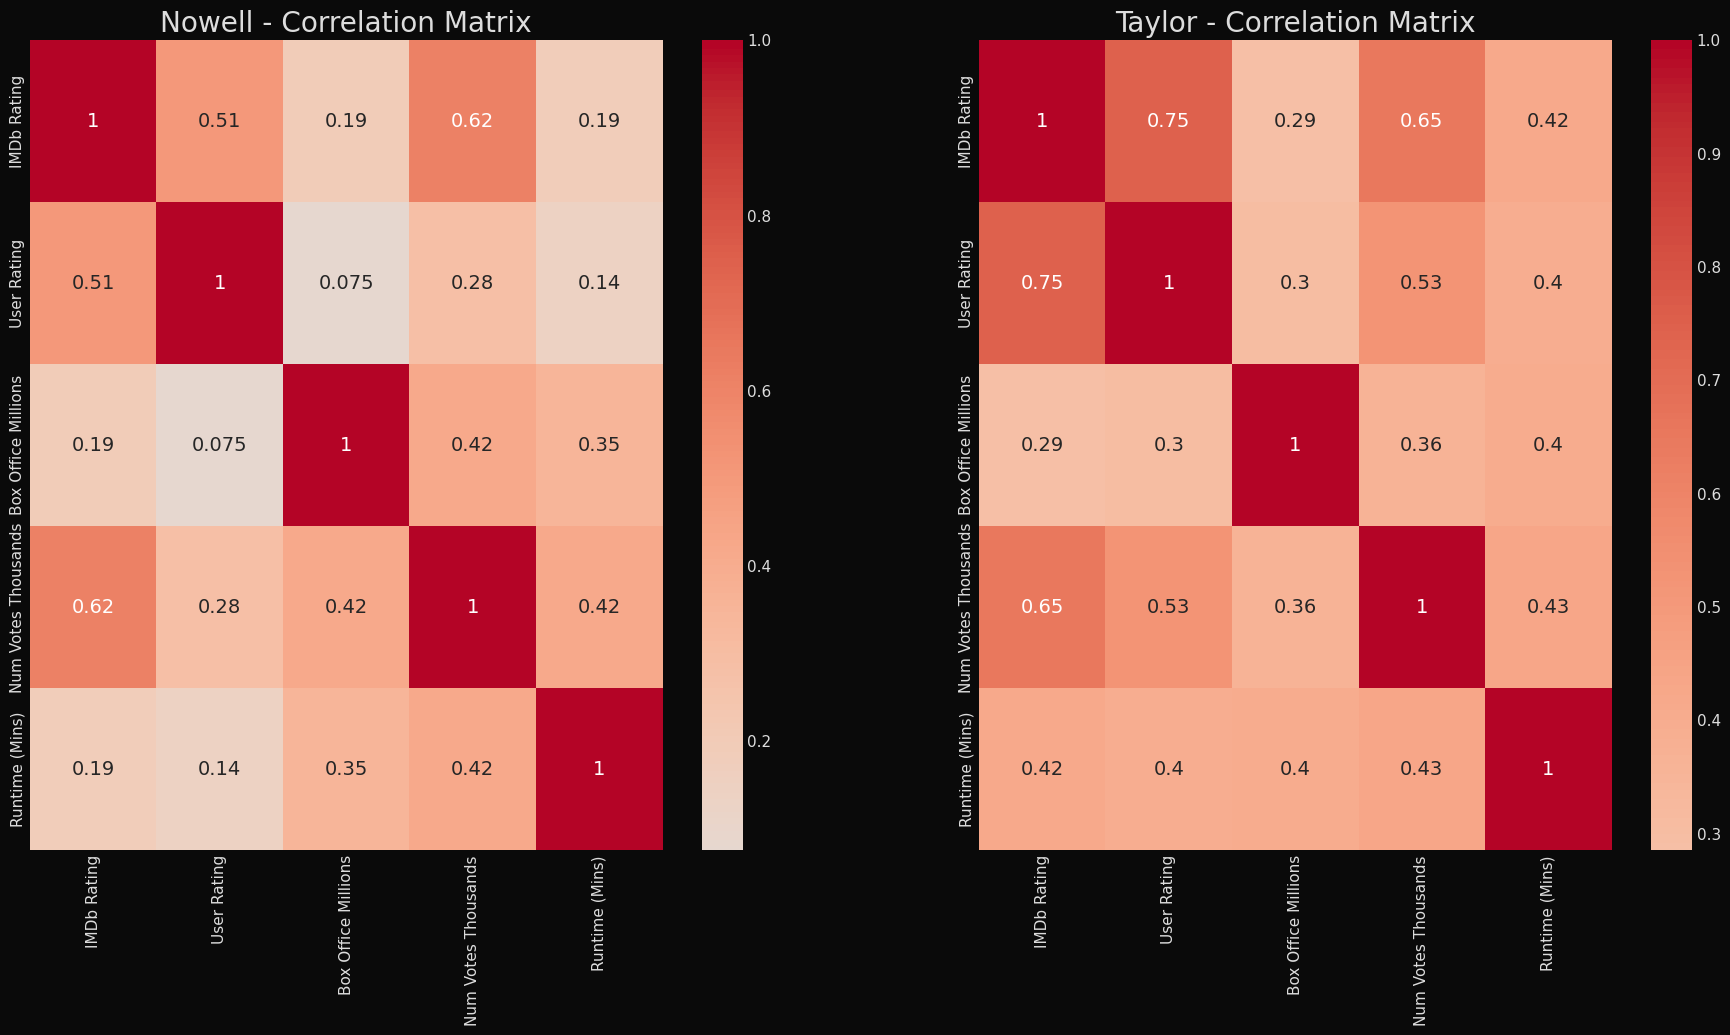

In [127]:
corr_matrix_1 = df[nowell].iloc[:,:10].corr(numeric_only = True)
corr_matrix_2 = df[taylor].iloc[:,:10].corr(numeric_only = True)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 15))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', center=0, ax=ax1)
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', center=0, ax=ax2)
ax1.set_title('Nowell - Correlation Matrix')
ax2.set_title('Taylor - Correlation Matrix')
plt.show()

Seems to be less correlation for me than IMDb average. Suggests I'm not swayed by popularity. Strong corr for IMDb, weak for me. Weak correlation for both me and Taylor with IMDb rating.

In [128]:
# sns.pairplot(df, hue='Viewer')

### Nowell VS Taylor VS IMDb
Most loved/hated movies?


#### By Genre

Most popular genres

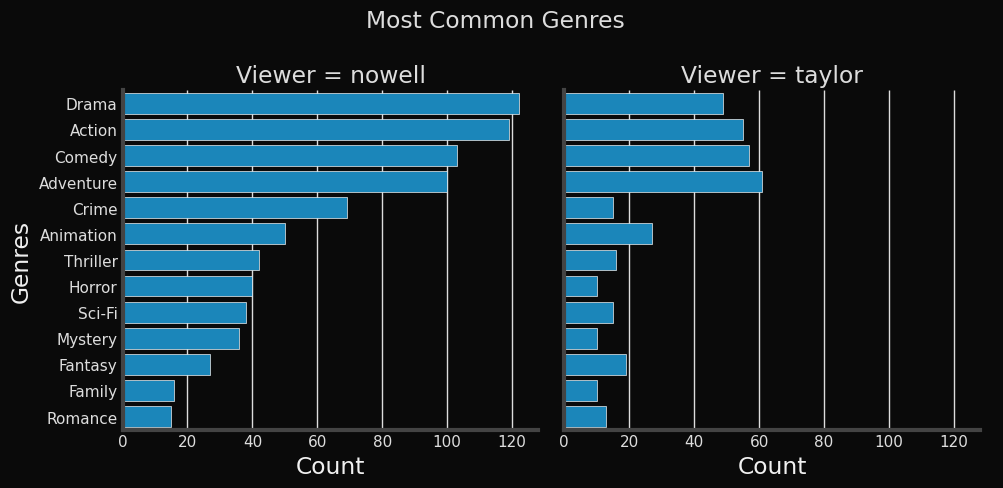

In [225]:
min_count = 5

# Count the number of ratings per genre
genre_counts = df_genres['Genres'].value_counts()

# Filter genres with counts above the threshold
valid_genres = genre_counts[genre_counts >= min_count].index
filtered_df = df_genres[df_genres['Genres'].isin(valid_genres)]

genre_ratings = filtered_df.groupby(['Genres','Viewer']).agg({
    'User Rating':'mean',
    # 'User Rating': 'sum',
    'IMDb Rating':'mean',
    'Genres':'count'
}).rename(columns={'Genres': 'Count'}).sort_values(by =['Count','User Rating'], ascending = False)

genre_ratings.reset_index(inplace=True)

f=sns.catplot(
    data=genre_ratings,
    y='Genres', x='Count',
    kind='bar',
    col='Viewer', order = genre_ratings.sort_values(by='Count', ascending=False)['Genres'][:25],
    sharex=True
    )

# common axis labels
f.fig.suptitle('Most Common Genres')
# f.fig.supxlabel('Count')
plt.tight_layout()
plt.show()

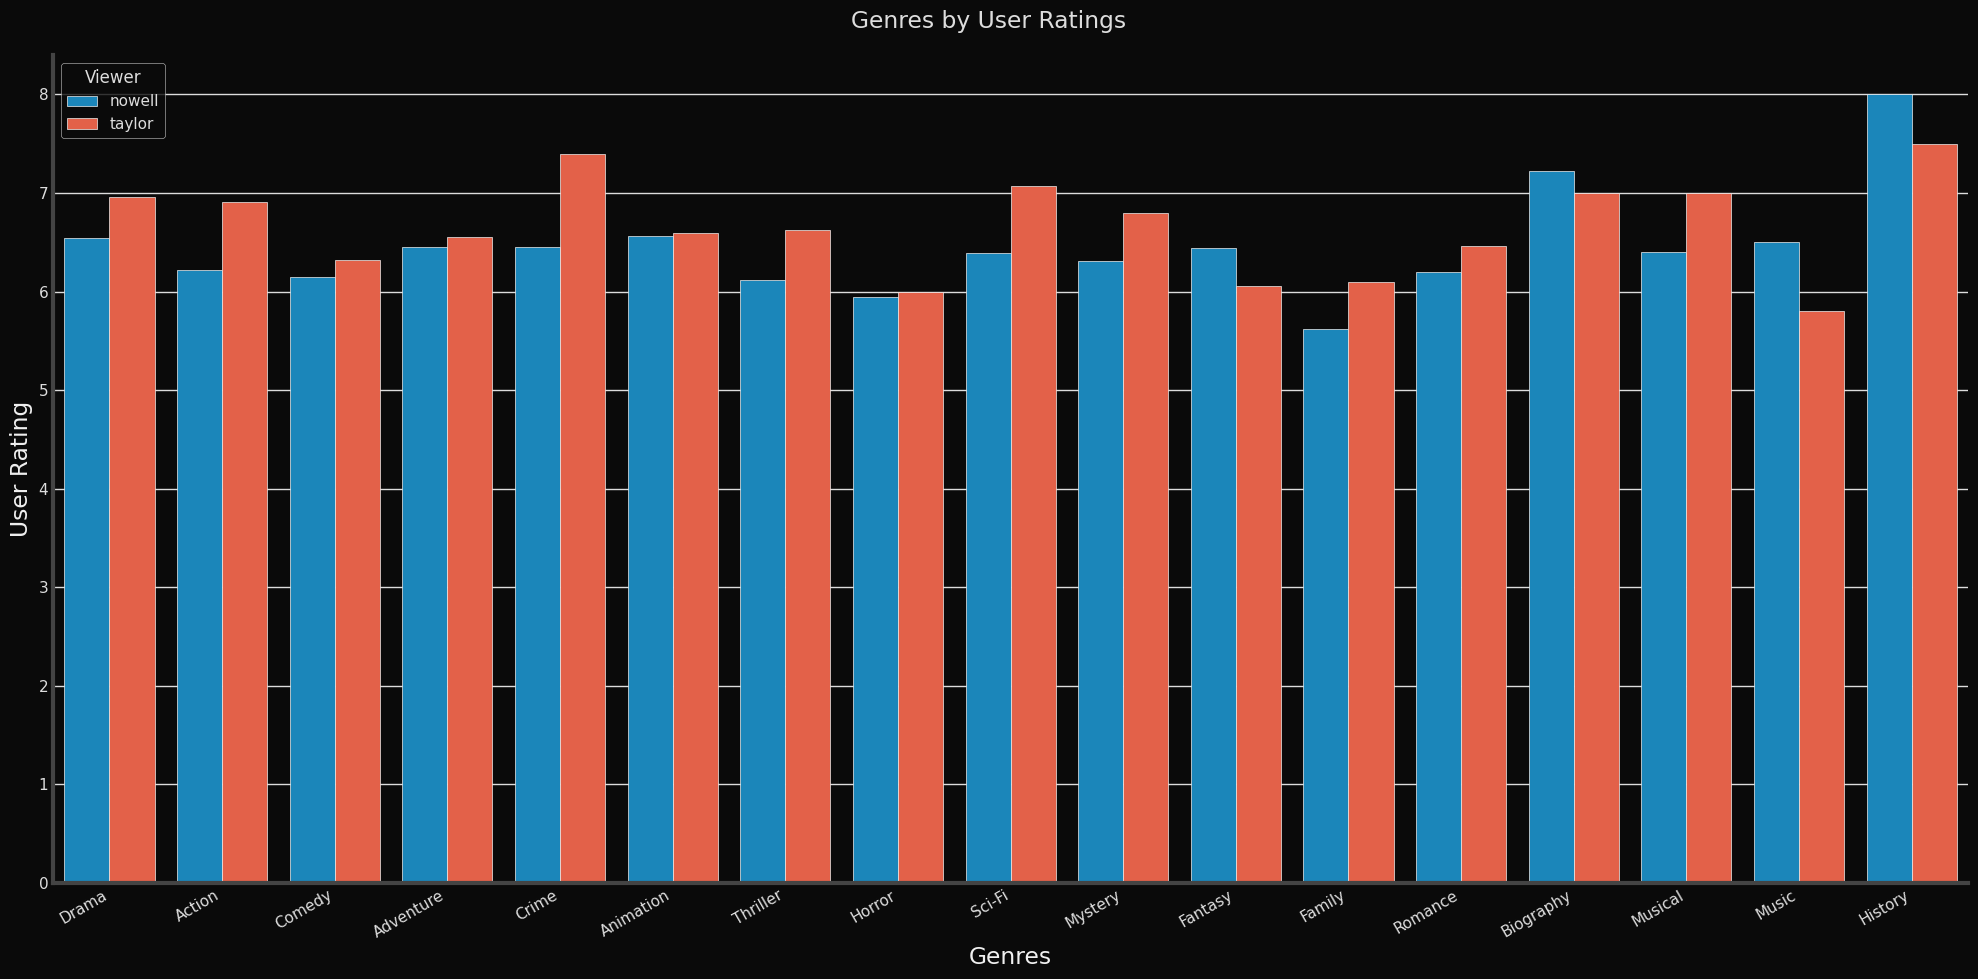

In [226]:
fig, ax=plt.subplots(figsize=(20, 10))
g=sns.barplot(data=genre_ratings.sort_values(by='Count',ascending=False),
              x='Genres', y='User Rating',
              hue='Viewer')
fig.autofmt_xdate()
# common axis labels
fig.suptitle('Genres by User Ratings')
# g.fig.supxlabel('Genres')
plt.tight_layout()
plt.show()

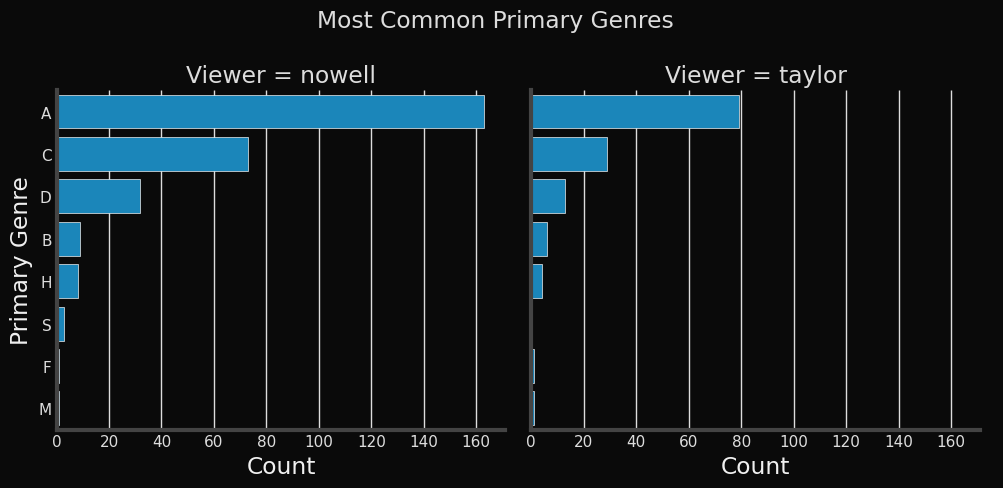

In [211]:
primary_genre_ratings = df.groupby(['Primary Genre','Viewer']).agg({
    'User Rating':'mean',
    'IMDb Rating':'mean',
    'Primary Genre':'count'
}).rename(columns={'Primary Genre': 'Count'}).sort_values(by =['Count','User Rating'], ascending = False)

primary_genre_ratings.reset_index(inplace=True)
primary_genre_ratings

g=sns.catplot(data =primary_genre_ratings,
            col='Viewer', kind='bar',
            y='Primary Genre', x='Count',
            order = primary_genre_ratings.sort_values(by='Count', ascending=False)['Primary Genre'][:20])

# common axis labels
g.fig.suptitle('Most Common Primary Genres')
# g.fig.supxlabel('Count')
plt.tight_layout()
plt.show()

In [132]:
genre_ratings_1=genre_ratings.loc[genre_ratings['Viewer']=='nowell']
genre_ratings_2=genre_ratings.loc[genre_ratings['Viewer']=='taylor']

top_genres_1=zip(genre_ratings_1['Count'][:4],genre_ratings_1['Genres'][:4])
top_genres_1 = dict(top_genres_1)
top_genres_2 =zip(genre_ratings_1['Count'][:4],genre_ratings_1['Genres'][:4])
top_genres_1 = dict(top_genres_1)

uncommon_genres_1=zip(genre_ratings_1['Count'][4:],genre_ratings_1['Genres'][4:])
uncommon_genres_1 = dict(uncommon_genres_1)

uncommon_genres_2=zip(genre_ratings_2['Count'][4:],genre_ratings_2['Genres'][4:])
uncommon_genres_2 = dict(uncommon_genres_2)

print('Nowell Top Genres:', top_genres_1)
print('Taylor Top Genres:', top_genres_2)

print('Nowell Uncommon Genres:', uncommon_genres_1)
print('Taylor Uncommon Genres:', uncommon_genres_2)

Nowell Top Genres: {122: 'Drama', 119: 'Action', 103: 'Comedy', 100: 'Adventure'}
Taylor Top Genres: <zip object at 0x7947cc454f80>
Nowell Uncommon Genres: {69: 'Crime', 50: 'Animation', 42: 'Thriller', 40: 'Horror', 38: 'Sci-Fi', 36: 'Mystery', 27: 'Fantasy', 16: 'Family', 15: 'Romance', 9: 'Biography', 5: 'Musical', 4: 'Music', 3: 'History'}
Taylor Uncommon Genres: {27: 'Animation', 19: 'Fantasy', 16: 'Thriller', 15: 'Sci-Fi', 13: 'Romance', 10: 'Horror', 6: 'Biography', 5: 'Music', 4: 'Musical', 2: 'History'}


Our graphs are very similar suggesting a similar taste in genres. Almost perfect correlation of genres. Perhaps there's a confounding variable like the genres action, drama and adventure being vague enough to apply to any film.

In [133]:
## Calculate correlation between me and Taylor

#### By Actor & Director

Text(0.5, 0.98, 'Most Common Actors')

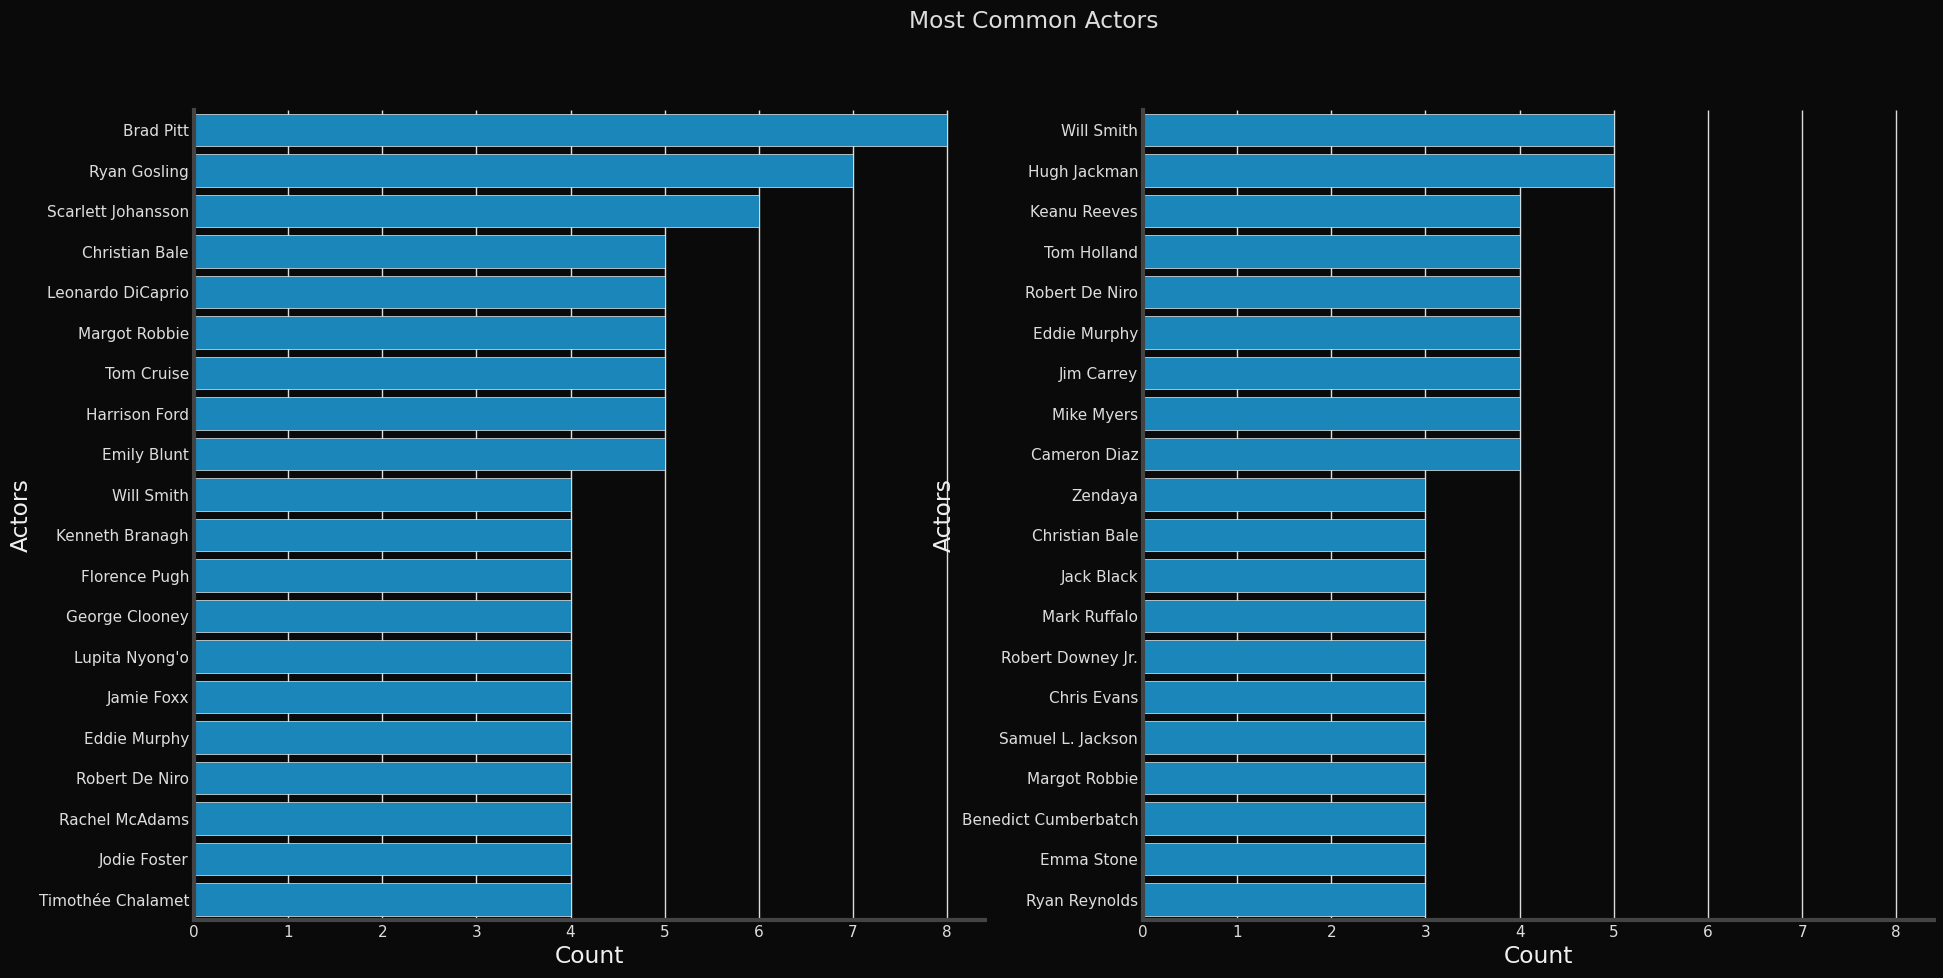

In [206]:
actor_summary = df_actors.groupby(['Actors','Viewer']).agg({
    'User Rating': 'mean',
    'IMDb Rating': 'mean',
    'Actors': 'count'
}).rename(columns={'Actors': 'Count'}).sort_values(by=['Count', 'User Rating'], ascending=False)

actor_summary.reset_index(inplace=True)

actor_summary_1 = actor_summary.loc[actor_summary['Viewer']=='nowell']
actor_summary_2 = actor_summary.loc[actor_summary['Viewer']=='taylor']

fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(20, 10), sharex=True)
f=sns.barplot(data=actor_summary_1,
              y='Actors', x='Count',
              ax=ax1,
              order = actor_summary_1.sort_values(by='Count', ascending=False)['Actors'][:20],
              )
g=sns.barplot(data=actor_summary_2,
              y='Actors', x='Count',
              ax=ax2,
              order = actor_summary_2.sort_values(by='Count', ascending=False)['Actors'][:20])
ax2.set_ylabel=None
fig.suptitle('Most Common Actors')

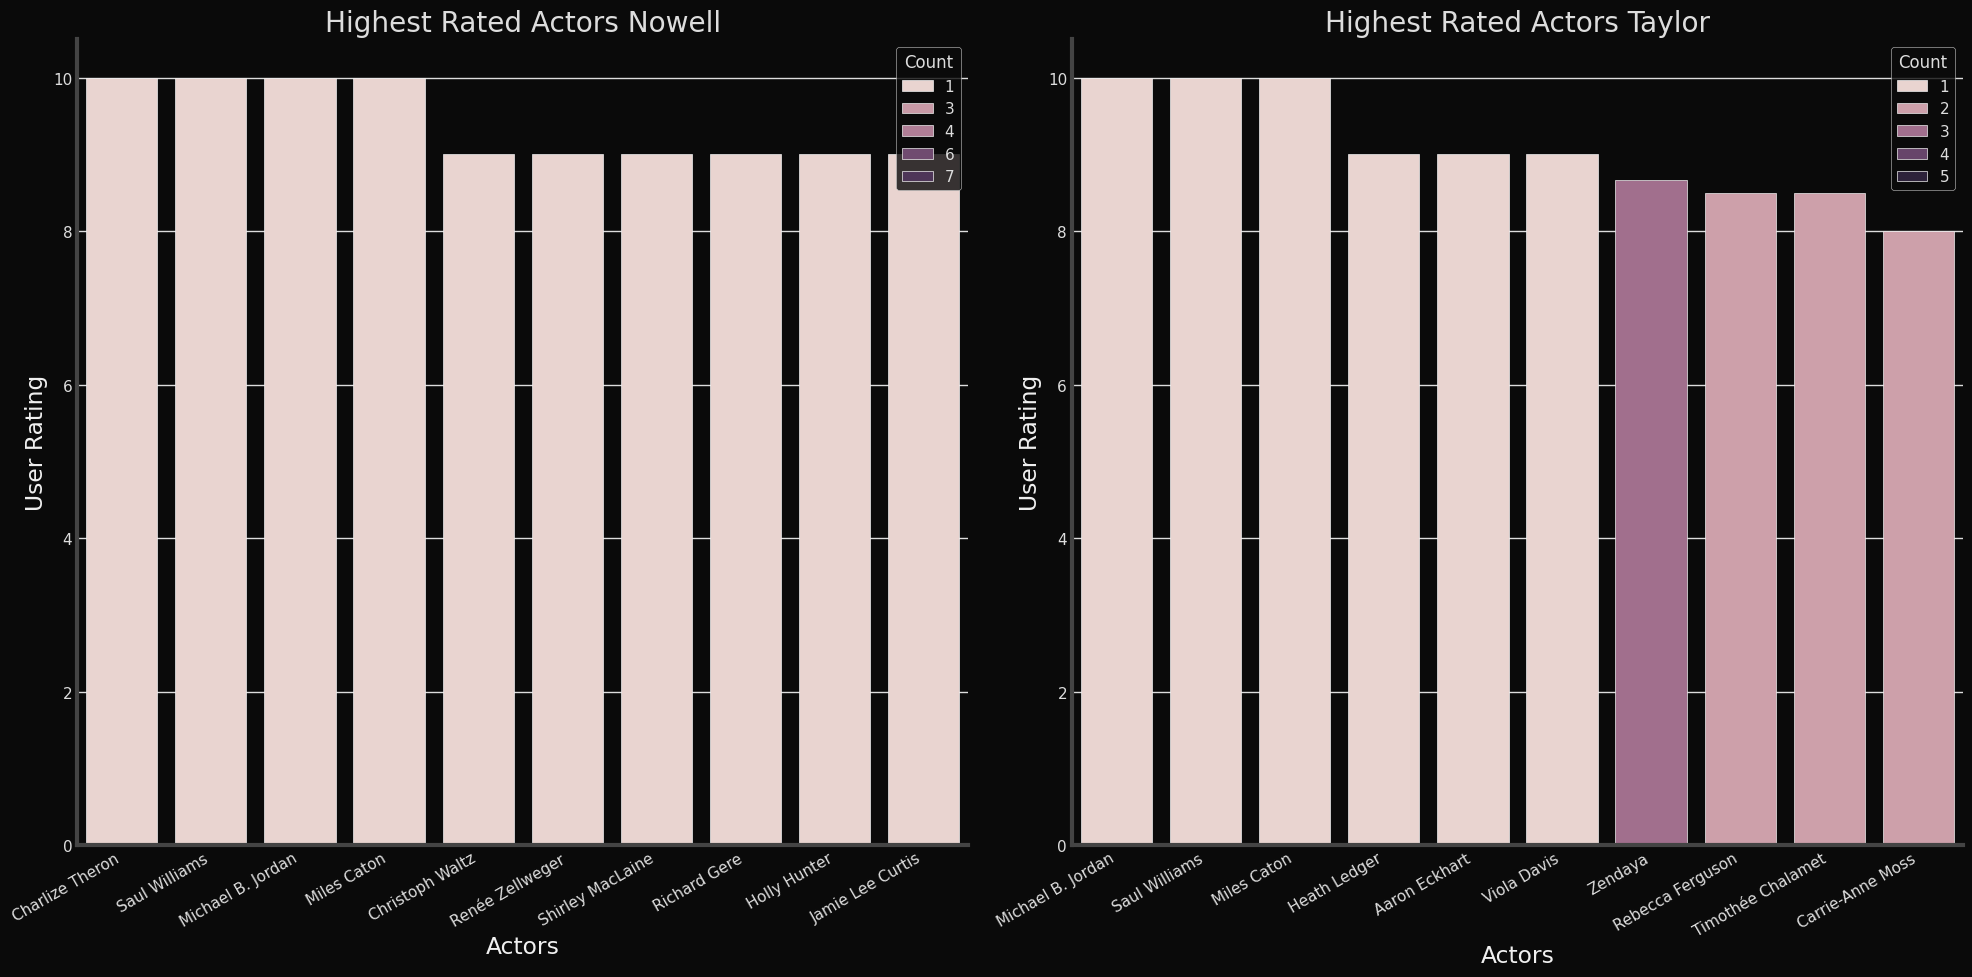

In [210]:
fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(20, 10))
g=sns.barplot(data=actor_summary_1,
              x='Actors', y='User Rating',
              ax=ax1,
              hue='Count',
              order = actor_summary_1.sort_values(by='User Rating', ascending=False)['Actors'][:10])
f=sns.barplot(data=actor_summary_2,
              x='Actors', y='User Rating',
              ax=ax2,
              hue='Count',
              order = actor_summary_2.sort_values(by='User Rating', ascending=False)['Actors'][:10])
fig.autofmt_xdate()
ax1.set_title('Highest Rated Actors Nowell')
ax2.set_title('Highest Rated Actors Taylor')
plt.tight_layout()
plt.show()

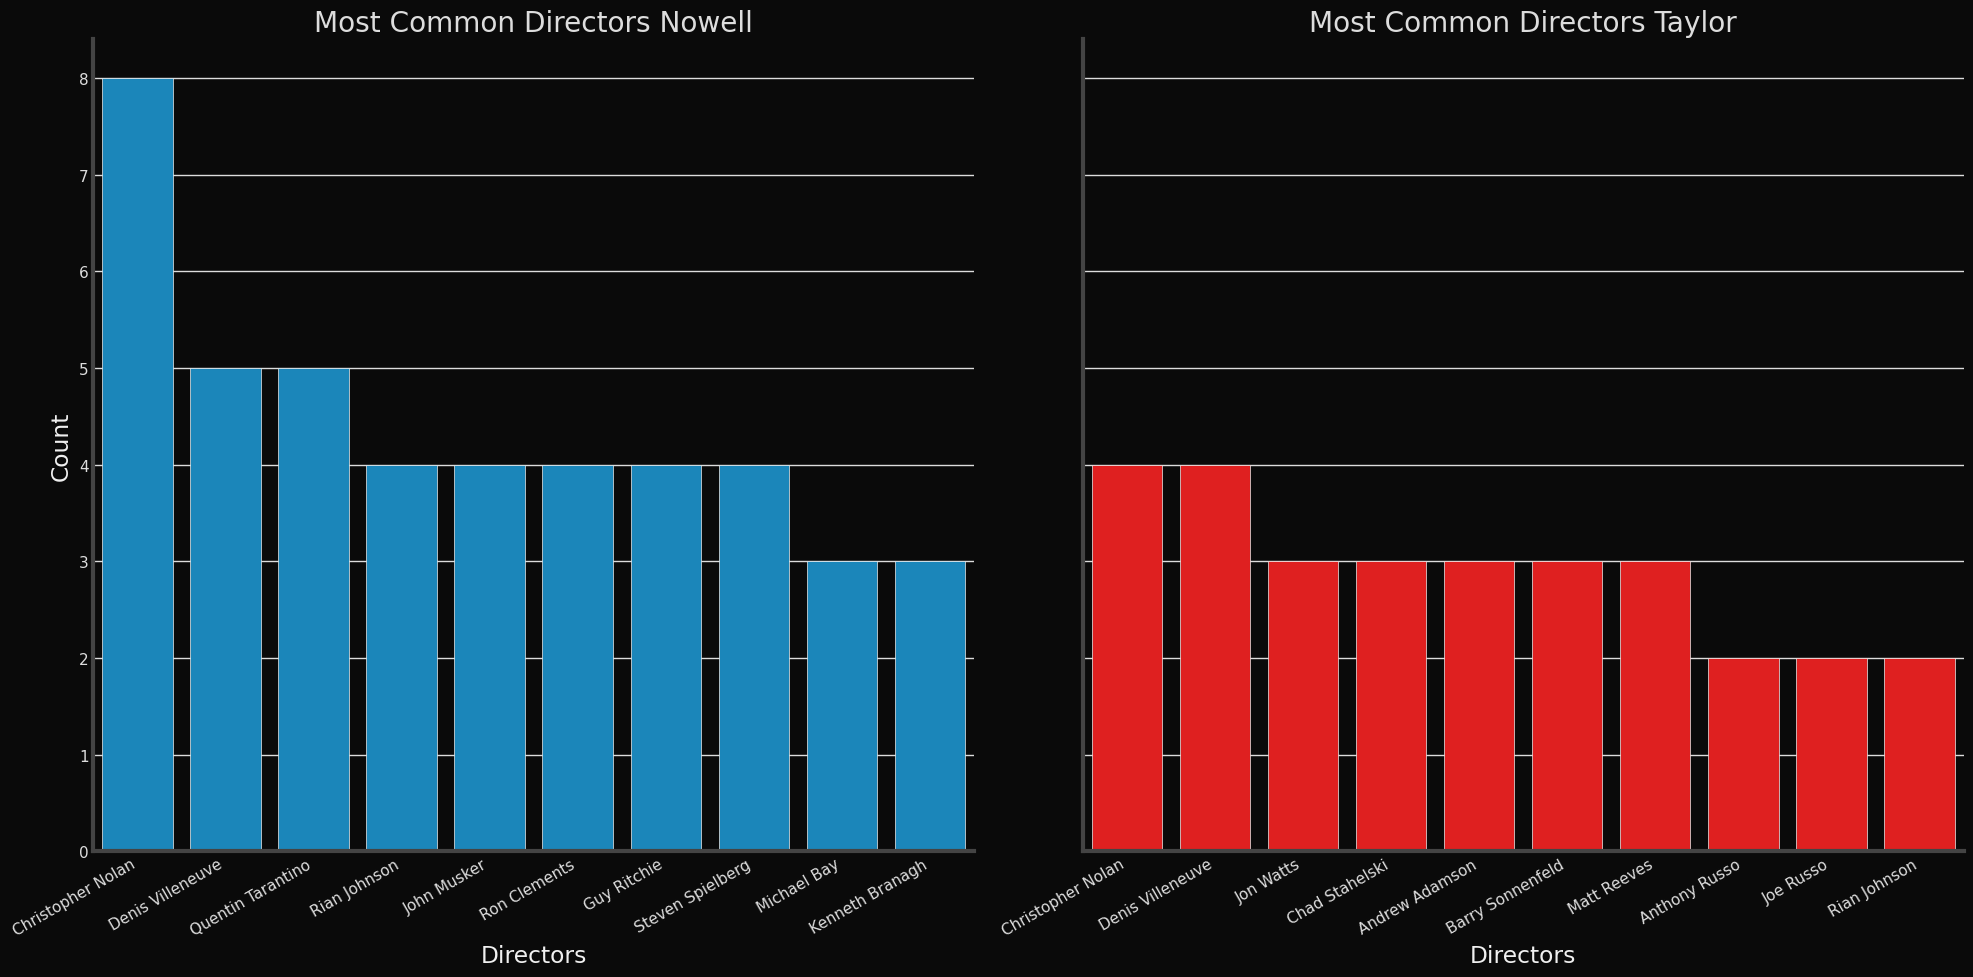

In [135]:
director_summary = df_directors.groupby(['Directors','Viewer']).agg({
    'User Rating': 'mean',
    'IMDb Rating': 'mean',
    'Directors': 'count'
}).rename(columns={'Directors': 'Count'}).sort_values(by=['Count', 'User Rating'], ascending=False)

director_summary.reset_index(inplace=True)

director_summary_1 = director_summary.loc[director_summary['Viewer']=='nowell']
director_summary_2 = director_summary.loc[director_summary['Viewer']=='taylor']

# Plots
fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(20, 10), sharey=True)
g=sns.barplot(data=director_summary_1,
              x='Directors', y='Count',
              ax=ax1,
              order = director_summary_1.sort_values(by='Count', ascending=False)['Directors'][:10])
f=sns.barplot(data=director_summary_2,
              x='Directors', y='Count',
              color = 'red', ax=ax2,
              order = director_summary_2.sort_values(by='Count', ascending=False)['Directors'][:10])
fig.autofmt_xdate()
ax1.set_title('Most Common Directors Nowell')
ax2.set_title('Most Common Directors Taylor')
plt.tight_layout()
plt.show()

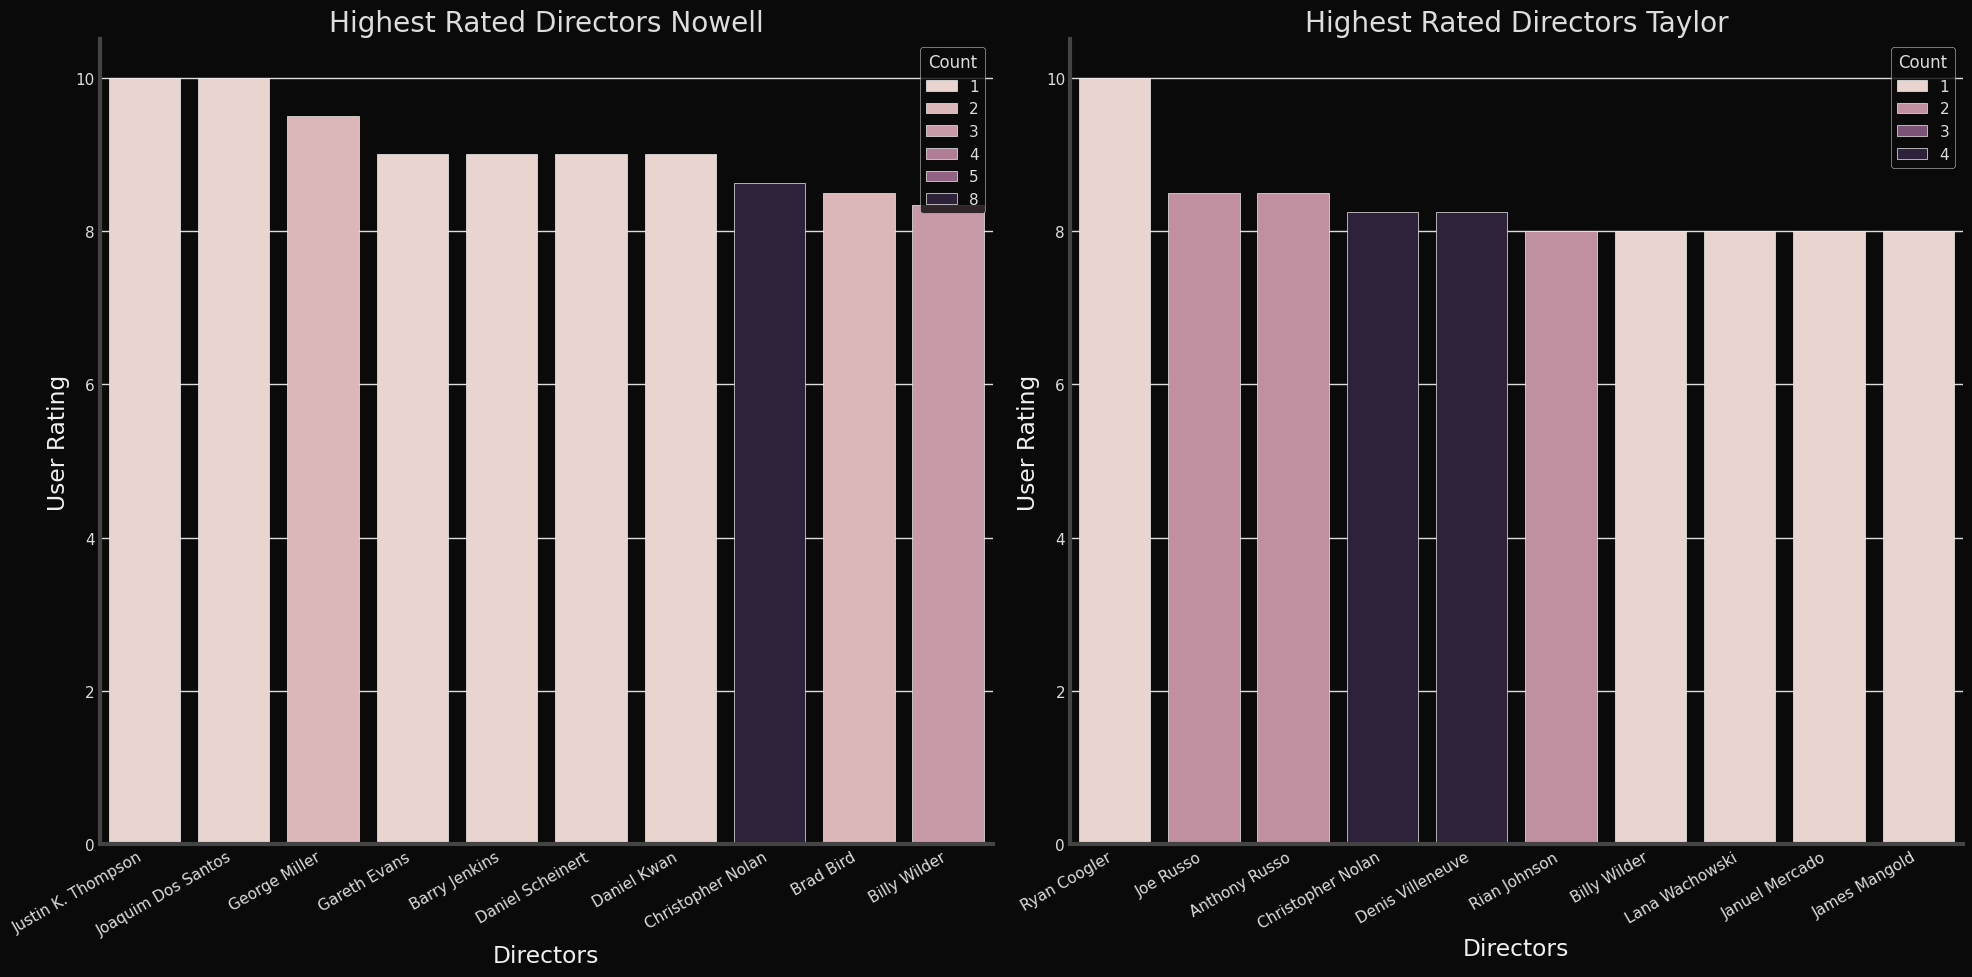

In [207]:
fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(20, 10))
g=sns.barplot(data=director_summary_1,
              x='Directors', y='User Rating',
              ax=ax1,
              hue='Count',
              order = director_summary_1.sort_values(by='User Rating', ascending=False)['Directors'][:10])
f=sns.barplot(data=director_summary_2,
              x='Directors', y='User Rating',
              ax=ax2,
              hue='Count',
              order = director_summary_2.sort_values(by='User Rating', ascending=False)['Directors'][:10])
fig.autofmt_xdate()
ax1.set_title('Highest Rated Directors Nowell')
ax2.set_title('Highest Rated Directors Taylor')
plt.tight_layout()
plt.show()

#### By Year

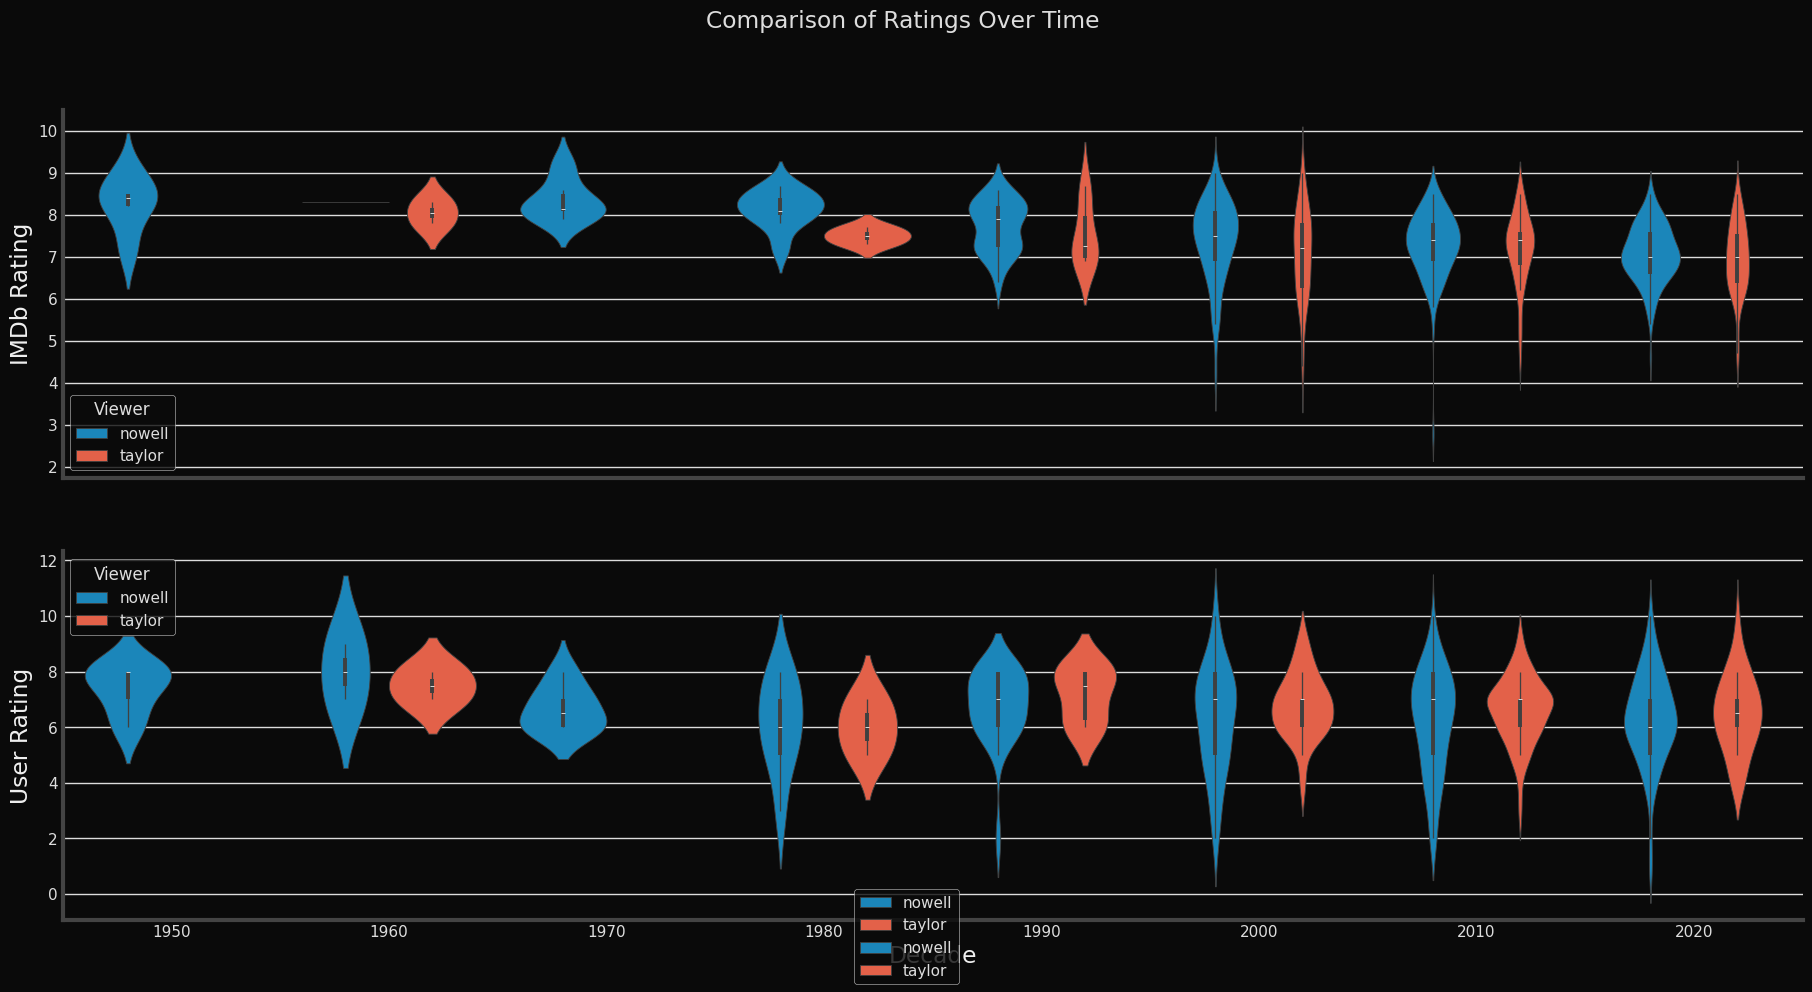

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

sns.violinplot(x='Decade', y='IMDb Rating', data=df, hue='Viewer', ax=axes[0])
sns.violinplot(x='Decade', y='User Rating', data=df, hue='Viewer', ax=axes[1])

fig.suptitle("Comparison of Ratings Over Time")
fig.legend(loc='lower center')


/tmp/ipython-input-826488046.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='lower center')


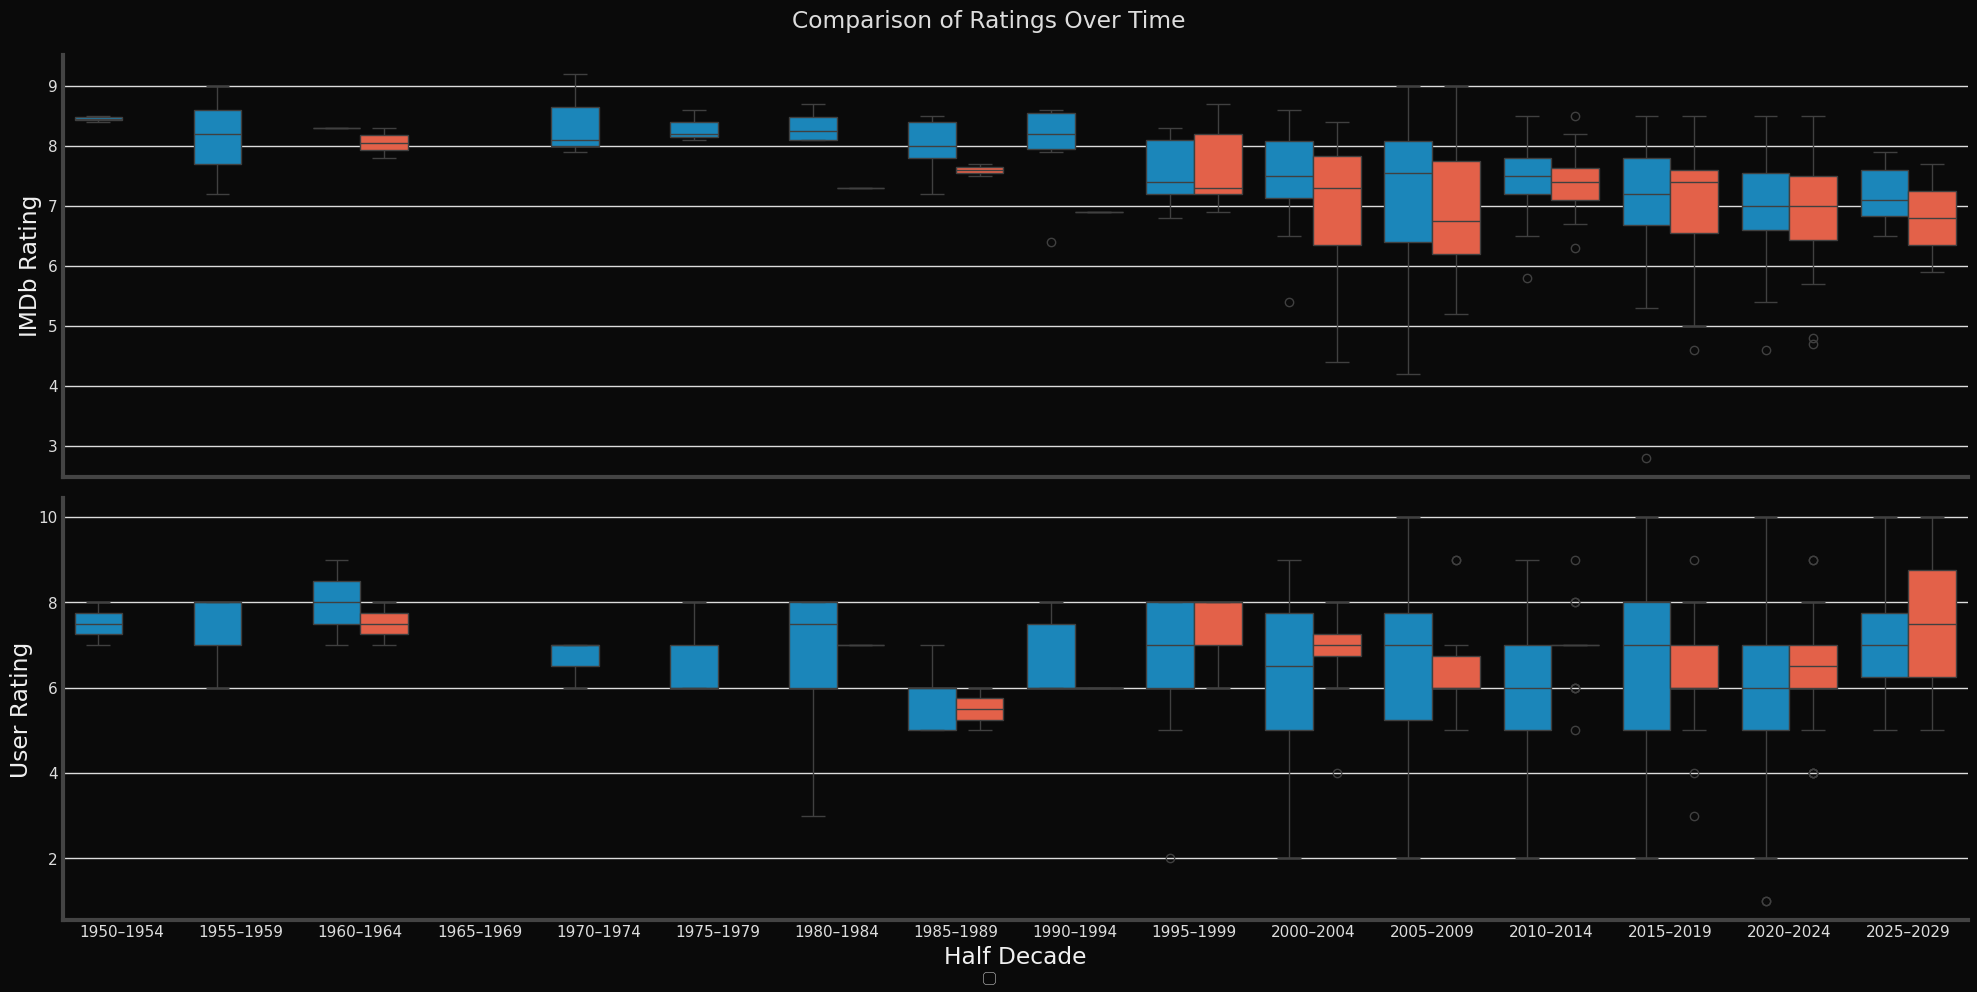

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

sns.boxplot(x='Half Decade', y='IMDb Rating', data=df, hue='Viewer', legend=False, ax=axes[0])
sns.boxplot(x='Half Decade', y='User Rating', data=df, hue='Viewer', legend=False, ax=axes[1])
fig.legend(loc='lower center')
fig.suptitle("Comparison of Ratings Over Time")
plt.tight_layout()
plt.show()

In [139]:
## Break down habits year by year
df['Year Rated'].value_counts()
display(df.groupby(['Year Rated','Viewer'])[['User Rating', 'IMDb Rating']].describe())

year_sum_1 = df[nowell].groupby('Year Rated').agg({
    'User Rating': 'mean',
    'IMDb Rating': 'mean',
    'Year Rated': 'count'
}).rename(columns={'Year Rated': 'Count'}
          ).sort_values(by=['Year Rated', 'User Rating'], ascending=False
                                                       )

display(year_sum_1.head(10))
correlation = year_sum_1['User Rating'].corr(year_sum_1['IMDb Rating'])
print(f"Correlation between Nowell's rating and IMDb rating: {correlation:.2f}")

User Rating                                     IMDb Rating  \
                        count mean  std  min  25%  50%  75%   max       count   
Year Rated Viewer                                                               
2020       nowell        9.00 5.33 1.41 4.00 4.00 5.00 6.00  8.00        9.00   
2021       nowell       54.00 5.50 1.48 2.00 5.00 6.00 7.00  8.00       54.00   
           taylor       42.00 6.69 1.44 3.00 6.00 7.00 8.00  9.00       42.00   
2022       nowell       18.00 5.72 1.32 3.00 5.00 6.00 6.75  8.00       18.00   
           taylor       32.00 6.19 1.06 4.00 6.00 6.00 7.00  8.00       32.00   
2023       nowell       20.00 6.05 1.36 2.00 5.00 6.00 7.00  8.00       20.00   
           taylor       15.00 7.07 0.70 6.00 7.00 7.00 7.50  8.00       15.00   
2024       nowell      157.00 6.76 1.80 1.00 6.00 7.00 8.00 10.00      157.00   
           taylor       30.00 6.67 1.03 4.00 6.00 7.00 7.00  8.00       30.00   
2025       nowell       32.00 6.47 1.50 3.00 6.00 7.00 7.00 10.00       32.00   
           taylor       14.00 6.93 1.59 4.00 6.25 7.00 7.75 10.00       14.00   

                                                      
                  mean  std  min  25%  50%  75%  max  
Year Rated Viewer                                     
2020       nowell 7.53 0.78 6.30 6.90 8.00 8.10 8.20  
2021       nowell 7.02 0.82 4.20 6.62 7.10 7.50 8.20  
           taylor 7.12 1.04 4.60 6.30 7.20 8.07 9.00  
2022       nowell 7.06 0.54 6.30 6.60 6.95 7.60 7.90  
           taylor 6.81 0.86 4.40 6.38 6.90 7.30 8.30  
2023       nowell 7.06 0.76 5.70 6.57 7.20 7.60 8.30  
           taylor 7.43 0.41 6.30 7.30 7.50 7.65 8.00  
2024       nowell 7.47 0.88 2.80 6.90 7.50 8.10 9.20  
           taylor 7.23 0.92 4.70 6.83 7.45 7.88 8.40  
2025       nowell 7.45 0.50 6.50 7.15 7.40 7.72 8.50  
           taylor 7.31 0.60 5.90 7.05 7.40 7.47 8.50

User Rating  IMDb Rating  Count
Year Rated                                 
2025               6.47         7.45     32
2024               6.76         7.47    157
2023               6.05         7.05     20
2022               5.72         7.06     18
2021               5.50         7.02     54
2020               5.33         7.53      9

Correlation between Nowell's rating and IMDb rating: 0.34


I'm seemingly getting more positive as time passes.

In [140]:
year_sum_2 = df[taylor].groupby('Year Rated').agg({
    'User Rating': 'mean',
    'IMDb Rating': 'mean',
    'Year Rated': 'count'
}).rename(columns={'Year Rated': 'Count'}).sort_values(by=['Year Rated', 'User Rating'], ascending=False)

display(year_sum_2.head(10))
correlation = year_sum_2['User Rating'].corr(year_sum_2['IMDb Rating'])
print(f"Correlation between Taylor's rating and IMDb rating: {correlation:.2f}")

User Rating  IMDb Rating  Count
Year Rated                                 
2025               6.93         7.31     14
2024               6.67         7.23     30
2023               7.07         7.43     15
2022               6.19         6.81     32
2021               6.69         7.12     42

Correlation between Taylor's rating and IMDb rating: 0.98


Taylor seems quite consistent with his ratings

When did we start tracking?

In [141]:
min_date_1 = df[nowell]['Date Rated'].min()
min_date_2 = df[taylor]['Date Rated'].min()

print(f"Nowell started tracking on {min_date_1.date()} by watching {df[nowell].loc[df[nowell]['Date Rated'] == min_date_1, 'Title'].iloc[0]}")
print(f"Taylor started tracking on {min_date_2.date()} by watching {df[taylor].loc[df[taylor]['Date Rated'] == min_date_2, 'Title'].iloc[0]}")

Nowell started tracking on 2020-12-16 by watching Howl's Moving Castle
Taylor started tracking on 2021-04-04 by watching Django Unchained


##### Time Series

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


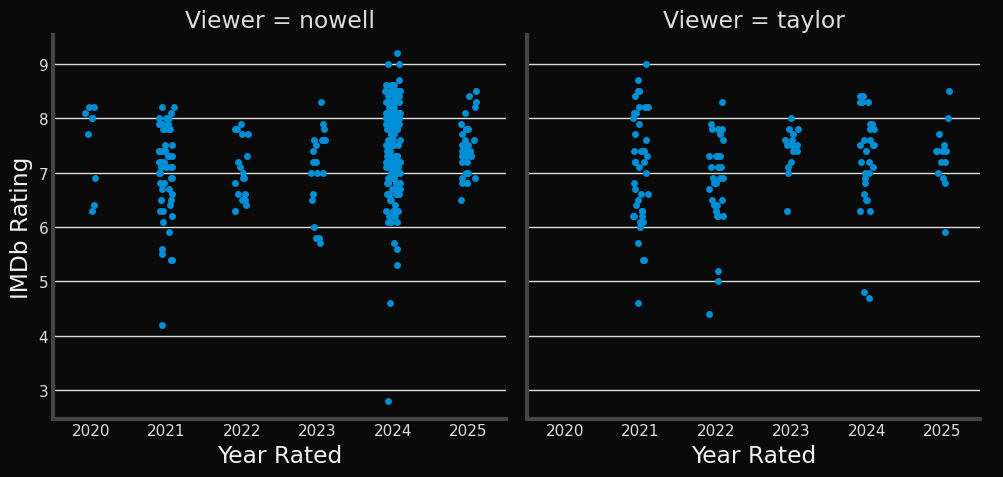

In [142]:
sns.catplot(
    data=df, x='Year Rated', y='IMDb Rating',
    col='Viewer', kind='strip',
    sharey=True, ax=ax1)
fig.suptitle('IMDb Rating Over Time')
fig.supxlabel('Year Rated')
plt.tight_layout()
plt.show()

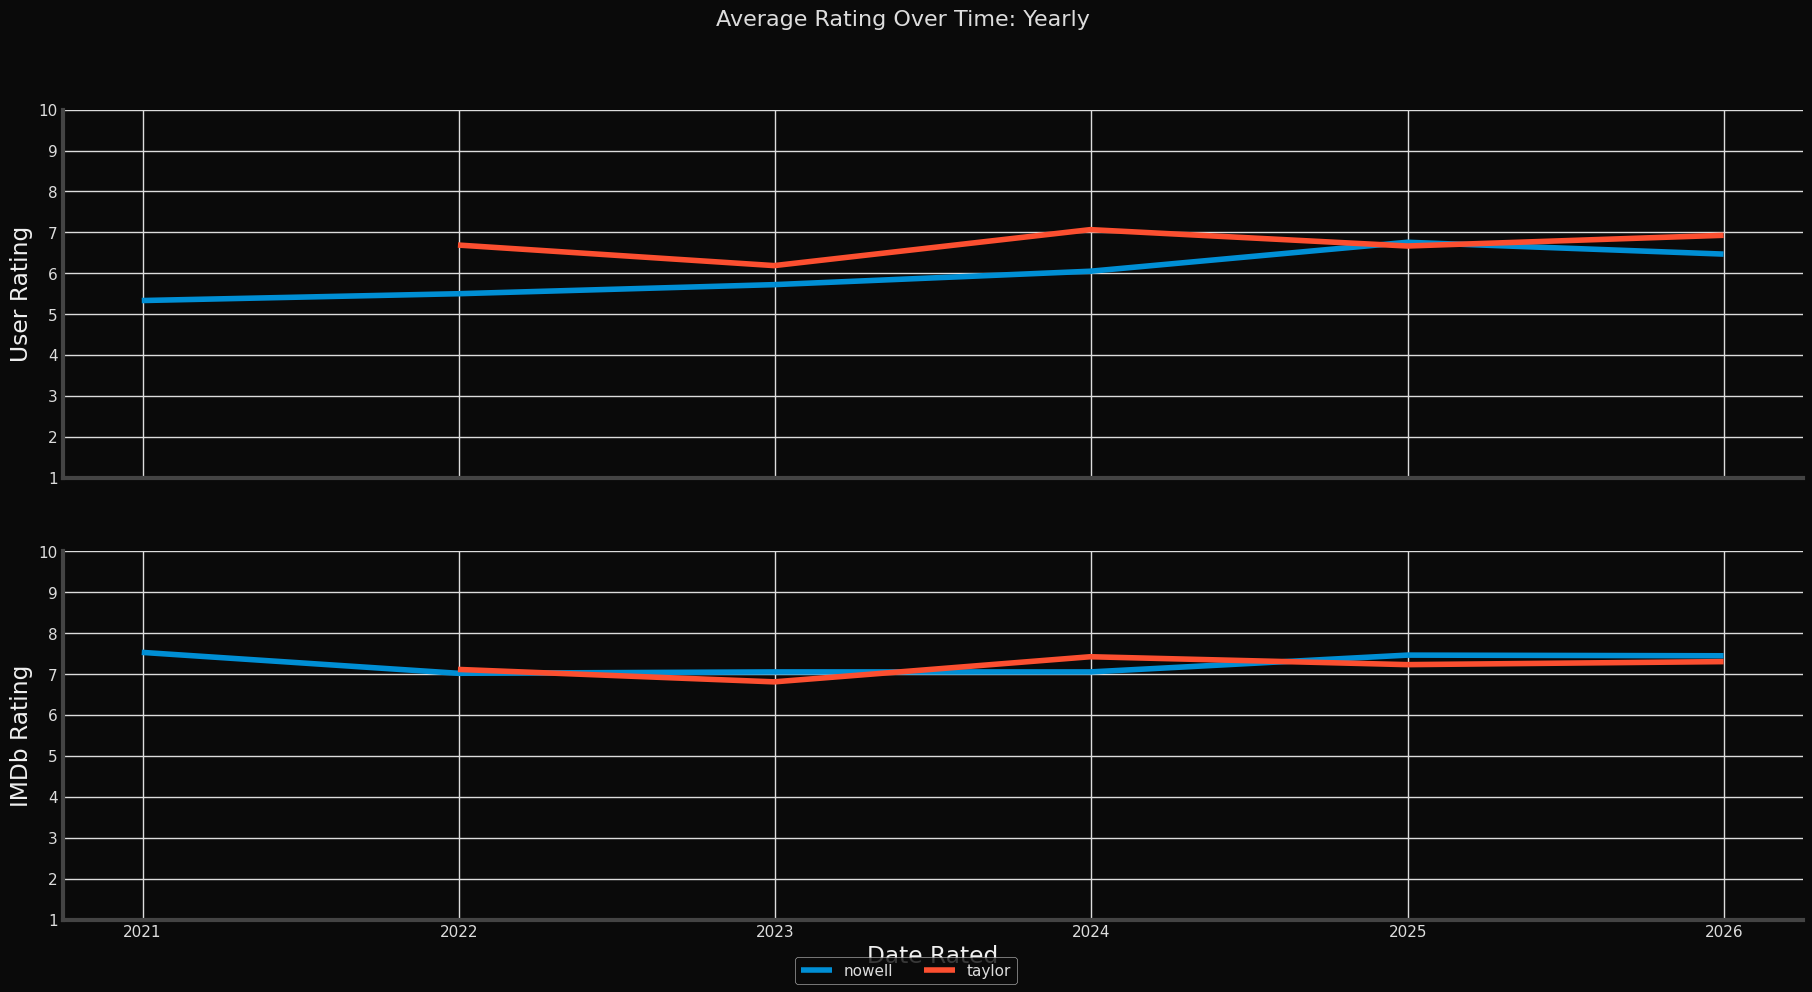

In [143]:
yearly  = df.groupby(['Viewer', pd.Grouper(key='Date Rated', freq='YE')]
                     )[['User Rating', 'IMDb Rating']].mean().reset_index()

fig, (ax1, ax2)=plt.subplots(2,1, figsize=(20, 10), sharex=True)
g=sns.lineplot(yearly,x='Date Rated', y='User Rating', hue='Viewer', ax=ax1, legend=False)
f=sns.lineplot(yearly,x='Date Rated', y='IMDb Rating', hue='Viewer', ax=ax2).legend_.remove()
ax1.set_ylim(1,10)
ax2.set_ylim(ax1.get_ylim())
fig.suptitle('Average Rating Over Time: Yearly', fontsize=16)
fig.legend(loc='lower center', ncols=2)
plt.show()

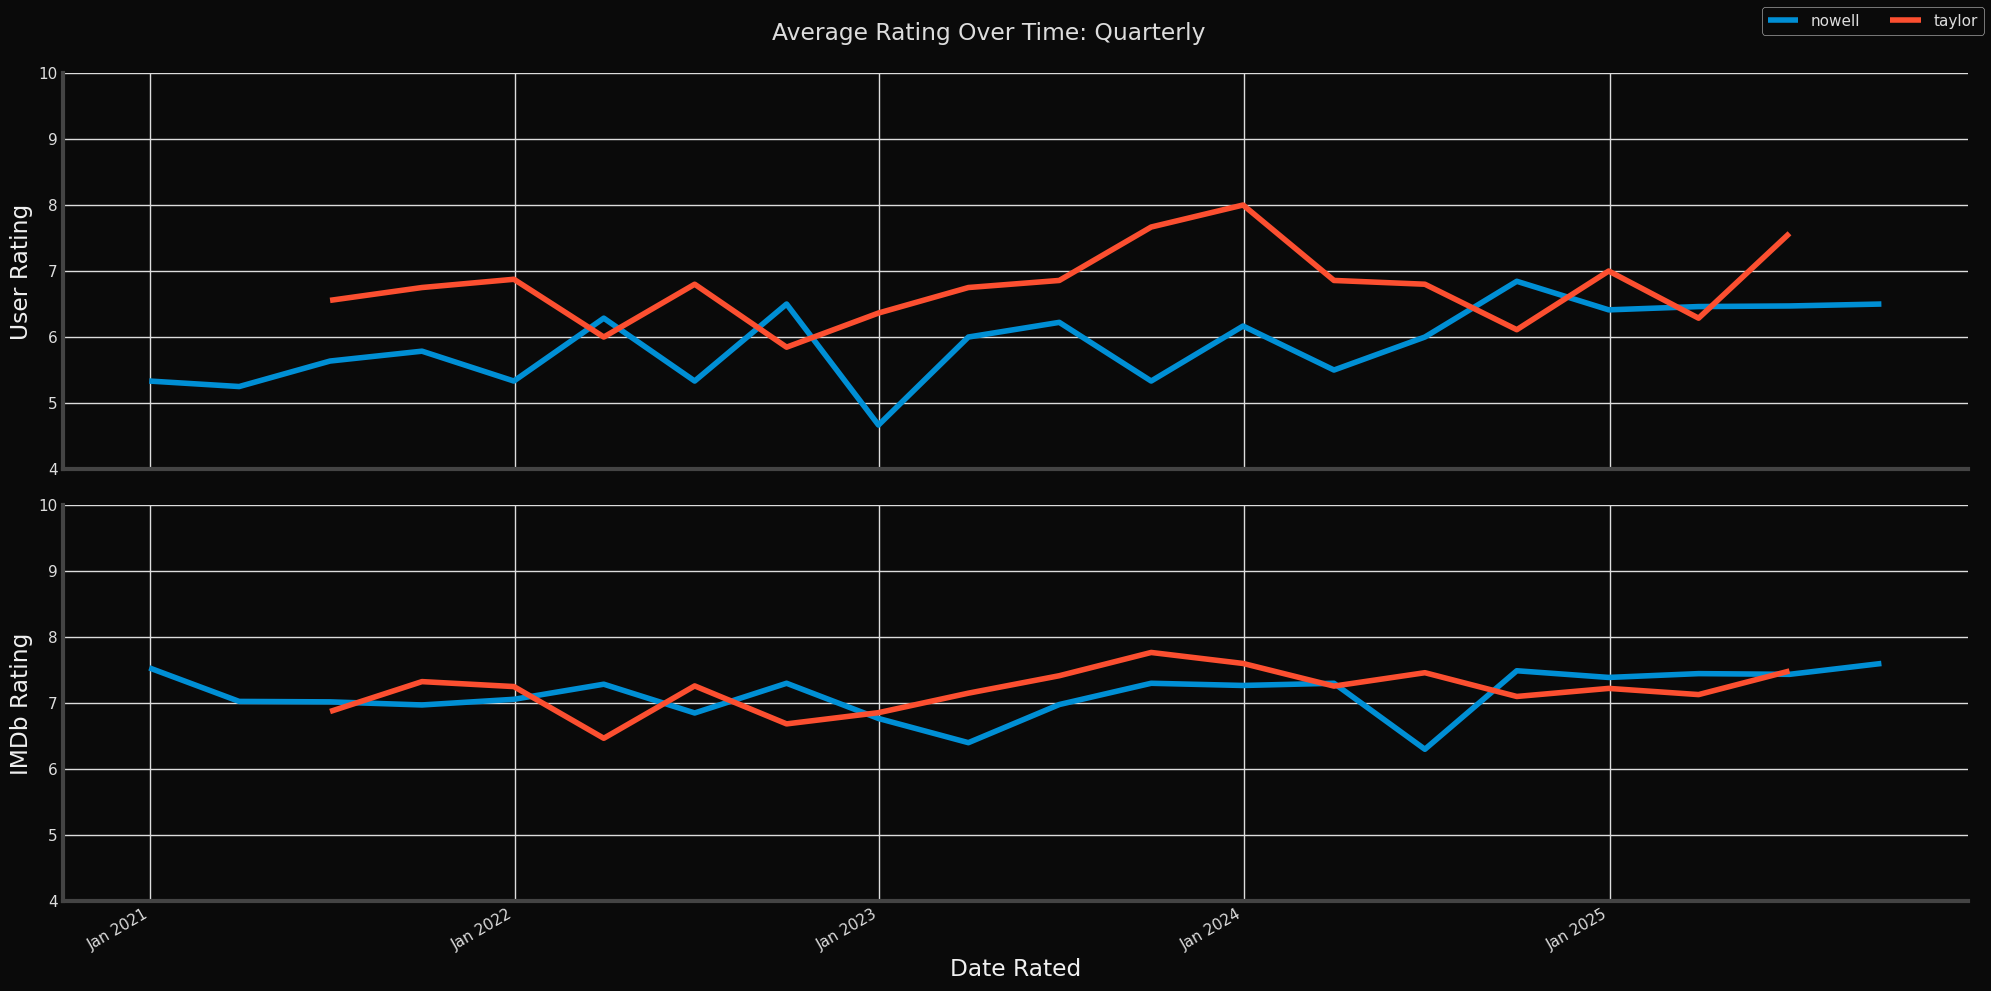

In [144]:
quarterly = (
    df.groupby(['Viewer',pd.Grouper(key='Date Rated', freq='QE')])
    [['User Rating', 'IMDb Rating']].mean()
    .reset_index()
)

fig, (ax1, ax2)=plt.subplots(2,1, figsize=(20, 10), sharex=True)
g=sns.lineplot(quarterly,x='Date Rated', y='User Rating',
               hue='Viewer', ax=ax1,
               legend=False)
f=sns.lineplot(quarterly,x='Date Rated', y='IMDb Rating',
               hue='Viewer', ax=ax2,
               )
mpl_dates.MonthLocator(bymonth=[1,4,7,10])
ax2.xaxis.set_major_formatter(mpl_dates.DateFormatter('%b %Y'))
ax2.legend_.remove()
ax1.set_ylim(4,10)
ax2.set_ylim(ax1.get_ylim())
fig.autofmt_xdate()
fig.suptitle('Average Rating Over Time: Quarterly')
fig.legend(ncols=2)
plt.tight_layout()
plt.show()

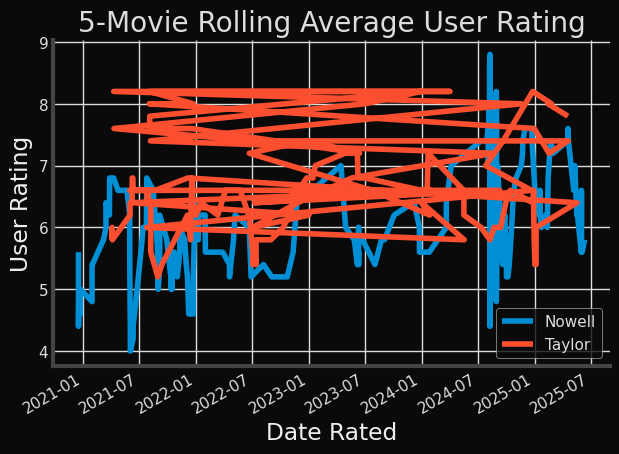

In [145]:
df[nowell].set_index('Date Rated')['User Rating'].rolling(window=5).mean().plot(
    title='5-Movie Rolling Average Rating',
    label='Nowell')
df[taylor].set_index('Date Rated')['User Rating'].rolling(window=5).mean().plot(
    title='5-Movie Rolling Average User Rating',
    label='Taylor',
    ylabel='User Rating')
plt.legend()

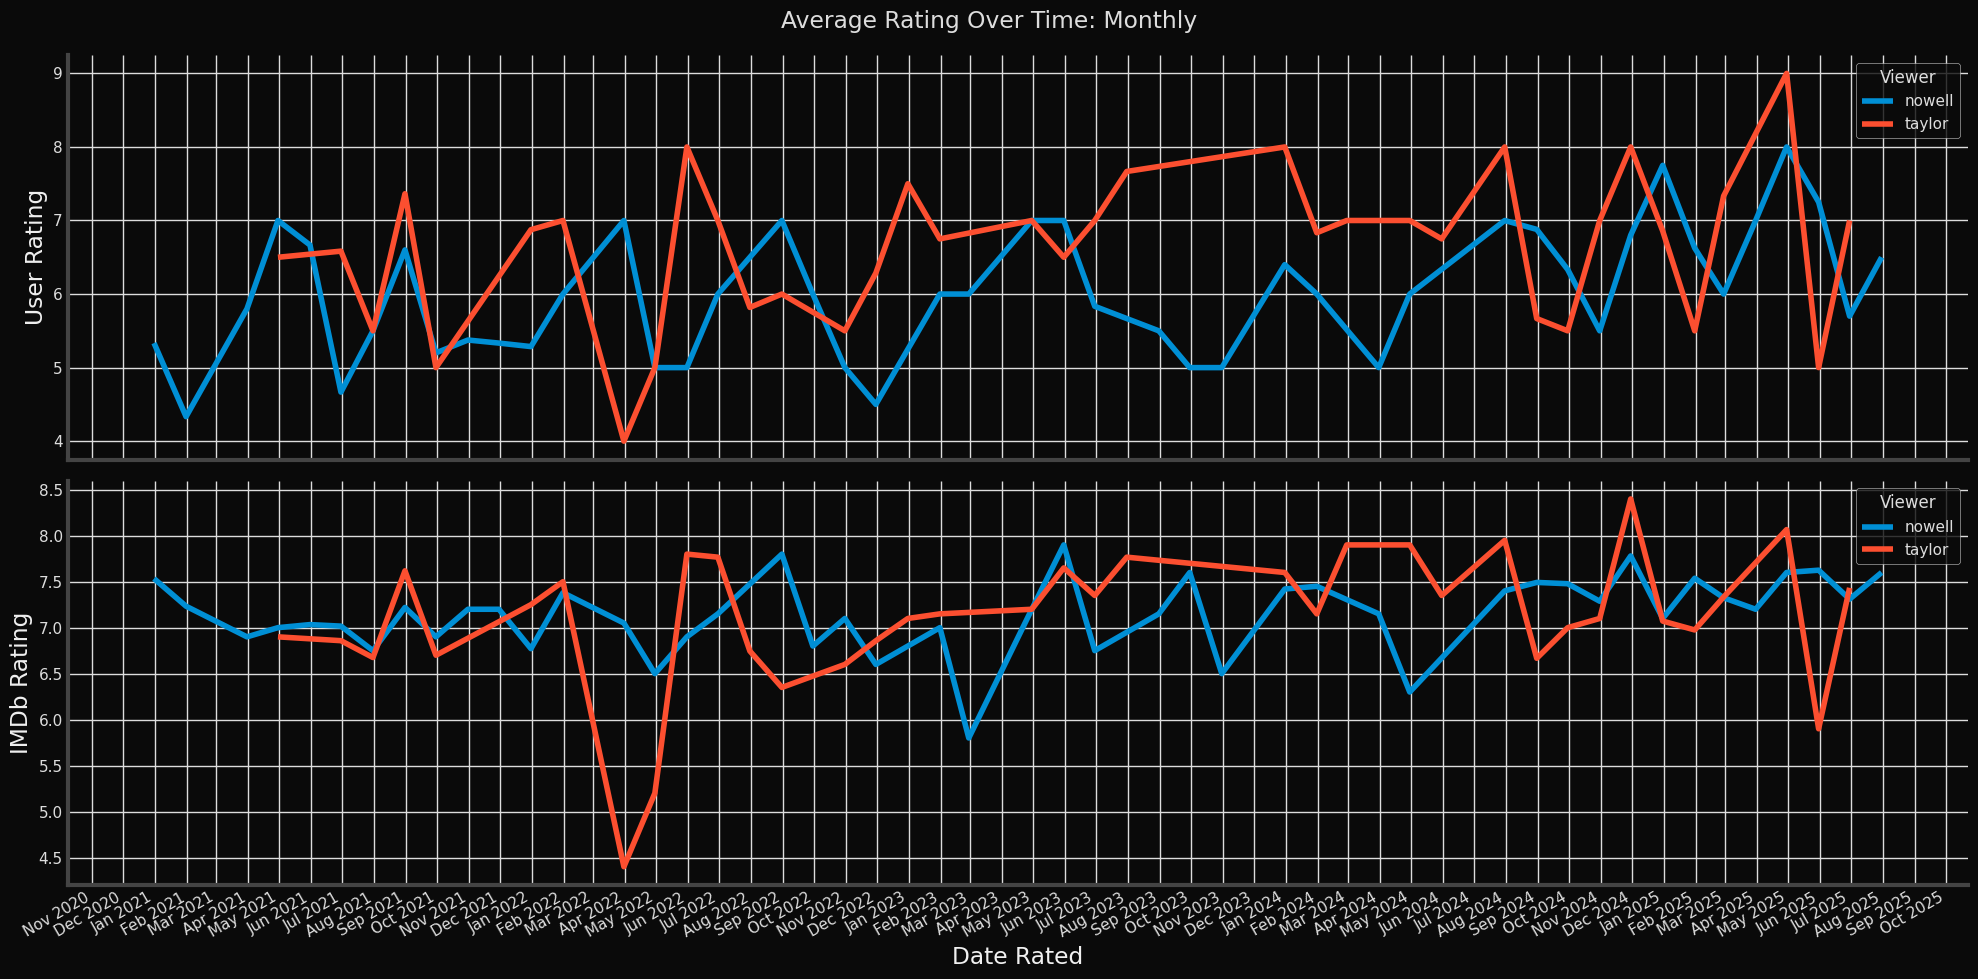

In [146]:
monthly = (
    df.groupby(['Viewer', pd.Grouper(key='Date Rated', freq='ME')])
      [['User Rating', 'IMDb Rating']].mean()
      .reset_index()
)

fig, (ax1, ax2)=plt.subplots(2,1, figsize=(20, 10), sharex=True)
fig.suptitle('Average Rating Over Time: Monthly')
g=sns.lineplot(monthly,x='Date Rated', y='User Rating', hue='Viewer', ax=ax1)
f=sns.lineplot(monthly,x='Date Rated', y='IMDb Rating', hue='Viewer', ax=ax2)
# Set x-axis to monthly ticks
ax2.xaxis.set_major_locator(mpl_dates.MonthLocator())
ax2.xaxis.set_major_formatter(mpl_dates.DateFormatter('%b %Y'))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

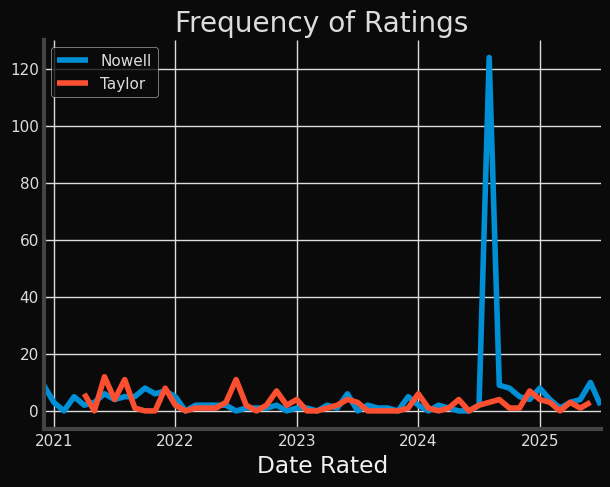

In [147]:
df[nowell].set_index('Date Rated').resample('ME')['User Rating'].count().plot(
    title='Frequency of Ratings',
    label='Nowell')
df[taylor].set_index('Date Rated').resample('ME')['User Rating'].count().plot(
    title='Frequency of Ratings',
    label='Taylor')
plt.legend()

<Axes: title={'center': 'Frequency of Ratings'}, xlabel='Date Rated'>

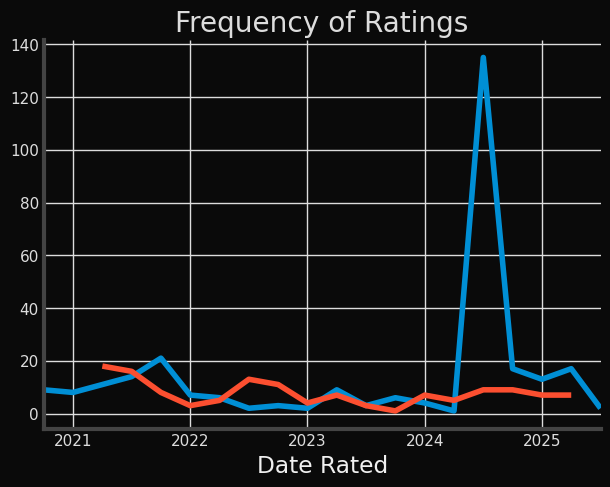

In [148]:
df[nowell].set_index('Date Rated').resample('QE')['User Rating'].count().plot(title='Frequency of Ratings')
df[taylor].set_index('Date Rated').resample('QE')['User Rating'].count().plot(title='Frequency of Ratings')

In [149]:
# # Plot average rating by when I rated
# df.groupby('Month Rated')['User Rating'].mean().plot(
#     title='Average Rating by Month Watched',
#     ylabel='My Rating',
#     xlabel='Month (1 = Jan)'
# )

# # Plot average rating by movie's release month
# df.groupby('Release Month')['User Rating'].mean().plot(
#     title='Average Rating by Release Month',
#     ylabel='My Rating',
#     xlabel='Month (1 = Jan)',
#     style='--'
# )

monthly_rating = df.groupby(['Viewer','Release Month']).agg({
    'User Rating': 'mean',
    'IMDb Rating': 'mean',
    'Title': 'count'
}).rename(columns={'Title': 'Count'}).sort_values(by=['Release Month', 'User Rating'], ascending=False)

# sns.lineplot(x=monthly_rating.index, y=monthly_rating.values)
# plt.title('Average Rating by Month')
# plt.xlabel('Date Rated')
# plt.ylabel('Average Rating')
# plt.show()

monthly_rating.reset_index()


# f=sns.relplot(data=monthly_rating, x='Release Month', y='User Rating', hue='Viewer', kind='line')
# g=sns.relplot(data=monthly_rating, x='Release Month', y='IMDb Rating', hue='Viewer', kind='line')
# .title('Average Rating by Release Month')
plt.show()

Big variation throughout the seasons.

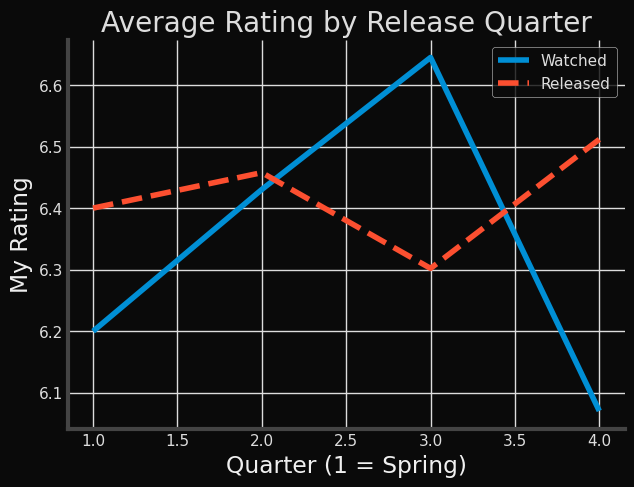

In [150]:
# Plot average rating by *when I rated*
df.groupby('Season Rated')['User Rating'].mean().plot(
    title='Average Rating by Quarter Watched',
    ylabel='My Rating',
    xlabel='Quarter (1 = Spring)'
)

# Plot average rating by *movie's release month*
df.groupby('Release Season')['User Rating'].mean().plot(
    title='Average Rating by Release Quarter',
    ylabel='My Rating',
    xlabel='Quarter (1 = Spring)',
    style='--'
)
plt.legend(['Watched', 'Released'])

Massive gulf in rating over the summer for release date. Suggests I don't love blockbusters.

In [151]:
display(df['Release Season'].value_counts())
display(df['Season Rated'].value_counts())

Release Season
4    129
2    118
3     96
1     80
Name: count, dtype: int64

Season Rated
3    197
2     86
4     85
1     55
Name: count, dtype: int64

### Hot takes

In [152]:
## Creating filters
favs=(df['User Rating']>df['IMDb Rating'])
goodmv = (df['IMDb Rating']>7)
hottake = abs(df['User Rating'] - df['IMDb Rating']) >=1
tens = df['User Rating']==10

movie_details = df.columns[:8]

In [153]:
favourite_movies_nowell = df[favs&hottake&nowell][movie_details].sort_values(
    by=['User Rating','Date Rated'], ascending= False)
print("Nowell positive hot takes",favourite_movies_nowell.shape)
favourite_movies_nowell

Nowell positive hot takes (21, 8)


Title  IMDb Rating  User Rating  Viewer  \
22                         Sinners         7.70           10  nowell   
112  Spider-Man: Across the Spi...         8.50           10  nowell   
202                   The Prestige         8.50           10  nowell   
204                The Dark Knight         9.00           10  nowell   
209             Mad Max: Fury Road         8.10           10  nowell   
105     Killers of the Flower Moon         7.60            9  nowell   
109                      Moonlight         7.40            9  nowell   
144           The Raid: Redemption         7.60            9  nowell   
148                          Tenet         7.30            9  nowell   
157                The Incredibles         8.00            9  nowell   
160                 Alien: Romulus         7.10            9  nowell   
179                        Chicago         7.20            9  nowell   
210        Furiosa: A Mad Max Saga         7.50            9  nowell   
213  Everything Everywhere All ...         7.80            9  nowell   
19                       Companion         6.90            8  nowell   
41                     Rebel Ridge         6.80            8  nowell   
43              It's What's Inside         6.60            8  nowell   
76                 It: Chapter Two         6.50            8  nowell   
172                    Escape Room         6.40            8  nowell   
245                         Fast X         5.70            7  nowell   
306                  Scary Movie 2         5.40            7  nowell   

    Release Date                Date Rated  Box Office Millions  \
22    2025-04-18 2025-04-18 21:35:56+00:00               278.58   
112   2023-06-02 2024-08-29 20:31:27+00:00               381.59   
202   2006-10-20 2024-08-09 04:48:51+00:00                53.09   
204   2008-07-18 2024-08-09 04:48:41+00:00               534.99   
209   2015-05-15 2024-08-09 04:46:27+00:00               154.28   
105   2023-10-20 2024-08-29 20:32:45+00:00                68.04   
109   2016-11-18 2024-08-29 20:32:10+00:00                27.85   
144   2012-04-13 2024-08-29 20:10:31+00:00                 4.11   
148   2020-09-03 2024-08-29 20:09:11+00:00                58.50   
157   2004-11-05 2024-08-26 19:47:37+00:00               261.44   
160   2024-08-16 2024-08-22 00:05:30+00:00               105.31   
179   2003-01-24 2024-08-09 05:37:38+00:00               170.69   
210   2024-05-24 2024-08-08 00:31:35+00:00                67.48   
213   2022-04-08 2024-08-06 04:11:21+00:00                77.19   
19    2025-01-31 2025-05-10 18:57:14+00:00                20.81   
41    2024-09-06 2024-12-23 13:37:54+00:00                  NaN   
43    2024-10-04 2024-12-20 21:01:11+00:00                  NaN   
76    2019-09-06 2024-08-30 06:57:51+00:00               211.62   
172   2019-01-04 2024-08-09 05:38:24+00:00                57.01   
245   2023-05-19 2023-06-07 00:00:00+00:00               146.13   
306   2001-07-04 2021-08-15 00:00:00+00:00                71.31   

     Num Votes Thousands  
22                221.29  
112               468.14  
202              1521.17  
204              3044.55  
209              1174.44  
105               286.53  
109               343.88  
144               225.07  
148               629.81  
157               855.56  
160               256.97  
179               251.49  
210               294.42  
213               586.47  
19                124.27  
41                 89.27  
43                 36.14  
76                327.78  
172               152.66  
245               136.61  
306               184.70

In [154]:
favourite_movies_taylor = df[favs&hottake&taylor][movie_details].sort_values(by=['User Rating','Date Rated'], ascending= False)
print("Taylor positive hot takes",favourite_movies_taylor.shape)
favourite_movies_taylor

Taylor positive hot takes (2, 8)


Title  IMDb Rating  User Rating  Viewer Release Date  \
23      Sinners         7.70           10  taylor   2025-04-18   
415  Shark Tale         6.00            7  taylor   2004-10-01   

                   Date Rated  Box Office Millions  Num Votes Thousands  
23  2025-04-18 22:20:16+00:00               278.58               221.29  
415 2021-06-08 00:00:00+00:00               160.86               205.96

In [155]:
hottake_nowell = df[hottake&nowell][movie_details].sort_values(by=['User Rating','Date Rated'], ascending= False)
print("Nowell hot takes",hottake_nowell.shape)
hottake_nowell

Nowell hot takes (140, 8)


Title  IMDb Rating  User Rating  Viewer  \
22                         Sinners         7.70           10  nowell   
112  Spider-Man: Across the Spi...         8.50           10  nowell   
202                   The Prestige         8.50           10  nowell   
204                The Dark Knight         9.00           10  nowell   
209             Mad Max: Fury Road         8.10           10  nowell   
105     Killers of the Flower Moon         7.60            9  nowell   
109                      Moonlight         7.40            9  nowell   
144           The Raid: Redemption         7.60            9  nowell   
148                          Tenet         7.30            9  nowell   
157                The Incredibles         8.00            9  nowell   
160                 Alien: Romulus         7.10            9  nowell   
179                        Chicago         7.20            9  nowell   
210        Furiosa: A Mad Max Saga         7.50            9  nowell   
213  Everything Everywhere All ...         7.80            9  nowell   
19                       Companion         6.90            8  nowell   
41                     Rebel Ridge         6.80            8  nowell   
43              It's What's Inside         6.60            8  nowell   
76                 It: Chapter Two         6.50            8  nowell   
172                    Escape Room         6.40            8  nowell   
199                   12 Angry Men         9.00            8  nowell   
47                  The Wild Robot         8.20            7  nowell   
48                   The Godfather         9.20            7  nowell   
68                     Rear Window         8.50            7  nowell   
75         Raiders of the Lost Ark         8.40            7  nowell   
154     Terminator 2: Judgment Day         8.60            7  nowell   
163                         Aliens         8.40            7  nowell   
164                      Gladiator         8.50            7  nowell   
178  Dr. Strangelove or: How I ...         8.30            7  nowell   
220                             Up         8.30            7  nowell   
245                         Fast X         5.70            7  nowell   
306                  Scary Movie 2         5.40            7  nowell   
316                    Wolfwalkers         8.00            7  nowell   
0                         Hercules         7.30            6  nowell   
9             Crazy, Stupid, Love.         7.40            6  nowell   
28                Transformers One         7.60            6  nowell   
30                           Rocky         8.10            6  nowell   
45             Mission: Impossible         7.20            6  nowell   
49                 Sleeping Beauty         7.20            6  nowell   
50      10 Things I Hate About You         7.30            6  nowell   
54                       Chinatown         8.10            6  nowell   
55        The Pursuit of Happyness         8.00            6  nowell   
56             The Prince of Egypt         7.20            6  nowell   
65                     Poor Things         7.80            6  nowell   
70                        Megamind         7.30            6  nowell   
72                Edge of Tomorrow         7.90            6  nowell   
102                   Perfect Days         7.90            6  nowell   
127                       Predator         7.80            6  nowell   
155  Star Wars: Episode IV - A ...         8.60            6  nowell   
211                     Black Swan         8.00            6  nowell   
212               X2: X-Men United         7.40            6  nowell   
215                        Monster         7.80            6  nowell   
227                        Aladdin         8.00            6  nowell   
229                       Coraline         7.80            6  nowell   
234                          Moana         7.60            6  nowell   
242                   The Platform         7.00            6  nowell 

In [156]:
hottake_taylor = df[hottake&taylor][movie_details].sort_values(by=['User Rating','Date Rated'], ascending= False)
print("Taylor positive hot takes",hottake_taylor.shape)
hottake_taylor

Taylor positive hot takes (28, 8)


Title  IMDb Rating  User Rating  Viewer  \
23                         Sinners         7.70           10  taylor   
107                    Oppenheimer         8.30            7  taylor   
406             The Imitation Game         8.00            7  taylor   
415                     Shark Tale         6.00            7  taylor   
353                     Prometheus         7.00            6  taylor   
355                  A Quiet Place         7.50            6  taylor   
230                       Coraline         7.80            6  taylor   
359  War for the Planet of the ...         7.40            6  taylor   
126                           Prey         7.10            6  taylor   
235                          Moana         7.60            6  taylor   
374                    The Goonies         7.70            6  taylor   
384                Kung Fu Panda 3         7.10            6  taylor   
388                          Elvis         7.30            6  taylor   
225                  Pitch Perfect         7.10            6  taylor   
413      Ralph Breaks the Internet         7.00            6  taylor   
344                  The Lion King         6.80            5  taylor   
354                    Beetlejuice         7.50            5  taylor   
380                 Wendell & Wild         6.40            5  taylor   
294  Shang-Chi and the Legend o...         7.30            5  taylor   
389                      Uncharted         6.30            5  taylor   
403               Attack the Block         6.70            5  taylor   
423                  Someone Great         6.20            5  taylor   
345                      Civil War         7.00            4  taylor   
61          A Quiet Place: Day One         6.30            4  taylor   
386          The Croods: A New Age         6.90            4  taylor   
400                      Come Away         5.70            4  taylor   
82   Once Upon a Time... in Hol...         7.60            4  taylor   
401                        The Nun         5.40            3  taylor   

    Release Date                Date Rated  Box Office Millions  \
23    2025-04-18 2025-04-18 22:20:16+00:00               278.58   
107   2023-07-21 2024-01-27 00:00:00+00:00               330.08   
406   2014-12-25 2021-08-07 00:00:00+00:00                91.13   
415   2004-10-01 2021-06-08 00:00:00+00:00               160.86   
353   2012-06-08 2024-09-29 18:16:35+00:00               126.48   
355   2018-04-06 2024-08-22 20:32:36+00:00               188.02   
230   2009-02-06 2024-08-21 14:15:27+00:00               116.90   
359   2017-07-14 2024-05-17 00:00:00+00:00               146.88   
126   2022-08-05 2023-06-14 00:00:00+00:00                  NaN   
235   2016-11-23 2023-05-20 00:00:00+00:00               248.76   
374   1985-06-07 2022-11-28 00:00:00+00:00                63.71   
384   2016-01-29 2022-07-14 00:00:00+00:00               143.53   
388   2022-06-24 2022-07-05 00:00:00+00:00               151.04   
225   2012-10-05 2021-08-06 00:00:00+00:00                65.30   
413   2018-11-21 2021-06-11 00:00:00+00:00               201.09   
344   2019-07-19 2025-01-05 20:29:47+00:00               543.64   
354   1988-03-30 2024-09-12 22:34:14+00:00                74.66   
380   2022-10-28 2022-10-29 00:00:00+00:00                  NaN   
294   2021-09-03 2022-07-09 00:00:00+00:00               224.54   
389   2022-02-18 2022-07-03 00:00:00+00:00               148.65   
403   2011-05-13 2021-09-12 00:00:00+00:00                 1.02   
423   2019-04-19 2021-04-04 00:00:00+00:00                  NaN   
345   2024-04-12 2025-01-05 14:21:43+00:00                68.76   
61    2024-06-28 2024-09-20 21:29:23+00:00               139.05   
386   2020-11-25 2022-07-14 00:00:00+00:00                58.57   
400   2020-11-13 2021-12-18 00:00:00+00:00                 0.18   
82    2019-07-26 2021-07-25 00:00:00+00:00               142.50   
401   2018-09-07 2021-12-14 00:00:00+00:00               117.48 

In [228]:
# Using SD to find the outliers
df['Difference'] = df['User Rating'] - df['IMDb Rating']

mean_diff = df['Difference'].mean()
std_diff = df['Difference'].std()

threshold = 2 * std_diff
df['Hot_Take'] = df['Difference'].abs() > threshold
df.loc[df['Hot_Take']]

Title  IMDb Rating  User Rating  Viewer  \
4                    Force Majeure         7.20            3  nowell   
6                   Shutter Island         8.20            5  nowell   
13                           Drive         7.80            4  nowell   
15                    The Fall Guy         6.80            4  nowell   
33                     Source Code         7.50            4  nowell   
52                         Ice Age         7.50            3  nowell   
59                    Bullet Train         7.30            4  nowell   
71   Star Wars: Episode VIII - ...         6.90            4  nowell   
78                           Joker         8.30            4  nowell   
81   Once Upon a Time... in Hol...         7.60            4  nowell   
82   Once Upon a Time... in Hol...         7.60            4  taylor   
84       A Silent Voice: The Movie         8.10            5  nowell   
93        The Strangers: Chapter 1         4.60            1  nowell   
110                      The Flash         6.60            1  nowell   
146                          Dredd         7.10            2  nowell   
188                       Bad Boys         6.80            2  nowell   
189                    Bad Boys II         6.60            2  nowell   
190             Back to the Future         8.50            5  nowell   
195                  6 Underground         6.10            2  nowell   
198                      12 Rounds         5.60            2  nowell   
238                           Heat         8.30            5  nowell   
243   The Babysitter: Killer Queen         5.80            2  nowell   
252                  Resident Evil         6.60            3  nowell   
260          The Road to El Dorado         6.90            4  nowell   
267                        Encanto         7.20            4  nowell   
276      Spider-Man: Far from Home         7.40            4  nowell   
281              Fantastic Mr. Fox         7.90            5  nowell   
287     Dave Chappelle: The Closer         7.90            5  nowell   
298             Olympus Has Fallen         6.50            2  nowell   
300          A Quiet Place Part II         7.20            3  nowell   
312                           Soul         8.00            4  nowell   
313                  Hotel Artemis         6.10            3  nowell   
314                      Midsommar         7.10            3  nowell   
326                       Headshot         6.30            3  nowell   
331                   Blade Runner         8.10            3  nowell   
336              Kill Bill: Vol. 1         8.20            5  nowell   
337              Kill Bill: Vol. 2         8.00            5  nowell   
338              Blade Runner 2049         8.00            4  nowell   
339           Howl's Moving Castle         8.20            4  nowell   
345                      Civil War         7.00            4  taylor   
386          The Croods: A New Age         6.90            4  taylor   

    Release Date                Date Rated  Box Office Millions  \
4     2014-12-30 2025-06-15 22:10:22+00:00                 1.36   
6     2010-02-19 2025-06-03 19:43:59+00:00               128.01   
13    2011-09-16 2025-06-01 00:00:00+00:00                35.06   
15    2024-05-03 2025-06-01 00:00:00+00:00                92.90   
33    2011-04-01 2025-01-15 20:56:42+00:00                54.71   
52    2002-03-15 2024-10-10 22:07:51+00:00               176.39   
59    2022-08-05 2024-09-20 00:00:00+00:00               103.37   
71    2017-12-15 2024-08-30 06:59:27+00:00               620.18   
78    2019-10-04 2024-08-30 06:56:47+00:00               335.48   
81    2019-07-26 2024-08-30 06:56:16+00:00               142.50   
82    2019-07-26 2021-07-25 00:00:00+00:00               142.50   
84    2016-09-17 2024-08-30 06:55:47+00:00                 1.08   
93    2024-05-17 2024-08-29 20:38:44+00:00                35.20   
110   2023-06-16 2024-08-29 20:32:04+00:00               108.13   

In [158]:
# Using SD to find the outliers
df['Difference'] = df['User Rating'] - df['IMDb Rating']

mean_diff = df['Difference'].mean()
std_diff = df['Difference'].std()

threshold = 1.5 * std_diff
df['Hot_Take'] = df['Difference'].abs() > threshold
df.loc[df['Hot_Take']]

# Add labels
def label_hot_take(row):
    if row['Difference'] > threshold:
        return 'Overrated by Me'
    elif row['Difference'] < -threshold:
        return 'Underrated by Me'
    else:
        return 'Normal'

df['Hot_Take_Label'] = df.apply(label_hot_take, axis=1)

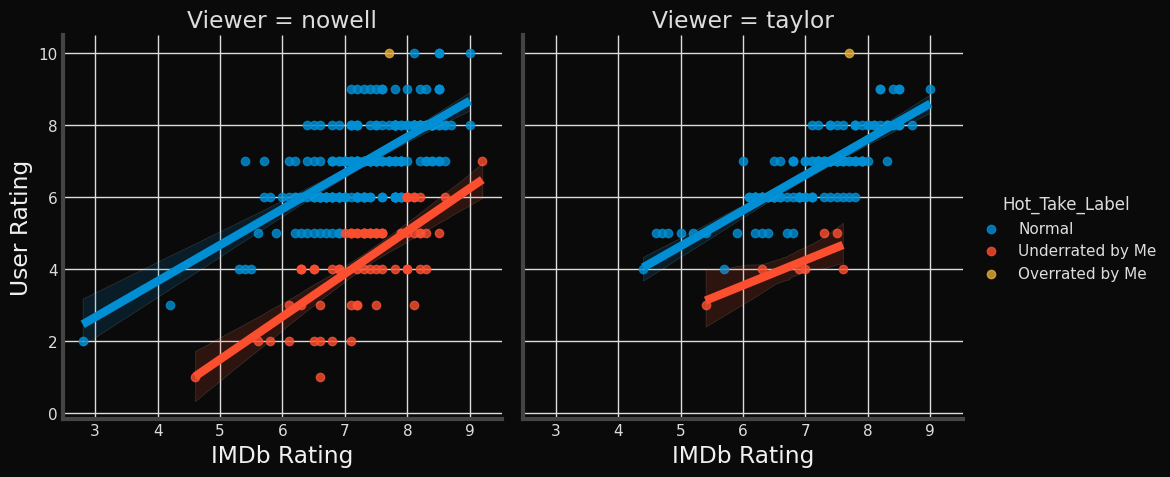

In [229]:
sns.lmplot(data=df, x='IMDb Rating', y='User Rating',
                hue='Hot_Take_Label',col='Viewer')
# plt.plot([0, 10], [0, 10], linestyle='--', color='gray')  # Line of fit
# fig.title('User Ratings vs IMDb Rating')
fig.legend(title='Hot Take Status')
plt.show()

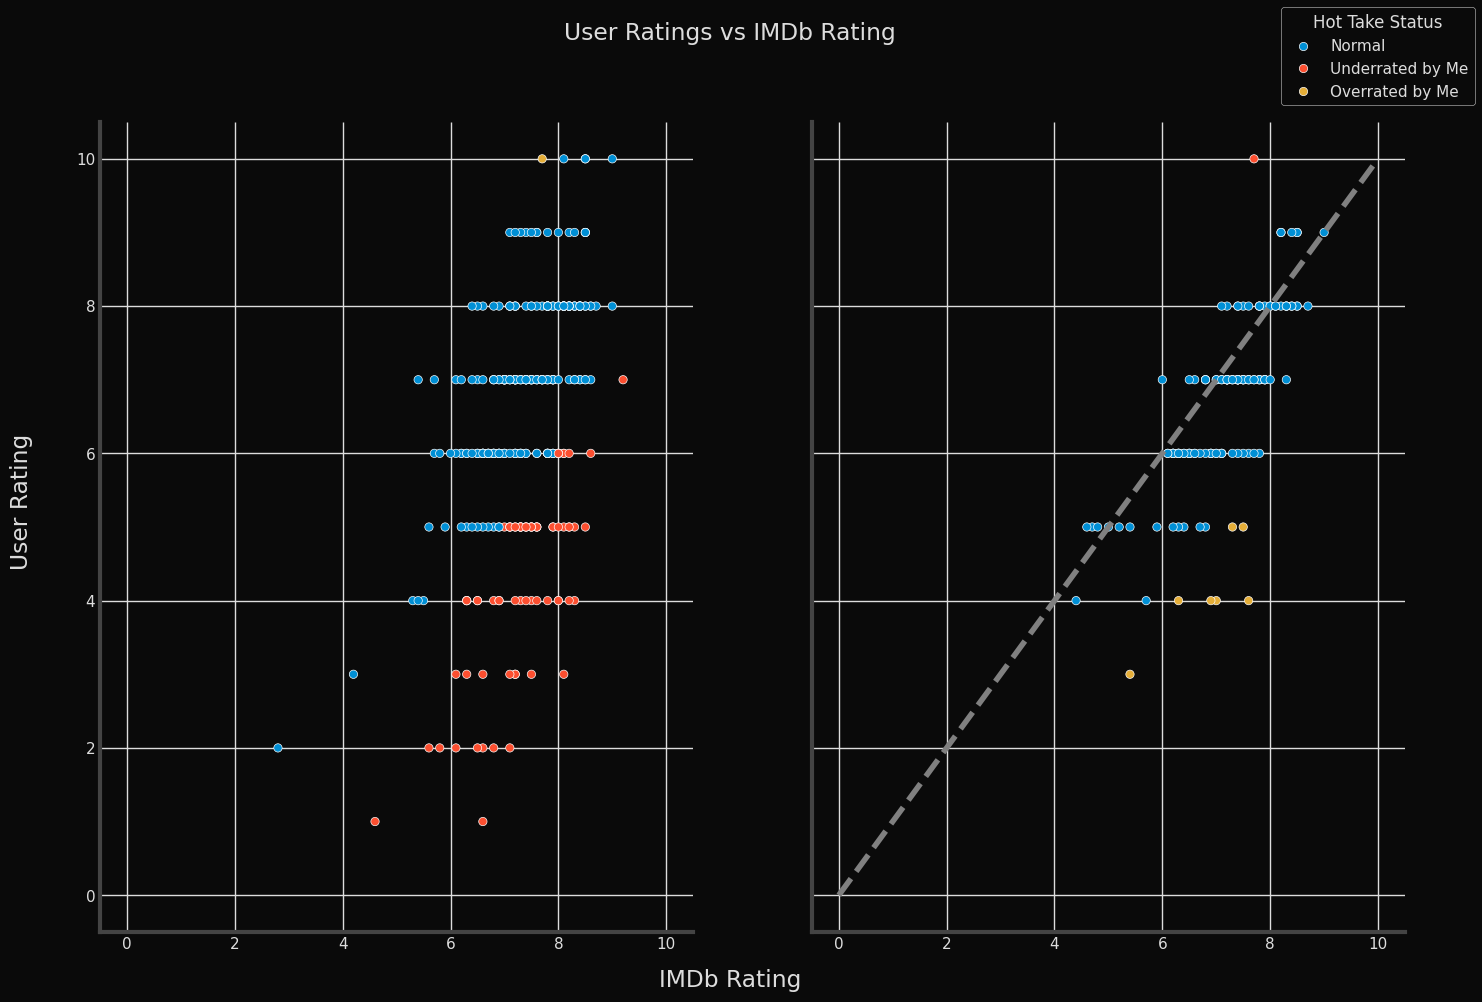

In [230]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10), sharey=True, sharex=True)
sns.scatterplot(data=df[nowell], x='IMDb Rating', y='User Rating',
                hue='Hot_Take_Label', ax=ax1)
sns.scatterplot(data=df[taylor], x='IMDb Rating', y='User Rating',
                hue='Hot_Take_Label', legend=False,
                ax=ax2)
plt.plot([0, 10], [0, 10], linestyle='--', color='gray')  # Line of fit
fig.suptitle('User Ratings vs IMDb Rating')
fig.supxlabel('IMDb Rating')
fig.supylabel('User Rating')
ax1.legend_.remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
fig.legend(title='Hot Take Status')
plt.show()

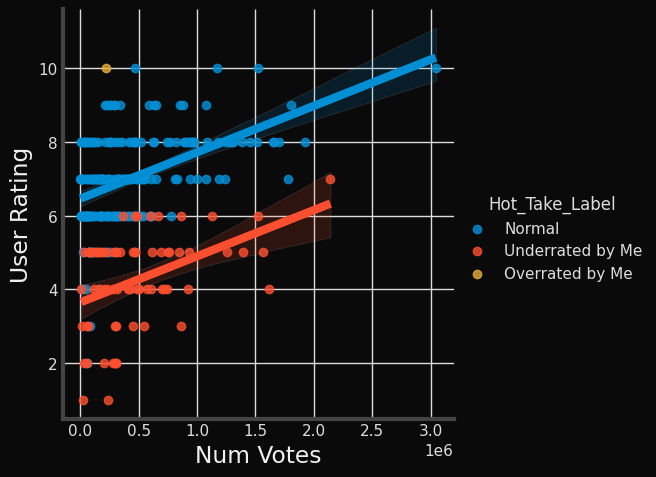

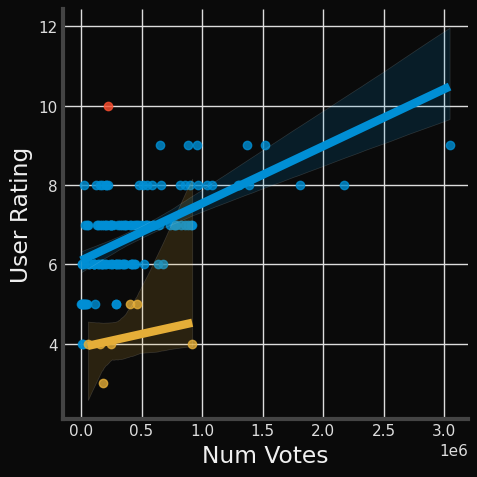

In [162]:
sns.lmplot(data=df[nowell], x='Num Votes', y='User Rating',
                hue='Hot_Take_Label')
sns.lmplot(data=df[taylor], x='Num Votes', y='User Rating',
                hue='Hot_Take_Label', legend=False,)

/tmp/ipython-input-2260992483.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hot Take Status')


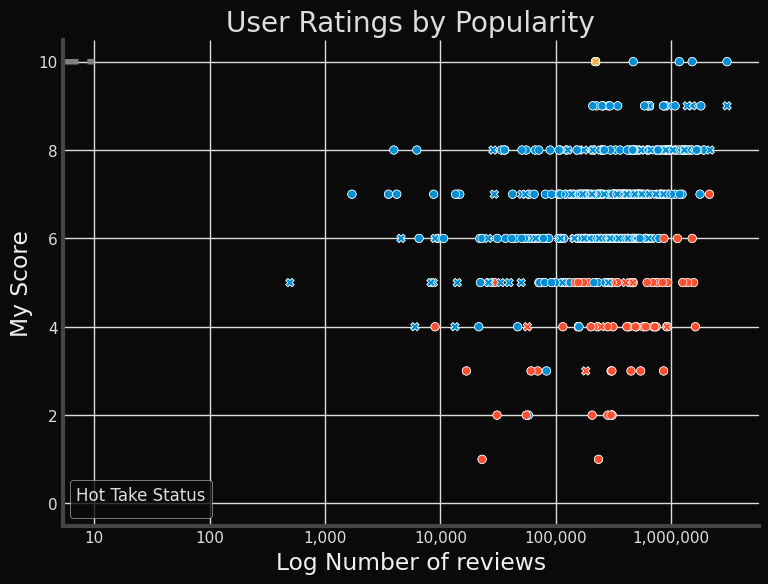

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Num Votes', y='User Rating',
                hue='Hot_Take_Label',style='Viewer', legend=False)
sns.scatterplot(data=df, x='Num Votes', y='User Rating',
                hue='Hot_Take_Label',style='Viewer', legend=False)
plt.plot([0, 10], [0, 10], linestyle='--', color='gray')
plt.title('User Ratings by Popularity')
plt.xscale('log')
plt.xlabel('Log Number of reviews')
plt.ylabel('My Score')
plt.legend(title='Hot Take Status')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

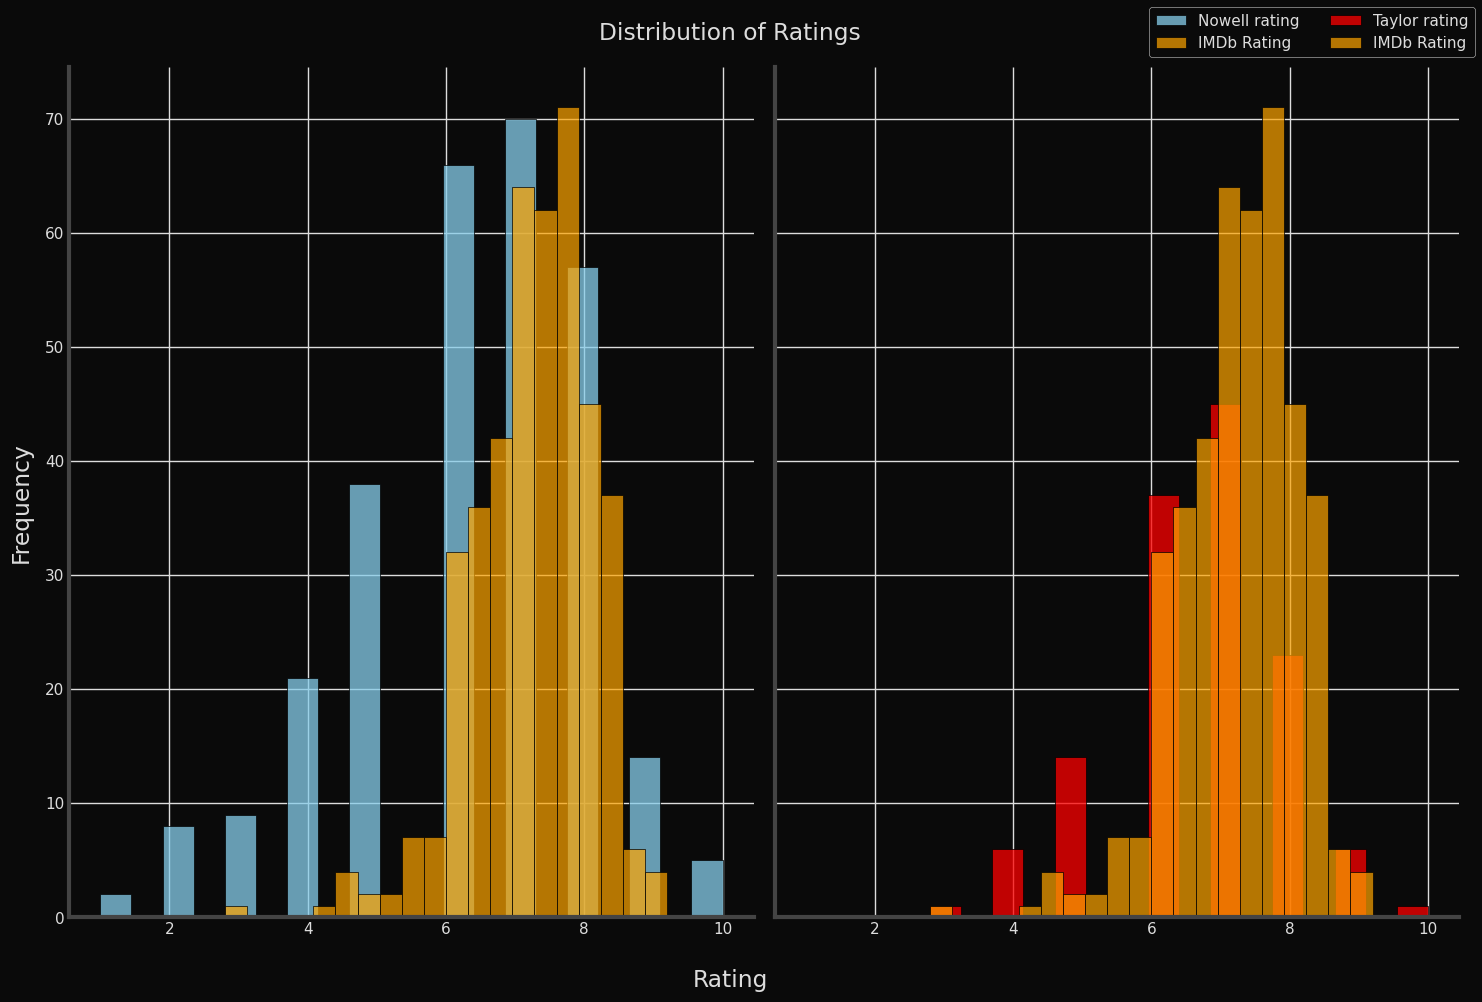

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10), sharey=True)
g=sns.histplot(df.loc[nowell]['User Rating'],
             bins=20, ax=ax1,
             color='skyblue', edgecolor='black',
             label = 'Nowell rating', legend=True)
f=sns.histplot(df['IMDb Rating'],
               bins=20, color='orange', edgecolor='black',
               alpha=0.7, ax=ax1,
               label = 'IMDb Rating', legend=True)

sns.histplot(df.loc[taylor]['User Rating'],
             bins=20,  binrange=(1,10),
             color='red', edgecolor='black',
             label = 'Taylor rating', ax=ax2)
sns.histplot(df['IMDb Rating'],
             bins=20, color='orange', edgecolor='black',
             alpha=0.7, ax=ax2,
             label = 'IMDb Rating', legend=True)
fig.suptitle('Distribution of Ratings')
fig.supxlabel('Rating')
fig.supylabel('Frequency')
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
fig.legend(loc='upper right', ncols=2)
plt.tight_layout()
plt.show()

#### How mainstream are our tastes?


#### Votes

In [165]:
df.groupby('Viewer')['Num Votes'].describe()

count      mean       std     min       25%       50%       75%  \
Viewer                                                                    
nowell 290.00 439992.60 447407.65 1709.00 121364.75 303491.00 594335.75   
taylor 133.00 441434.47 448109.27  496.00 156931.00 315980.00 594972.00   

              max  
Viewer             
nowell 3044547.00  
taylor 3044547.00

In [166]:
# Most popular movies in the df
display(df[nowell][movie_details].sort_values(by = 'Num Votes Thousands',ascending=False).head(30))
display(df[taylor][movie_details].sort_values(by = 'Num Votes Thousands',ascending=False).head(30))

Title  IMDb Rating  User Rating  Viewer  \
204                The Dark Knight         9.00           10  nowell   
48                   The Godfather         9.20            7  nowell   
37           The Dark Knight Rises         8.40            8  nowell   
16                Django Unchained         8.50            9  nowell   
164                      Gladiator         8.50            7  nowell   
147           Inglourious Basterds         8.40            8  nowell   
221                  Batman Begins         8.20            8  nowell   
91        The Silence of the Lambs         8.60            8  nowell   
78                           Joker         8.30            4  nowell   
6                   Shutter Island         8.20            5  nowell   
202                   The Prestige         8.50           10  nowell   
155  Star Wars: Episode IV - A ...         8.60            6  nowell   
191                   The Avengers         8.00            8  nowell   
98   Star Wars: Episode V - The...         8.70            8  nowell   
190             Back to the Future         8.50            5  nowell   
218                        Memento         8.40            8  nowell   
156         Léon: The Professional         8.50            8  nowell   
216                The Truman Show         8.20            8  nowell   
64   Pirates of the Caribbean: ...         8.10            8  nowell   
336              Kill Bill: Vol. 1         8.20            5  nowell   
21                 American Beauty         8.30            8  nowell   
154     Terminator 2: Judgment Day         8.60            7  nowell   
220                             Up         8.30            7  nowell   
183            Catch Me If You Can         8.10            8  nowell   
209             Mad Max: Fury Road         8.10           10  nowell   
272                  Jurassic Park         8.20            6  nowell   
130                       Whiplash         8.50            8  nowell   
75         Raiders of the Lost Ark         8.40            7  nowell   
200                       Parasite         8.50            9  nowell   
307  Star Wars: Episode VII - T...         7.80            7  nowell   

    Release Date                Date Rated  Box Office Millions  \
204   2008-07-18 2024-08-09 04:48:41+00:00               534.99   
48    1972-03-24 2024-11-01 19:39:44+00:00               136.38   
37    2012-07-20 2025-01-03 17:39:58+00:00               448.15   
16    2012-12-25 2025-05-19 19:33:35+00:00               162.81   
164   2000-05-05 2024-08-10 07:52:49+00:00               187.71   
147   2009-08-21 2024-08-29 20:09:36+00:00               120.54   
221   2005-06-15 2024-07-29 19:22:37+00:00               206.86   
91    1991-02-14 2024-08-29 20:39:01+00:00               130.74   
78    2019-10-04 2024-08-30 06:56:47+00:00               335.48   
6     2010-02-19 2025-06-03 19:43:59+00:00               128.01   
202   2006-10-20 2024-08-09 04:48:51+00:00                53.09   
155   1977-05-25 2024-08-29 19:42:04+00:00               461.00   
191   2012-05-04 2024-08-09 05:35:25+00:00               623.36   
98    1980-06-18 2024-08-29 20:37:58+00:00               292.75   
190   1985-07-03 2024-08-09 05:35:33+00:00               214.55   
218   2001-05-25 2024-08-03 14:13:57+00:00                25.54   
156   1994-11-18 2024-08-29 19:41:48+00:00                19.50   
216   1998-06-05 2024-08-03 14:14:23+00:00               125.62   
64    2003-07-09 2024-09-12 11:30:05+00:00               305.41   
336   2003-10-10 2020-12-17 00:00:00+00:00                70.10   
21    1999-10-01 2025-04-20 11:19:27+00:00               130.10   
154   1991-07-03 2024-08-29 19:42:09+00:00               205.88   
220   2009-07-23 2024-08-03 14:13:39+00:00               293.00   
183   2002-12-25 2024-08-09 05:37:19+00:00               164.62   
209   2015-05-15 2024-08-09 04:46:27+00:00               154.28   
272   1993-06-11 2021-12-26 00:00:00+00:00            

Title  IMDb Rating  User Rating  Viewer  \
205                The Dark Knight         9.00            9  taylor   
407                     The Matrix         8.70            8  taylor   
17                Django Unchained         8.50            8  taylor   
203                   The Prestige         8.50            9  taylor   
219                        Memento         8.40            8  taylor   
398              Avengers: Endgame         8.40            9  taylor   
357         Avengers: Infinity War         8.40            8  taylor   
217                The Truman Show         8.20            8  taylor   
201                       Parasite         8.50            8  taylor   
412                 Monsters, Inc.         8.10            8  taylor   
177                 Dune: Part One         8.00            8  taylor   
132        Spider-Man: No Way Home         8.20            9  taylor   
82   Once Upon a Time... in Hol...         7.60            4  taylor   
107                    Oppenheimer         8.30            7  taylor   
368  Harry Potter and the Sorce...         7.70            7  taylor   
402                          Logan         8.10            8  taylor   
118                     The Batman         7.80            7  taylor   
141                      Prisoners         8.20            9  taylor   
406             The Imitation Game         8.00            7  taylor   
158                The Incredibles         8.00            8  taylor   
207                        Arrival         7.90            7  taylor   
137                     Knives Out         7.90            8  taylor   
367                      John Wick         7.50            7  taylor   
391                          Shrek         7.90            7  taylor   
399         Spider-Man: Homecoming         7.40            7  taylor   
410                 Now You See Me         7.20            7  taylor   
353                     Prometheus         7.00            6  taylor   
393                   The Notebook         7.80            8  taylor   
175                 Dune: Part Two         8.50            9  taylor   
377                   Men in Black         7.30            7  taylor   

    Release Date                Date Rated  Box Office Millions  \
205   2008-07-18 2021-08-02 00:00:00+00:00               534.99   
407   1999-03-31 2021-08-02 00:00:00+00:00               172.08   
17    2012-12-25 2021-04-04 00:00:00+00:00               162.81   
203   2006-10-20 2021-12-23 00:00:00+00:00                53.09   
219   2001-05-25 2024-11-18 15:41:38+00:00                25.54   
398   2019-04-26 2021-12-19 00:00:00+00:00               858.37   
357   2018-04-27 2024-07-11 13:45:20+00:00               678.82   
217   1998-06-05 2021-04-09 00:00:00+00:00               125.62   
201   2019-11-08 2021-08-02 00:00:00+00:00                53.85   
412   2001-11-23 2021-06-11 00:00:00+00:00               290.64   
177   2021-10-22 2025-04-19 00:06:29+00:00               108.90   
132   2021-12-17 2021-12-18 00:00:00+00:00               814.87   
82    2019-07-26 2021-07-25 00:00:00+00:00               142.50   
107   2023-07-21 2024-01-27 00:00:00+00:00               330.08   
368   2001-11-16 2023-05-22 00:00:00+00:00               318.89   
402   2017-03-03 2021-12-04 00:00:00+00:00               226.28   
118   2022-03-04 2022-06-22 00:00:00+00:00               369.35   
141   2013-09-20 2021-08-04 00:00:00+00:00                61.00   
406   2014-12-25 2021-08-07 00:00:00+00:00                91.13   
158   2004-11-05 2023-07-02 00:00:00+00:00               261.44   
207   2016-11-11 2024-04-01 00:00:00+00:00               100.55   
137   2019-11-27 2021-08-06 00:00:00+00:00               165.36   
367   2014-10-24 2023-06-07 00:00:00+00:00                43.04   
391   2001-05-18 2022-06-22 00:00:00+00:00               268.70   
399   2017-07-07 2021-12-18 00:00:00+00:00               334.95   
410   2013-05-31 2021-07-25 00:00:00+00:00            

In [231]:
# Least popular movies in the df
display(df[nowell][movie_details].sort_values(by = 'Num Votes Thousands',ascending=True).head(30))
display(df[taylor][movie_details].sort_values(by = 'Num Votes Thousands',ascending=True).head(30))

Title  IMDb Rating  User Rating  Viewer  \
1               KPop Demon Hunters         7.90            7  nowell   
165                      The Lorax         7.90            7  nowell   
342           Dave Chappelle: 8:46         8.10            8  nowell   
268    Hilda and the Mountain King         7.70            7  nowell   
88   Konosuba!: God's Blessing ...         7.80            8  nowell   
162               Ultraman: Rising         6.90            6  nowell   
32   Humanist Vampire Seeking C...         7.00            7  nowell   
334                     Blue Story         6.30            4  nowell   
249                  Falcon Rising         5.80            6  nowell   
305  Steins;Gate: The Movie - L...         7.80            6  nowell   
299            The Young Offenders         7.10            7  nowell   
5                 One of Them Days         6.50            7  nowell   
244                       Rye Lane         7.20            7  nowell   
326                       Headshot         6.30            3  nowell   
83             Fullmetal Alchemist         5.30            4  nowell   
3            Two Distant Strangers         6.90            6  nowell   
97                          Exhuma         6.90            5  nowell   
93        The Strangers: Chapter 1         4.60            1  nowell   
239                 The Blackening         6.00            6  nowell   
287     Dave Chappelle: The Closer         7.90            5  nowell   
198                      12 Rounds         5.60            2  nowell   
250           Matilda: The Musical         7.00            6  nowell   
142             Millennium Actress         7.80            8  nowell   
303                   Queen & Slim         7.10            8  nowell   
43              It's What's Inside         6.60            8  nowell   
215                        Monster         7.80            6  nowell   
270    The People Under the Stairs         6.40            6  nowell   
316                    Wolfwalkers         8.00            7  nowell   
222             They Cloned Tyrone         6.60            6  nowell   
308              The Forever Purge         5.40            4  nowell   

    Release Date                Date Rated  Box Office Millions  \
1     2025-06-20 2025-07-01 11:56:19+00:00                  NaN   
165   1972-02-14 2024-08-10 07:52:34+00:00                  NaN   
342   2020-06-12 2020-12-16 00:00:00+00:00                  NaN   
268   2021-12-30 2022-01-30 00:00:00+00:00                  NaN   
88    2019-08-30 2024-08-30 06:55:24+00:00                 1.13   
162   2024-06-14 2024-08-16 12:17:31+00:00                  NaN   
32    2024-02-15 2025-01-18 20:08:50+00:00                 0.02   
334   2020-05-05 2020-12-22 00:00:00+00:00                  NaN   
249   2014-09-04 2023-02-27 00:00:00+00:00                 0.01   
305   2013-04-20 2021-08-27 00:00:00+00:00                  NaN   
299   2016-09-16 2021-09-04 00:00:00+00:00                  NaN   
5     2025-01-17 2025-06-11 23:26:44+00:00                50.05   
244   2023-03-31 2023-06-11 00:00:00+00:00                  NaN   
326   2017-03-03 2021-03-26 00:00:00+00:00                  NaN   
83    2017-12-01 2024-08-30 06:56:10+00:00                  NaN   
3     2020-11-20 2025-06-28 18:27:50+00:00                  NaN   
97    2024-02-22 2024-08-29 20:38:05+00:00                 2.31   
93    2024-05-17 2024-08-29 20:38:44+00:00                35.20   
239   2023-06-16 2023-08-03 00:00:00+00:00                17.71   
287   2021-10-05 2021-10-19 00:00:00+00:00                  NaN   
198   2009-03-27 2024-08-09 05:33:43+00:00                12.23   
250   2022-12-25 2023-01-12 00:00:00+00:00                  NaN   
142   2002-09-14 2024-08-29 20:10:49+00:00                 0.26   
303   2019-11-27 2021-08-30 00:00:00+00:00                43.81   
43    2024-10-04 2024-12-20 21:01:11+00:00                  NaN   
215   2023-11-22 2024-08-06 04:03:27+00:00            

Title  IMDb Rating  User Rating  Viewer  \
421                    The Weekend         4.60            5  taylor   
381              A Jazzman's Blues         6.80            6  taylor   
400                      Come Away         5.70            4  taylor   
385                  Nobody's Fool         5.00            5  taylor   
362                    The Kitchen         4.80            5  taylor   
335                     Blue Story         6.30            6  taylor   
395                     Fat Albert         4.40            4  taylor   
380                 Wendell & Wild         6.40            5  taylor   
383                 Look Both Ways         6.30            6  taylor   
423                  Someone Great         6.20            5  taylor   
343             Death of a Unicorn         5.90            5  taylor   
361  Dave Chappelle: Sticks & S...         8.30            8  taylor   
288     Dave Chappelle: The Closer         7.90            7  taylor   
409                  What Men Want         5.40            5  taylor   
394                      Camp Rock         5.20            5  taylor   
356                    Borderlands         4.70            5  taylor   
265               Jujutsu Kaisen 0         7.80            7  taylor   
369                 In the Heights         7.20            7  taylor   
386          The Croods: A New Age         6.90            4  taylor   
404           The Belko Experiment         6.20            6  taylor   
405            Save the Last Dance         6.20            6  taylor   
408      The Spiderwick Chronicles         6.50            6  taylor   
263           Sonic the Hedgehog 2         6.50            6  taylor   
418                    Open Season         6.10            6  taylor   
67                     Blink Twice         6.50            6  taylor   
403               Attack the Block         6.70            5  taylor   
396                       Hamilton         8.30            8  taylor   
346                   Men of Honor         7.20            7  taylor   
363                     The Raid 2         7.90            7  taylor   
351                        Red One         6.30            6  taylor   

    Release Date                Date Rated  Box Office Millions  \
421   2016-12-02 2021-04-05 00:00:00+00:00                  NaN   
381   2022-09-23 2022-10-10 00:00:00+00:00                  NaN   
400   2020-11-13 2021-12-18 00:00:00+00:00                 0.18   
385   2018-11-02 2022-07-14 00:00:00+00:00                31.71   
362   2024-01-19 2024-01-19 00:00:00+00:00                  NaN   
335   2020-05-05 2021-12-05 00:00:00+00:00                  NaN   
395   2004-12-25 2022-03-12 00:00:00+00:00                48.12   
380   2022-10-28 2022-10-29 00:00:00+00:00                  NaN   
383   2022-08-17 2022-08-21 00:00:00+00:00                  NaN   
423   2019-04-19 2021-04-04 00:00:00+00:00                  NaN   
343   2025-03-28 2025-05-17 21:03:04+00:00                12.90   
361   2019-08-26 2024-01-22 00:00:00+00:00                  NaN   
288   2021-10-05 2024-02-01 00:00:00+00:00                  NaN   
409   2019-02-08 2021-07-28 00:00:00+00:00                54.61   
394   2008-06-20 2022-04-06 00:00:00+00:00                  NaN   
356   2024-08-09 2024-08-08 22:32:02+00:00                15.48   
265   2022-03-18 2023-01-01 00:00:00+00:00                34.54   
369   2021-06-11 2023-04-28 00:00:00+00:00                29.98   
386   2020-11-25 2022-07-14 00:00:00+00:00                58.57   
404   2017-03-17 2021-08-30 00:00:00+00:00                10.17   
405   2001-01-12 2021-08-07 00:00:00+00:00                91.06   
408   2008-02-14 2021-07-28 00:00:00+00:00                71.20   
263   2022-04-08 2022-07-03 00:00:00+00:00               190.87   
418   2006-09-29 2021-06-03 00:00:00+00:00                85.11   
67    2024-08-23 2024-12-22 03:22:28+00:00                23.09   
403   2011-05-13 2021-09-12 00:00:00+00:00            

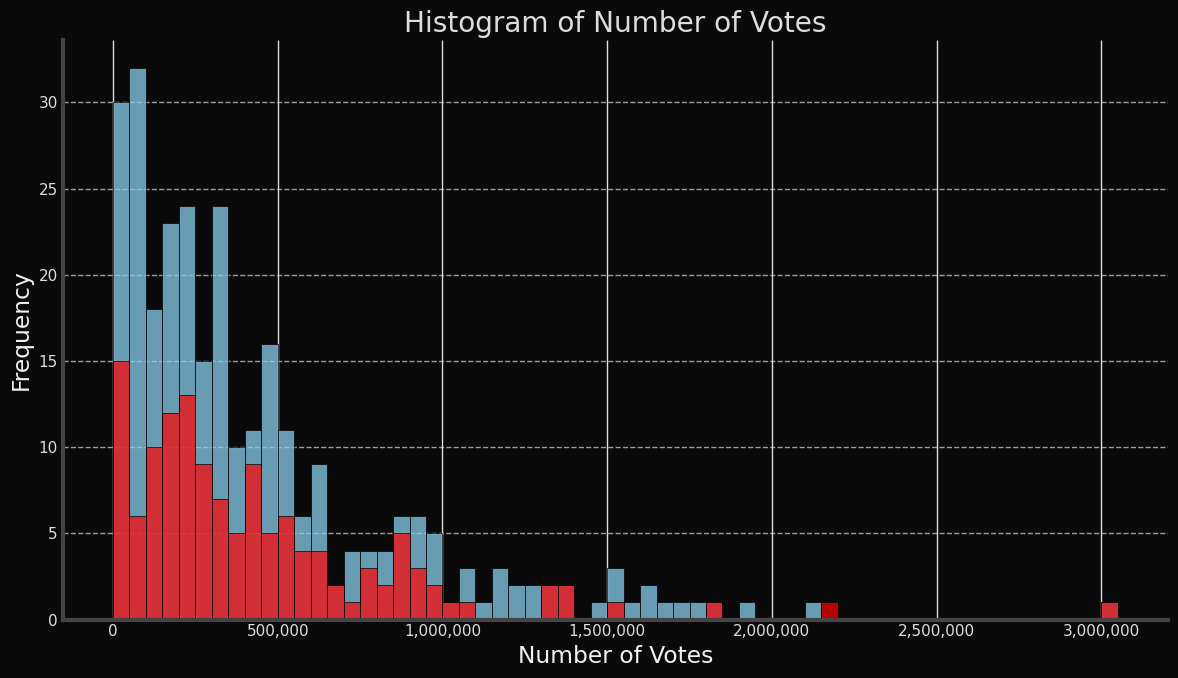

In [242]:
# Calculate maximum for binning
max_votes = df['Num Votes'].max()

# Custom bin width
bin_width = 50000
bins = range(0, int(max_votes) + bin_width, bin_width)

plt.figure(figsize=(12, 7))

sns.histplot(df[nowell]['Num Votes'], bins=bins,
             color='skyblue', edgecolor='black',
             label='Nowell')
sns.histplot(df[taylor]['Num Votes'], bins=bins,
             color='red', edgecolor='black',
             alpha=0.7, label='Taylor')

# Format x-axis labels with thousand separators
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Votes')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Axes: xlabel='Num Votes Thousands', ylabel='User Rating'>

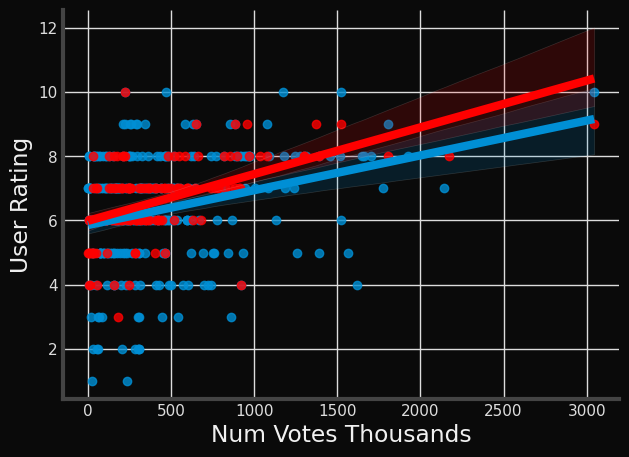

In [250]:
sns.regplot(data=df[nowell], x='Num Votes Thousands', y='User Rating')
sns.regplot(data=df[taylor], x='Num Votes Thousands', y='User Rating', color='red')

#### Box Office

In [168]:
df.groupby('Viewer')['Box Office Millions'].describe()

count   mean    std  min   25%    50%    75%    max
Viewer                                                     
nowell 256.00 122.51 147.43 0.01 27.54  70.18 163.83 936.66
taylor 120.00 182.87 168.45 0.07 65.14 150.01 229.39 858.37

In [169]:
display(df[nowell][movie_details].sort_values(by='Box Office Millions', ascending=False).head(20))
display(df[taylor][movie_details].sort_values(by='Box Office Millions', ascending=False).head(20))

Title  IMDb Rating  User Rating  Viewer  \
307  Star Wars: Episode VII - T...         7.80            7  nowell   
131        Spider-Man: No Way Home         8.20            8  nowell   
92                    Inside Out 2         7.50            5  nowell   
62            Deadpool & Wolverine         7.50            7  nowell   
187                         Barbie         6.80            6  nowell   
191                   The Avengers         8.00            8  nowell   
71   Star Wars: Episode VIII - ...         6.90            4  nowell   
204                The Dark Knight         9.00           10  nowell   
34                          Wicked         7.40            7  nowell   
155  Star Wars: Episode IV - A ...         8.60            6  nowell   
251  Black Panther: Wakanda For...         6.60            6  nowell   
37           The Dark Knight Rises         8.40            8  nowell   
320                        Shrek 2         7.40            7  nowell   
258  Doctor Strange in the Mult...         6.90            6  nowell   
282                     Spider-Man         7.40            5  nowell   
272                  Jurassic Park         8.20            6  nowell   
289                         Frozen         7.40            5  nowell   
276      Spider-Man: Far from Home         7.40            4  nowell   
112  Spider-Man: Across the Spi...         8.50           10  nowell   
283                   Spider-Man 2         7.50            5  nowell   

    Release Date                Date Rated  Box Office Millions  \
307   2015-12-18 2021-07-25 00:00:00+00:00               936.66   
131   2021-12-17 2024-08-29 20:13:02+00:00               814.87   
92    2024-06-14 2024-08-29 20:38:53+00:00               652.98   
62    2024-07-26 2024-09-15 13:53:13+00:00               636.75   
187   2023-07-21 2024-08-09 05:35:52+00:00               636.24   
191   2012-05-04 2024-08-09 05:35:25+00:00               623.36   
71    2017-12-15 2024-08-30 06:59:27+00:00               620.18   
204   2008-07-18 2024-08-09 04:48:41+00:00               534.99   
34    2024-11-22 2025-01-15 17:53:04+00:00               473.23   
155   1977-05-25 2024-08-29 19:42:04+00:00               461.00   
251   2022-11-11 2022-11-23 00:00:00+00:00               453.83   
37    2012-07-20 2025-01-03 17:39:58+00:00               448.15   
320   2004-05-19 2021-05-22 00:00:00+00:00               444.98   
258   2022-05-06 2022-05-07 00:00:00+00:00               411.33   
282   2002-05-03 2021-11-09 00:00:00+00:00               407.77   
272   1993-06-11 2021-12-26 00:00:00+00:00               407.19   
289   2013-11-27 2021-10-18 00:00:00+00:00               400.95   
276   2019-07-02 2021-12-23 00:00:00+00:00               391.28   
112   2023-06-02 2024-08-29 20:31:27+00:00               381.59   
283   2004-06-30 2021-11-09 00:00:00+00:00               374.34   

     Num Votes Thousands  
307              1002.98  
131               958.08  
92                225.84  
62                515.16  
187               617.25  
191              1516.93  
71                700.59  
204              3044.55  
34                174.99  
155              1521.04  
251               333.96  
37               1926.09  
320               535.72  
258               520.76  
282               931.64  
272              1130.77  
289               692.94  
276               602.75  
112               468.14  
283               753.58

Title  IMDb Rating  User Rating  Viewer  \
398              Avengers: Endgame         8.40            9  taylor   
132        Spider-Man: No Way Home         8.20            9  taylor   
371       Avatar: The Way of Water         7.50            7  taylor   
357         Avengers: Infinity War         8.40            8  taylor   
63            Deadpool & Wolverine         7.50            8  taylor   
364                  Incredibles 2         7.50            7  taylor   
344                  The Lion King         6.80            5  taylor   
205                The Dark Knight         9.00            9  taylor   
35                          Wicked         7.40            8  taylor   
321                        Shrek 2         7.40            7  taylor   
259  Doctor Strange in the Mult...         6.90            6  taylor   
277      Spider-Man: Far from Home         7.40            7  taylor   
118                     The Batman         7.80            7  taylor   
375         Thor: Love and Thunder         6.20            6  taylor   
399         Spider-Man: Homecoming         7.40            7  taylor   
107                    Oppenheimer         8.30            7  taylor   
419                Shrek the Third         6.10            6  taylor   
368  Harry Potter and the Sorce...         7.70            7  taylor   
347  The Chronicles of Narnia: ...         6.90            6  taylor   
412                 Monsters, Inc.         8.10            8  taylor   

    Release Date                Date Rated  Box Office Millions  \
398   2019-04-26 2021-12-19 00:00:00+00:00               858.37   
132   2021-12-17 2021-12-18 00:00:00+00:00               814.87   
371   2022-12-16 2023-01-14 00:00:00+00:00               684.08   
357   2018-04-27 2024-07-11 13:45:20+00:00               678.82   
63    2024-07-26 2024-07-26 09:01:36+00:00               636.75   
364   2018-06-15 2023-07-02 00:00:00+00:00               608.58   
344   2019-07-19 2025-01-05 20:29:47+00:00               543.64   
205   2008-07-18 2021-08-02 00:00:00+00:00               534.99   
35    2024-11-22 2025-02-13 00:39:58+00:00               473.23   
321   2004-05-19 2021-06-01 00:00:00+00:00               444.98   
259   2022-05-06 2022-11-26 00:00:00+00:00               411.33   
277   2019-07-02 2021-06-08 00:00:00+00:00               391.28   
118   2022-03-04 2022-06-22 00:00:00+00:00               369.35   
375   2022-07-08 2022-11-20 00:00:00+00:00               343.26   
399   2017-07-07 2021-12-18 00:00:00+00:00               334.95   
107   2023-07-21 2024-01-27 00:00:00+00:00               330.08   
419   2007-05-18 2021-06-01 00:00:00+00:00               322.72   
368   2001-11-16 2023-05-22 00:00:00+00:00               318.89   
347   2005-12-09 2025-01-01 20:20:21+00:00               291.71   
412   2001-11-23 2021-06-11 00:00:00+00:00               290.64   

     Num Votes Thousands  
398              1373.63  
132               958.08  
371               539.76  
357              1301.79  
63                515.16  
364               354.78  
344               285.03  
205              3044.55  
35                174.99  
321               535.72  
259               520.76  
277               602.75  
118               884.27  
375               436.59  
399               765.22  
107               915.20  
419               349.98  
368               910.74  
347               445.63  
412              1036.80

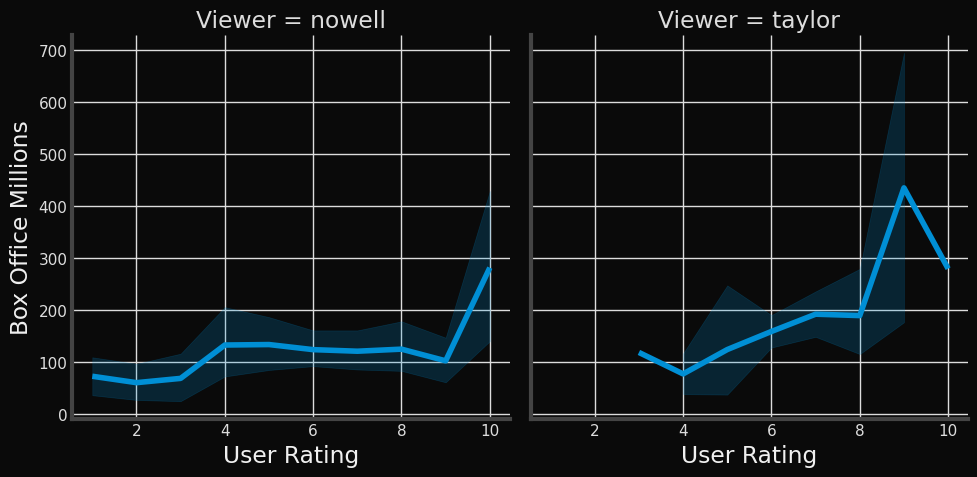

In [170]:
sns.relplot(data=df, y='Box Office Millions', x='User Rating', kind='line',
            col='Viewer')
# ylog_scale = True
# plt.yscale('log')

<Axes: xlabel='IMDb Rating', ylabel='Box Office Millions'>

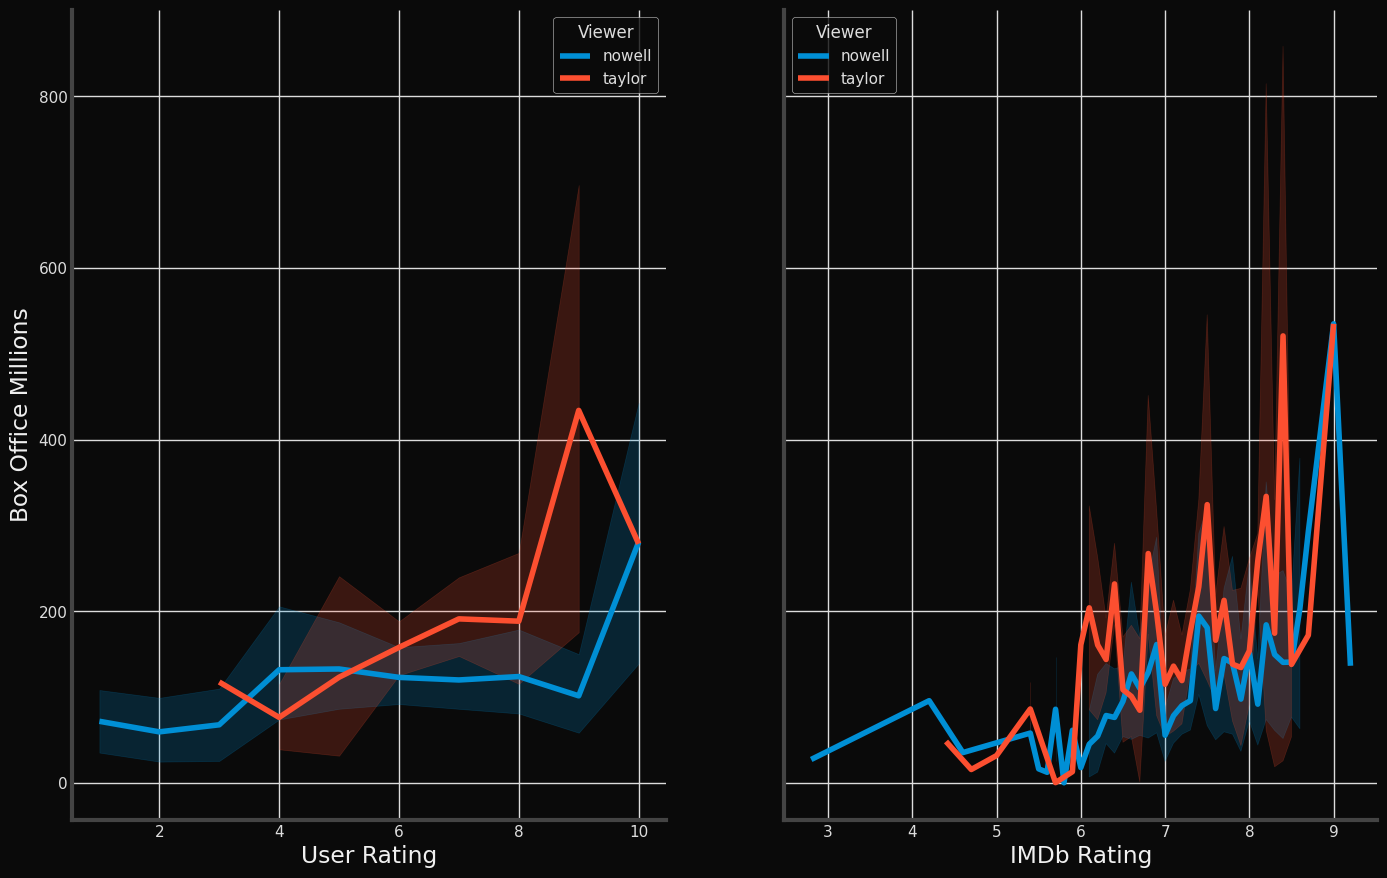

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10), sharey=True)
sns.lineplot(data=df, x='User Rating', y='Box Office Millions', hue='Viewer', ax=ax1)
sns.lineplot(data=df, x='IMDb Rating', y='Box Office Millions', hue='Viewer', ax=ax2)

#### Country

In [292]:
country_avg_rating = df_country.groupby(['Country','Viewer']).agg({
    'User Rating': 'mean',
    'IMDb Rating': 'mean',
    'Box Office Millions': 'mean',
    'Num Votes Thousands': 'mean',
    'Title': 'count'
}).rename(columns={'Title':'Count'}).sort_values(by='Count',ascending=False).reset_index()

import plotly.express as px

fig = px.choropleth(country_avg_rating,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    hover_name='Country',
                    facet_col='Viewer',
                    hover_data={
        'User Rating': ':.2f',
        'IMDb Rating': ':.2f',
        'Box Office Millions': ':.2f',
        'Num Votes Thousands': ':.2f',
        'Count': True,
        'Viewer': True
    },
                    title='Number of Movies by Country',
                    color_continuous_scale='Viridis_r')
fig.show()


### Movies Standardised

In [172]:
# Movies standardised

same_movies = pd.merge(df[nowell], df[taylor]['Title'], on='Title', how='inner')

same_movies.shape
# Only ~50 movies we've both seen so can't correlate our ratings

(52, 39)

In [173]:
print(same_movies['Title'])

0                     The Favourite
1              Crazy, Stupid, Love.
2                     Lilo & Stitch
3                  Django Unchained
4                           Sinners
5                            Wicked
6                    Predestination
7               The Prince of Egypt
8            A Quiet Place: Day One
9              Deadpool & Wolverine
10                      Blink Twice
11    Once Upon a Time... in Hol...
12    Kingdom of the Planet of t...
13                         Saltburn
14                      Oppenheimer
15     Puss in Boots: The Last Wish
16                       The Batman
17                      Glass Onion
18                             Prey
19          Spider-Man: No Way Home
20                       Knives Out
21                The Suicide Squad
22                        Prisoners
23             The Raid: Redemption
24                  The Incredibles
25                            Focus
26                         Eternals
27                   Dune: P

In [174]:
display(df.groupby('Viewer')['User Rating'].describe())
display(df.groupby('Viewer')['IMDb Rating'].describe())

count  mean  std  min  25%  50%  75%   max
Viewer                                            
nowell 290.00  6.33 1.72 1.00 5.00 7.00 8.00 10.00
taylor 133.00  6.63 1.23 3.00 6.00 7.00 7.00 10.00

count  mean  std  min  25%  50%  75%  max
Viewer                                           
nowell 290.00  7.33 0.83 2.80 6.83 7.40 7.90 9.20
taylor 133.00  7.12 0.89 4.40 6.50 7.20 7.70 9.00

## Statistics Testing

In [175]:
df.groupby('Viewer')['Runtime (Mins)'].describe()

count   mean   std   min    25%    50%    75%    max
Viewer                                                      
nowell 290.00 115.01 23.79 25.00 100.00 113.00 130.00 206.00
taylor 133.00 117.11 24.17 65.00  98.00 114.00 131.00 192.00

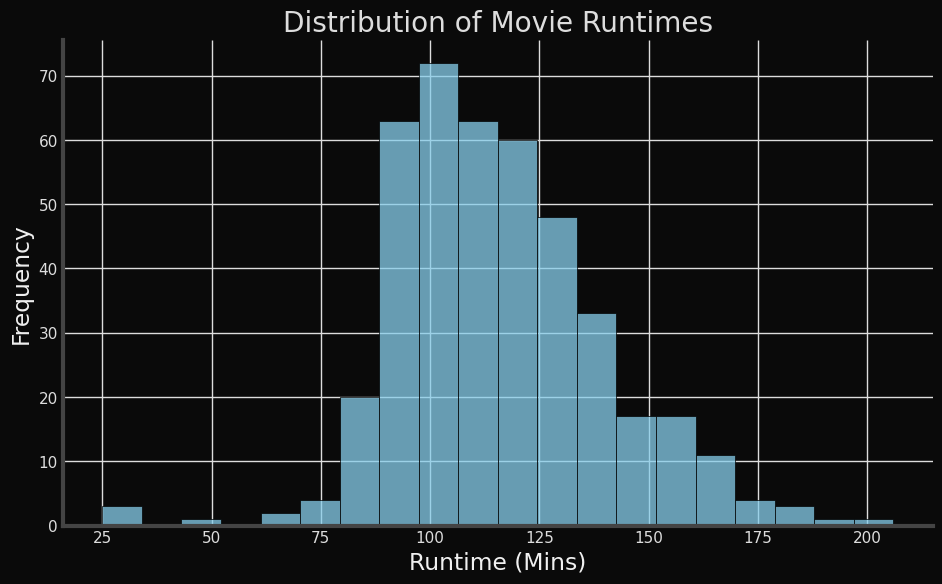

In [176]:
# Distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime (Mins)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Runtime (Mins)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

Text(0.5, 0.98, 'Distribution of Movie Runtimes')

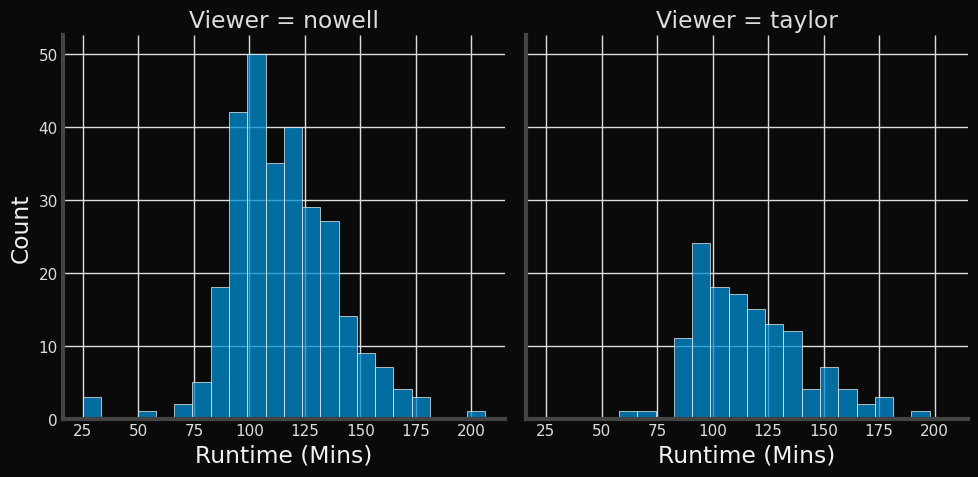

In [177]:
f=sns.displot(
    data=df, x='Runtime (Mins)', col = 'Viewer'
)
fig.suptitle('Distribution of Movie Runtimes')

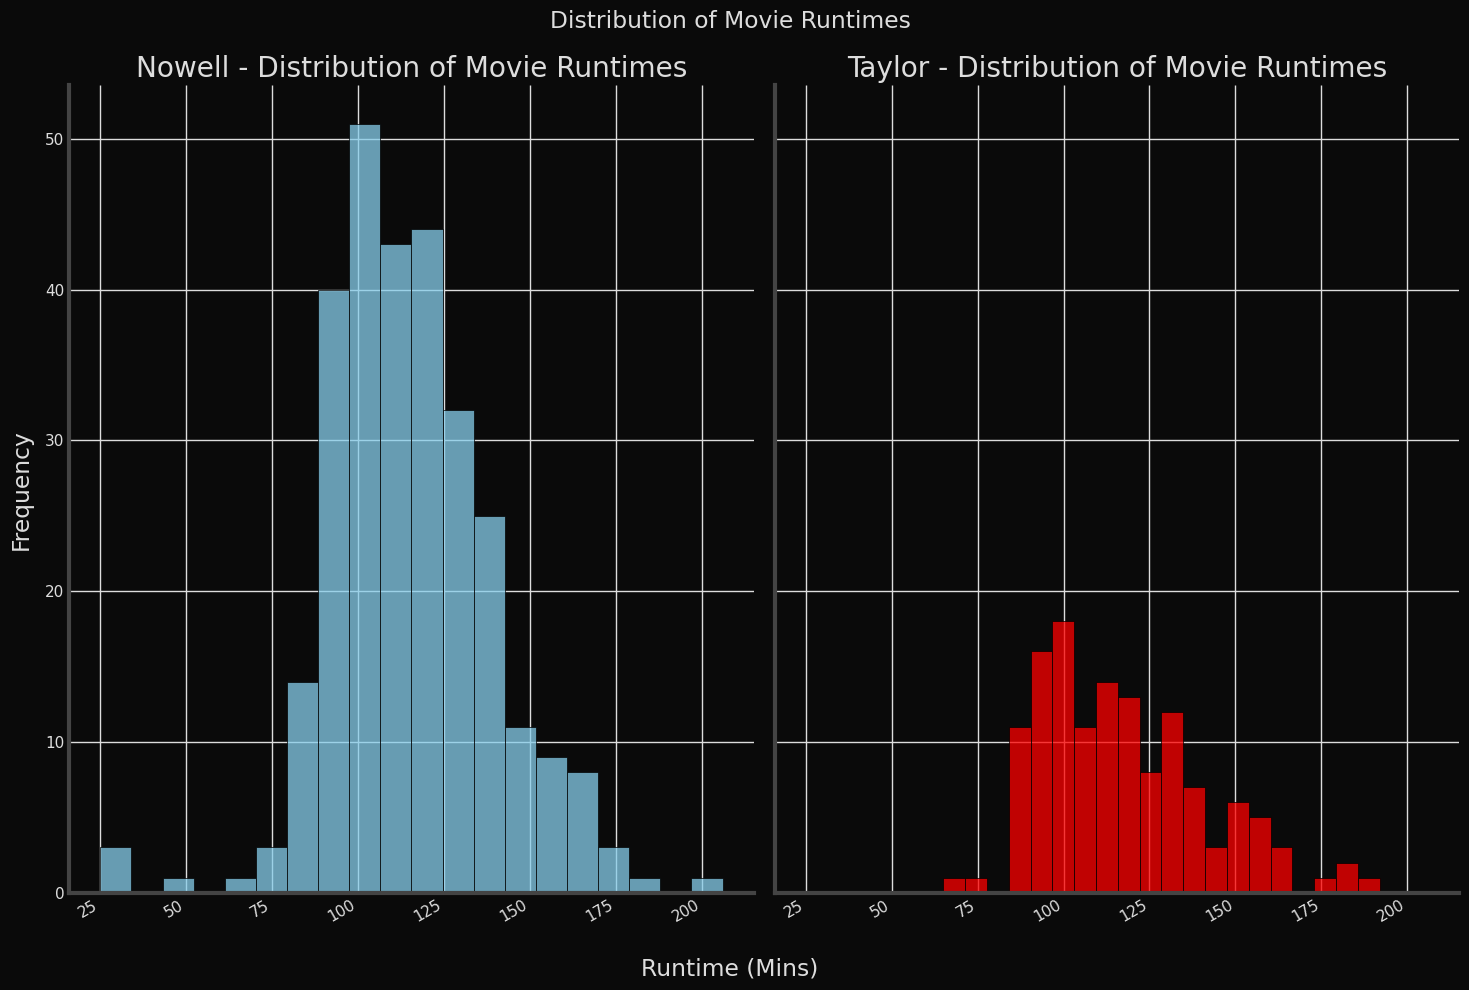

In [178]:
# Distribution of movie runtimes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10), sharex=True, sharey=True)
g=sns.histplot(df[nowell]['Runtime (Mins)'], bins=20,
               color='skyblue', edgecolor='black',
               ax=ax1, label='Nowell')
f=sns.histplot(df[taylor]['Runtime (Mins)'], bins=20,
               color='red', edgecolor='black',
               ax=ax2, label = 'Taylor rating')
ax1.set_title('Nowell - Distribution of Movie Runtimes')
ax2.set_title('Taylor - Distribution of Movie Runtimes')
fig.supxlabel('Runtime (Mins)')
fig.supylabel('Frequency')
fig.suptitle('Distribution of Movie Runtimes')
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [179]:
df['Runtime Category'] = pd.cut(
    df['Runtime (Mins)'],
    bins=[0, 90, 120, float('inf')],
    labels=['Short', 'Medium', 'Long'])
df['Runtime Category'].value_counts()

Runtime Category
Medium    226
Long      155
Short      42
Name: count, dtype: int64

In [180]:
from scipy.stats import shapiro
display(shapiro(df['Runtime Category']=='Short'))
display(shapiro(df['Runtime Category']=='Medium'))
display(shapiro(df['Runtime Category']=='Long'))

ShapiroResult(statistic=np.float64(0.34064351473597143), pvalue=np.float64(2.6254805204656362e-36))

ShapiroResult(statistic=np.float64(0.6348149513167552), pvalue=np.float64(5.105718510537657e-29))

ShapiroResult(statistic=np.float64(0.6100398864371883), pvalue=np.float64(8.72213037739069e-30))

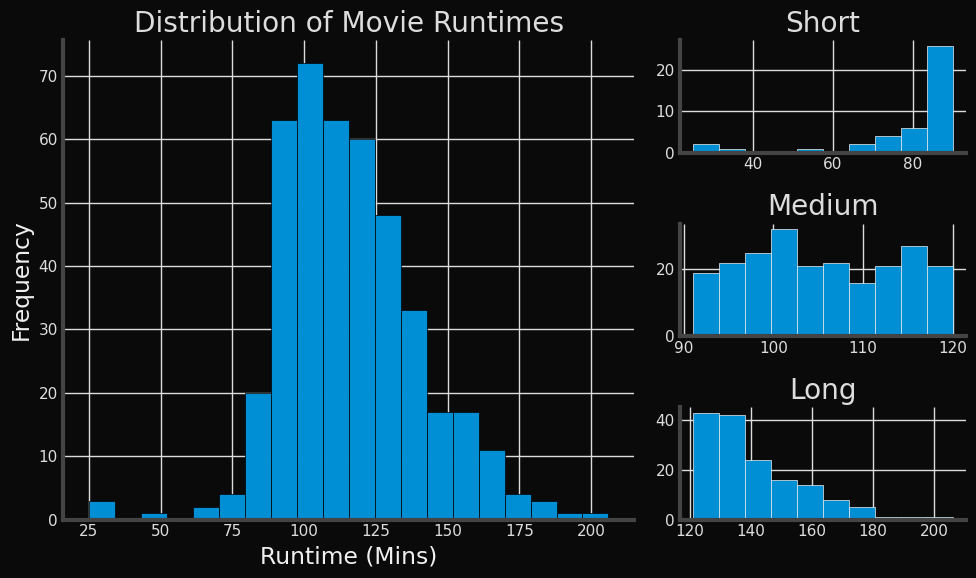

In [181]:
fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'center right'],
                               ['left', 'lower right']],
                              figsize=(10, 6),
                              gridspec_kw={'width_ratios': [2, 1]})
axs['left'].hist(df['Runtime (Mins)'], bins=20, edgecolor='black')
axs['upper right'].hist(x='Runtime (Mins)', data=df[df['Runtime Category'] == 'Short'])
axs['center right'].hist(x='Runtime (Mins)', data=df[df['Runtime Category']== 'Medium'])
axs['lower right'].hist(x='Runtime (Mins)', data=df[df['Runtime Category']== 'Long'])
axs['left'].set_xlabel('Runtime (Mins)')
axs['left'].set_ylabel('Frequency')
axs['left'].set_title('Distribution of Movie Runtimes')
# axs['upper right'] = axs['left'].twinx
axs['upper right'].set_title('Short')
axs['center right'].set_title('Medium')
axs['lower right'].set_title('Long')
plt.tight_layout()
plt.show()

The distributions are all too different for a parametric test.

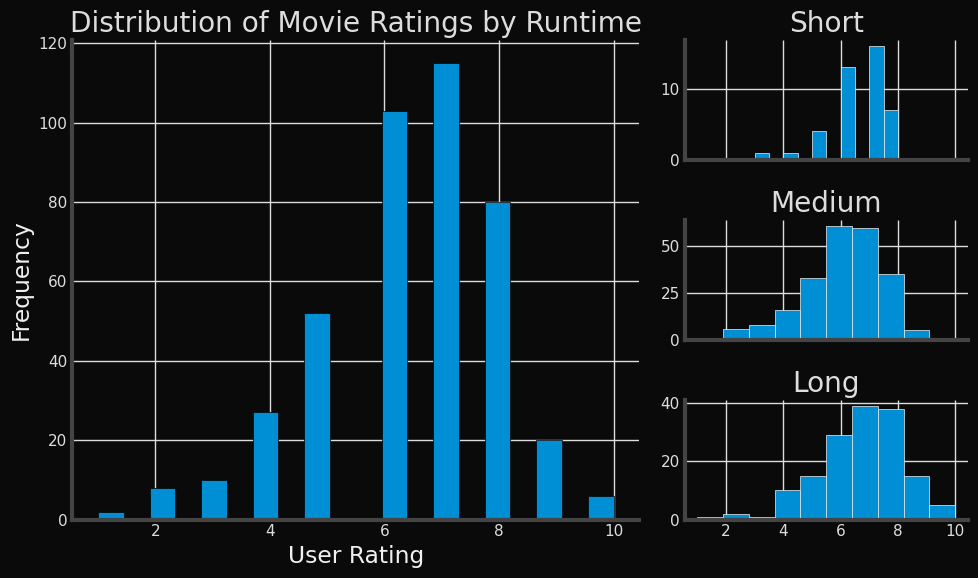

In [182]:
fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'center right'],
                               ['left', 'lower right']],
                              figsize=(10, 6),
                              gridspec_kw={'width_ratios': [2, 1]}, sharex=True)
axs['left'].hist(df['User Rating'], bins=20, edgecolor='black')
axs['upper right'].hist(x='User Rating', data=df[df['Runtime Category'] == 'Short'])
axs['center right'].hist(x='User Rating', data=df[df['Runtime Category']== 'Medium'])
axs['lower right'].hist(x='User Rating', data=df[df['Runtime Category']== 'Long'])
axs['left'].set_xlabel('User Rating')
axs['left'].set_ylabel('Frequency')
axs['left'].set_title('Distribution of Movie Ratings by Runtime')
axs['upper right'].set_title('Short')
axs['center right'].set_title('Medium')
axs['lower right'].set_title('Long')
plt.tight_layout()
plt.show()

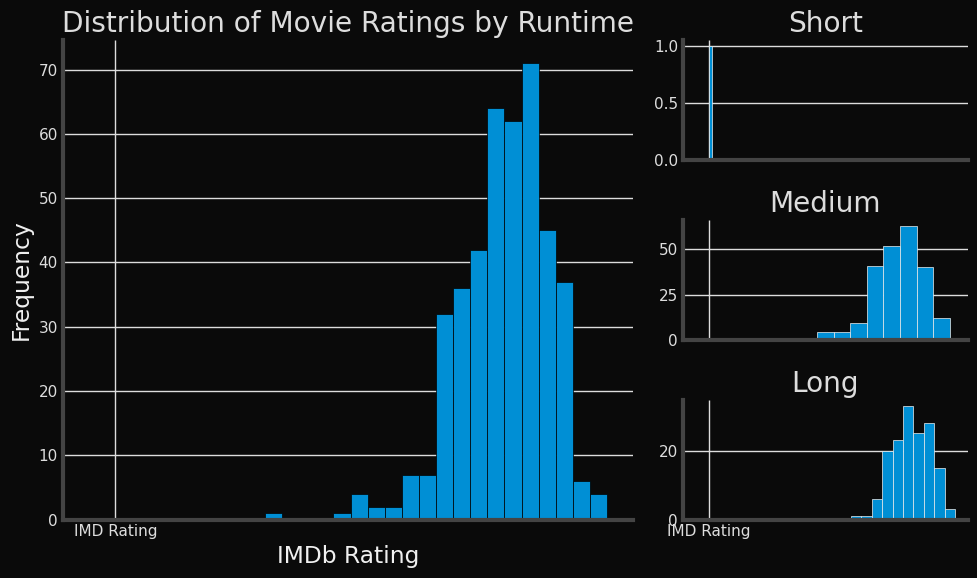

In [183]:
fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'center right'],
                               ['left', 'lower right']],
                              figsize=(10, 6),
                              gridspec_kw={'width_ratios': [2, 1]}, sharex=True)
axs['left'].hist(df['IMDb Rating'], bins=20, edgecolor='black')
axs['upper right'].hist(x='IMD Rating', data=df[df['Runtime Category'] == 'Short'])
axs['center right'].hist(x='IMDb Rating', data=df[df['Runtime Category']== 'Medium'])
axs['lower right'].hist(x='IMDb Rating', data=df[df['Runtime Category']== 'Long'])
axs['left'].set_xlabel('IMDb Rating')
axs['left'].set_ylabel('Frequency')
axs['left'].set_title('Distribution of Movie Ratings by Runtime')
axs['upper right'].set_title('Short')
axs['center right'].set_title('Medium')
axs['lower right'].set_title('Long')
plt.tight_layout()
plt.show()

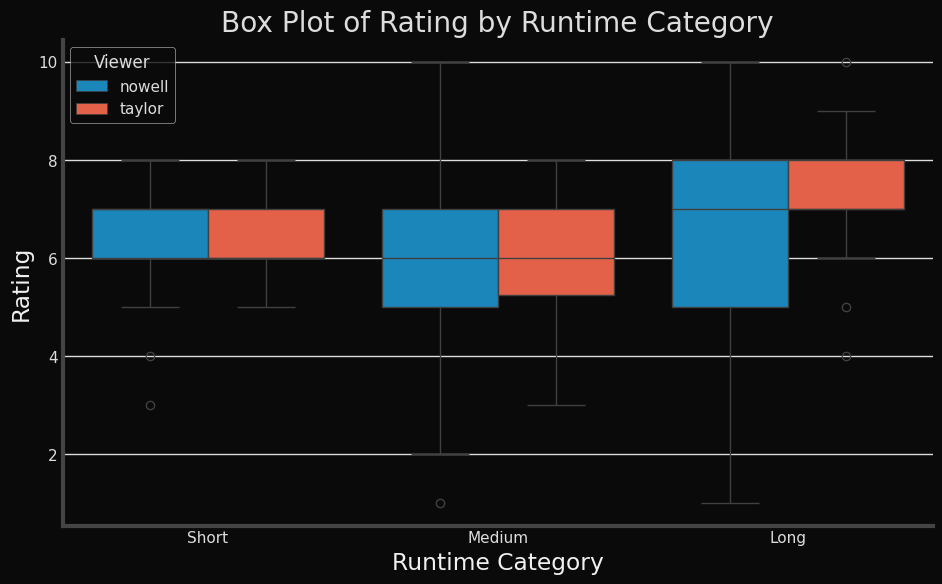

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Runtime Category', y='User Rating', data=df, hue='Viewer')
plt.title('Box Plot of Rating by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Rating')
plt.show()

In [185]:
scipy.stats.mannwhitneyu
scipy.stats.kruskal

NameError: name 'scipy' is not defined

## Summary/Findings


I rate lower than the IMDb average.